In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        notebook=True, early_stop=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        scheduler, model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, 
                                            early_stop=early_stop)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8ea45655f8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8ea45653c8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8ea4565400>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser
from mlp.schedulers import *

In [4]:
def plot_avg_plot():
    sum_stats = np.sum(five_stats,axis=0)
    stats = sum_stats/run_times

    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.show()
    
    return fig_1, ax_1, fig_2, ax_2

experiments

Epoch 1: 1.6s to complete
    error(train)=9.52e-01, acc(train)=7.18e-01, error(valid)=9.59e-01, acc(valid)=7.15e-01


Epoch 2: 1.5s to complete
    error(train)=7.36e-01, acc(train)=7.68e-01, error(valid)=7.58e-01, acc(valid)=7.63e-01


Epoch 3: 1.6s to complete
    error(train)=6.20e-01, acc(train)=8.05e-01, error(valid)=6.48e-01, acc(valid)=7.96e-01


Epoch 4: 1.5s to complete
    error(train)=5.67e-01, acc(train)=8.18e-01, error(valid)=6.05e-01, acc(valid)=8.05e-01


Epoch 5: 1.6s to complete
    error(train)=5.41e-01, acc(train)=8.26e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


Epoch 6: 1.7s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


Epoch 7: 1.6s to complete
    error(train)=4.80e-01, acc(train)=8.40e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 8: 1.6s to complete
    error(train)=4.57e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 9: 1.6s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=5.37e-01, acc(valid)=8.21e-01


Epoch 10: 1.9s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


Epoch 11: 1.9s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 12: 1.4s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 13: 1.4s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 14: 1.4s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 15: 1.8s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 16: 1.7s to complete
    error(train)=3.63e-01, acc(train)=8.74e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 17: 1.5s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 18: 1.5s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 19: 1.4s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 20: 2.4s to complete
    error(train)=3.47e-01, acc(train)=8.77e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 21: 1.4s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


Epoch 22: 1.4s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 23: 1.4s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 24: 1.4s to complete
    error(train)=3.27e-01, acc(train)=8.81e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 25: 1.4s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 26: 1.4s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 27: 1.4s to complete
    error(train)=2.98e-01, acc(train)=8.93e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


Epoch 28: 1.4s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 29: 1.5s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 30: 1.4s to complete
    error(train)=2.91e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 31: 1.5s to complete
    error(train)=2.77e-01, acc(train)=8.99e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


Epoch 32: 1.4s to complete
    error(train)=2.84e-01, acc(train)=8.97e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 33: 1.4s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


Epoch 34: 1.4s to complete
    error(train)=2.79e-01, acc(train)=8.97e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


Epoch 35: 1.4s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=5.45e-01, acc(valid)=8.29e-01


Epoch 36: 1.4s to complete
    error(train)=2.91e-01, acc(train)=8.91e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


Epoch 37: 1.4s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=5.53e-01, acc(valid)=8.33e-01


Epoch 38: 1.4s to complete
    error(train)=2.72e-01, acc(train)=8.99e-01, error(valid)=5.53e-01, acc(valid)=8.29e-01


Epoch 39: 1.4s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.68e-01, acc(valid)=8.27e-01


Epoch 40: 1.5s to complete
    error(train)=2.61e-01, acc(train)=9.03e-01, error(valid)=5.58e-01, acc(valid)=8.34e-01


Epoch 41: 1.4s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=5.69e-01, acc(valid)=8.30e-01


Epoch 42: 1.4s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=5.69e-01, acc(valid)=8.33e-01


Epoch 43: 1.4s to complete
    error(train)=2.52e-01, acc(train)=9.06e-01, error(valid)=5.72e-01, acc(valid)=8.33e-01


Epoch 44: 1.5s to complete
    error(train)=2.51e-01, acc(train)=9.05e-01, error(valid)=5.77e-01, acc(valid)=8.32e-01


Epoch 45: 1.4s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=5.83e-01, acc(valid)=8.32e-01


Epoch 46: 1.4s to complete
    error(train)=2.51e-01, acc(train)=9.05e-01, error(valid)=5.88e-01, acc(valid)=8.31e-01


Epoch 47: 1.5s to complete
    error(train)=2.43e-01, acc(train)=9.08e-01, error(valid)=5.87e-01, acc(valid)=8.30e-01


Epoch 48: 1.4s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=5.94e-01, acc(valid)=8.31e-01


Epoch 49: 1.5s to complete
    error(train)=2.58e-01, acc(train)=8.99e-01, error(valid)=6.22e-01, acc(valid)=8.22e-01


Epoch 50: 1.4s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=6.20e-01, acc(valid)=8.29e-01


Epoch 51: 1.5s to complete
    error(train)=2.32e-01, acc(train)=9.12e-01, error(valid)=5.98e-01, acc(valid)=8.32e-01


Epoch 52: 1.4s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=6.15e-01, acc(valid)=8.24e-01


Epoch 53: 1.5s to complete
    error(train)=2.23e-01, acc(train)=9.15e-01, error(valid)=6.04e-01, acc(valid)=8.31e-01


Epoch 54: 1.5s to complete
    error(train)=2.22e-01, acc(train)=9.16e-01, error(valid)=6.12e-01, acc(valid)=8.31e-01


Epoch 55: 1.5s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.32e-01, acc(valid)=8.21e-01


Epoch 56: 1.4s to complete
    error(train)=2.32e-01, acc(train)=9.13e-01, error(valid)=6.47e-01, acc(valid)=8.26e-01


Epoch 57: 1.4s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=6.27e-01, acc(valid)=8.26e-01


Epoch 58: 1.4s to complete
    error(train)=2.33e-01, acc(train)=9.10e-01, error(valid)=6.52e-01, acc(valid)=8.26e-01


Epoch 59: 1.4s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=6.62e-01, acc(valid)=8.20e-01


Epoch 60: 1.5s to complete
    error(train)=2.16e-01, acc(train)=9.16e-01, error(valid)=6.49e-01, acc(valid)=8.28e-01


Epoch 61: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.46e-01, acc(valid)=8.24e-01


Epoch 62: 1.5s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.59e-01, acc(valid)=8.26e-01


Epoch 63: 1.4s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=6.72e-01, acc(valid)=8.23e-01


Epoch 64: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.83e-01, acc(valid)=8.23e-01


Epoch 65: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.75e-01, acc(valid)=8.27e-01


Epoch 66: 1.5s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.81e-01, acc(valid)=8.24e-01


Epoch 67: 1.5s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=7.04e-01, acc(valid)=8.21e-01


Epoch 68: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.96e-01, acc(valid)=8.24e-01


Epoch 69: 1.5s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=7.06e-01, acc(valid)=8.19e-01


Epoch 70: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=6.96e-01, acc(valid)=8.20e-01


Epoch 71: 1.4s to complete
    error(train)=1.98e-01, acc(train)=9.24e-01, error(valid)=7.02e-01, acc(valid)=8.22e-01


Epoch 72: 1.4s to complete
    error(train)=1.99e-01, acc(train)=9.23e-01, error(valid)=7.10e-01, acc(valid)=8.25e-01


Epoch 73: 1.4s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=7.28e-01, acc(valid)=8.22e-01


Epoch 74: 1.4s to complete
    error(train)=2.05e-01, acc(train)=9.16e-01, error(valid)=7.31e-01, acc(valid)=8.20e-01


Epoch 75: 1.5s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.19e-01, acc(valid)=8.22e-01


Epoch 76: 1.5s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=7.27e-01, acc(valid)=8.22e-01


Epoch 77: 1.4s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=7.33e-01, acc(valid)=8.20e-01


Epoch 78: 1.4s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=7.46e-01, acc(valid)=8.20e-01


Epoch 79: 1.4s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=7.45e-01, acc(valid)=8.21e-01


Epoch 80: 1.5s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=7.54e-01, acc(valid)=8.19e-01


Epoch 81: 1.5s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.67e-01, acc(valid)=8.21e-01


Epoch 82: 1.5s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=7.74e-01, acc(valid)=8.19e-01


Epoch 83: 1.4s to complete
    error(train)=1.77e-01, acc(train)=9.30e-01, error(valid)=7.54e-01, acc(valid)=8.25e-01


Epoch 84: 1.4s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.87e-01, acc(valid)=8.20e-01


Epoch 85: 1.4s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=7.92e-01, acc(valid)=8.18e-01


Epoch 86: 1.4s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=7.74e-01, acc(valid)=8.19e-01


Epoch 87: 1.4s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.03e-01, acc(valid)=8.20e-01


Epoch 88: 1.4s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=8.03e-01, acc(valid)=8.17e-01


Epoch 89: 1.4s to complete
    error(train)=1.86e-01, acc(train)=9.27e-01, error(valid)=8.24e-01, acc(valid)=8.16e-01


Epoch 90: 1.4s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=8.09e-01, acc(valid)=8.20e-01


Epoch 91: 1.5s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.13e-01, acc(valid)=8.17e-01


Epoch 92: 2.0s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=8.19e-01, acc(valid)=8.18e-01


Epoch 93: 1.4s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=8.13e-01, acc(valid)=8.20e-01


Epoch 94: 1.4s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=8.60e-01, acc(valid)=8.16e-01


Epoch 95: 1.4s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=8.54e-01, acc(valid)=8.12e-01


Epoch 96: 1.7s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.48e-01, acc(valid)=8.13e-01


Epoch 97: 1.4s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=8.50e-01, acc(valid)=8.13e-01


Epoch 98: 1.4s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.67e-01, acc(valid)=8.14e-01


Epoch 99: 1.4s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.55e-01, acc(valid)=8.17e-01


Epoch 100: 1.4s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=8.84e-01, acc(valid)=8.15e-01


Epoch 1: 2.2s to complete
    error(train)=9.32e-01, acc(train)=7.23e-01, error(valid)=9.46e-01, acc(valid)=7.15e-01


Epoch 2: 1.5s to complete
    error(train)=7.25e-01, acc(train)=7.77e-01, error(valid)=7.48e-01, acc(valid)=7.69e-01


Epoch 3: 1.5s to complete
    error(train)=6.27e-01, acc(train)=8.02e-01, error(valid)=6.63e-01, acc(valid)=7.93e-01


Epoch 4: 1.4s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


Epoch 5: 1.5s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.68e-01, acc(valid)=8.17e-01


Epoch 6: 1.4s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 7: 1.6s to complete
    error(train)=4.68e-01, acc(train)=8.45e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 8: 1.4s to complete
    error(train)=4.61e-01, acc(train)=8.43e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


Epoch 9: 1.4s to complete
    error(train)=4.33e-01, acc(train)=8.51e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


Epoch 10: 1.4s to complete
    error(train)=4.27e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 11: 1.4s to complete
    error(train)=4.08e-01, acc(train)=8.57e-01, error(valid)=5.03e-01, acc(valid)=8.32e-01


Epoch 12: 1.4s to complete
    error(train)=3.99e-01, acc(train)=8.60e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


Epoch 13: 1.4s to complete
    error(train)=3.90e-01, acc(train)=8.61e-01, error(valid)=5.05e-01, acc(valid)=8.31e-01


Epoch 14: 1.4s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 15: 1.4s to complete
    error(train)=3.75e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


Epoch 16: 1.4s to complete
    error(train)=3.66e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 17: 1.4s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


Epoch 18: 1.4s to complete
    error(train)=3.68e-01, acc(train)=8.68e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 19: 1.5s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


Epoch 20: 1.4s to complete
    error(train)=3.48e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 21: 1.4s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=5.03e-01, acc(valid)=8.33e-01


Epoch 22: 1.4s to complete
    error(train)=3.21e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 23: 1.4s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=4.91e-01, acc(valid)=8.40e-01


Epoch 24: 1.4s to complete
    error(train)=3.17e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 25: 1.4s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 26: 1.4s to complete
    error(train)=3.04e-01, acc(train)=8.88e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 27: 1.4s to complete
    error(train)=2.99e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 28: 1.5s to complete
    error(train)=2.93e-01, acc(train)=8.94e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 29: 1.4s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 30: 1.4s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


Epoch 31: 1.4s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=5.18e-01, acc(valid)=8.41e-01


Epoch 32: 1.4s to complete
    error(train)=2.77e-01, acc(train)=8.97e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 33: 1.4s to complete
    error(train)=2.85e-01, acc(train)=8.93e-01, error(valid)=5.42e-01, acc(valid)=8.31e-01


Epoch 34: 1.4s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=5.51e-01, acc(valid)=8.33e-01


Epoch 35: 1.7s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 36: 1.7s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=5.42e-01, acc(valid)=8.32e-01


Epoch 37: 1.8s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.47e-01, acc(valid)=8.33e-01


Epoch 38: 1.5s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.51e-01, acc(valid)=8.33e-01


Epoch 39: 1.4s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.45e-01, acc(valid)=8.35e-01


Epoch 40: 1.9s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.54e-01, acc(valid)=8.32e-01


Epoch 41: 2.1s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.66e-01, acc(valid)=8.32e-01


Epoch 42: 1.9s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=5.91e-01, acc(valid)=8.22e-01


Epoch 43: 2.6s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=5.70e-01, acc(valid)=8.33e-01


Epoch 44: 1.8s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=5.80e-01, acc(valid)=8.31e-01


Epoch 45: 2.0s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.84e-01, acc(valid)=8.32e-01


Epoch 46: 2.0s to complete
    error(train)=2.39e-01, acc(train)=9.09e-01, error(valid)=5.77e-01, acc(valid)=8.30e-01


Epoch 47: 1.6s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=5.84e-01, acc(valid)=8.30e-01


Epoch 48: 1.5s to complete
    error(train)=2.47e-01, acc(train)=9.06e-01, error(valid)=5.94e-01, acc(valid)=8.30e-01


Epoch 49: 2.3s to complete
    error(train)=2.29e-01, acc(train)=9.12e-01, error(valid)=5.88e-01, acc(valid)=8.30e-01


Epoch 50: 1.7s to complete
    error(train)=2.25e-01, acc(train)=9.15e-01, error(valid)=5.89e-01, acc(valid)=8.34e-01


Epoch 51: 1.4s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=5.97e-01, acc(valid)=8.31e-01


Epoch 52: 1.4s to complete
    error(train)=2.35e-01, acc(train)=9.10e-01, error(valid)=6.06e-01, acc(valid)=8.30e-01


Epoch 53: 1.7s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.05e-01, acc(valid)=8.29e-01


Epoch 54: 1.4s to complete
    error(train)=2.21e-01, acc(train)=9.16e-01, error(valid)=6.09e-01, acc(valid)=8.31e-01


Epoch 55: 1.7s to complete
    error(train)=2.32e-01, acc(train)=9.12e-01, error(valid)=6.27e-01, acc(valid)=8.31e-01


Epoch 56: 1.4s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=6.26e-01, acc(valid)=8.24e-01


Epoch 57: 1.4s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=6.36e-01, acc(valid)=8.26e-01


Epoch 58: 1.4s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=6.30e-01, acc(valid)=8.28e-01


Epoch 59: 1.4s to complete
    error(train)=2.19e-01, acc(train)=9.14e-01, error(valid)=6.42e-01, acc(valid)=8.25e-01


Epoch 60: 1.5s to complete
    error(train)=2.08e-01, acc(train)=9.20e-01, error(valid)=6.37e-01, acc(valid)=8.33e-01


Epoch 61: 1.4s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=6.64e-01, acc(valid)=8.22e-01


Epoch 62: 1.4s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.61e-01, acc(valid)=8.26e-01


Epoch 63: 1.4s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=6.68e-01, acc(valid)=8.25e-01


Epoch 64: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.68e-01, acc(valid)=8.28e-01


Epoch 65: 1.9s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=6.79e-01, acc(valid)=8.27e-01


Epoch 66: 1.6s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=6.97e-01, acc(valid)=8.24e-01


Epoch 67: 1.7s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=6.67e-01, acc(valid)=8.28e-01


Epoch 68: 1.9s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.93e-01, acc(valid)=8.20e-01


Epoch 69: 2.0s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=6.82e-01, acc(valid)=8.27e-01


Epoch 70: 1.6s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.85e-01, acc(valid)=8.25e-01


Epoch 71: 1.8s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=6.94e-01, acc(valid)=8.26e-01


Epoch 72: 1.7s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=7.13e-01, acc(valid)=8.19e-01


Epoch 73: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.07e-01, acc(valid)=8.23e-01


Epoch 74: 1.8s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=7.14e-01, acc(valid)=8.24e-01


Epoch 75: 1.6s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.29e-01, acc(valid)=8.24e-01


Epoch 76: 1.5s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=7.24e-01, acc(valid)=8.23e-01


Epoch 77: 1.5s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=7.29e-01, acc(valid)=8.27e-01


Epoch 78: 2.7s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.32e-01, acc(valid)=8.23e-01


Epoch 79: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.51e-01, acc(valid)=8.22e-01


Epoch 80: 1.4s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=7.43e-01, acc(valid)=8.25e-01


Epoch 81: 1.5s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.46e-01, acc(valid)=8.22e-01


Epoch 82: 1.6s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.61e-01, acc(valid)=8.20e-01


Epoch 83: 1.4s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.63e-01, acc(valid)=8.24e-01


Epoch 84: 1.5s to complete
    error(train)=1.78e-01, acc(train)=9.30e-01, error(valid)=7.58e-01, acc(valid)=8.27e-01


Epoch 85: 1.4s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.81e-01, acc(valid)=8.22e-01


Epoch 86: 1.4s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.86e-01, acc(valid)=8.24e-01


Epoch 87: 1.5s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=7.95e-01, acc(valid)=8.19e-01


Epoch 88: 1.6s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.95e-01, acc(valid)=8.19e-01


Epoch 89: 1.7s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=8.15e-01, acc(valid)=8.20e-01


Epoch 90: 1.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=7.94e-01, acc(valid)=8.21e-01


Epoch 91: 1.7s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=8.07e-01, acc(valid)=8.21e-01


Epoch 92: 2.4s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.13e-01, acc(valid)=8.20e-01


Epoch 93: 2.5s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.25e-01, acc(valid)=8.16e-01


Epoch 94: 2.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.31e-01, acc(valid)=8.19e-01


Epoch 95: 2.0s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=8.20e-01, acc(valid)=8.20e-01


Epoch 96: 1.6s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=8.21e-01, acc(valid)=8.20e-01


Epoch 97: 1.5s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=8.35e-01, acc(valid)=8.22e-01


Epoch 98: 1.7s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=8.53e-01, acc(valid)=8.17e-01


Epoch 99: 1.7s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.62e-01, acc(valid)=8.17e-01


Epoch 100: 1.5s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=8.67e-01, acc(valid)=8.17e-01


Epoch 1: 1.8s to complete
    error(train)=9.89e-01, acc(train)=7.09e-01, error(valid)=1.00e+00, acc(valid)=7.06e-01


Epoch 2: 1.7s to complete
    error(train)=7.37e-01, acc(train)=7.74e-01, error(valid)=7.59e-01, acc(valid)=7.61e-01


Epoch 3: 1.8s to complete
    error(train)=6.39e-01, acc(train)=8.01e-01, error(valid)=6.75e-01, acc(valid)=7.87e-01


Epoch 4: 1.4s to complete
    error(train)=5.77e-01, acc(train)=8.14e-01, error(valid)=6.28e-01, acc(valid)=7.99e-01


Epoch 5: 1.6s to complete
    error(train)=5.49e-01, acc(train)=8.18e-01, error(valid)=5.99e-01, acc(valid)=8.04e-01


Epoch 6: 1.6s to complete
    error(train)=5.00e-01, acc(train)=8.35e-01, error(valid)=5.64e-01, acc(valid)=8.16e-01


Epoch 7: 1.8s to complete
    error(train)=4.90e-01, acc(train)=8.31e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


Epoch 8: 1.6s to complete
    error(train)=4.55e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01


Epoch 9: 2.2s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 10: 1.4s to complete
    error(train)=4.20e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 11: 1.4s to complete
    error(train)=4.04e-01, acc(train)=8.61e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 12: 1.9s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 13: 1.4s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


Epoch 14: 1.4s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


Epoch 15: 1.4s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.30e-01


Epoch 16: 1.4s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 17: 1.4s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 18: 1.4s to complete
    error(train)=3.58e-01, acc(train)=8.67e-01, error(valid)=5.12e-01, acc(valid)=8.26e-01


Epoch 19: 1.4s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


Epoch 20: 1.4s to complete
    error(train)=3.50e-01, acc(train)=8.76e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 21: 1.4s to complete
    error(train)=3.47e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 22: 1.4s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 23: 1.4s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 24: 1.4s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=5.18e-01, acc(valid)=8.26e-01


Epoch 25: 1.4s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 26: 1.4s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 27: 1.5s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 28: 1.4s to complete
    error(train)=2.94e-01, acc(train)=8.92e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 29: 1.5s to complete
    error(train)=2.87e-01, acc(train)=8.95e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 30: 1.4s to complete
    error(train)=2.82e-01, acc(train)=8.97e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 31: 1.4s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 32: 1.4s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=5.41e-01, acc(valid)=8.30e-01


Epoch 33: 1.7s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 34: 1.9s to complete
    error(train)=2.92e-01, acc(train)=8.89e-01, error(valid)=5.52e-01, acc(valid)=8.30e-01


Epoch 35: 1.5s to complete
    error(train)=2.91e-01, acc(train)=8.90e-01, error(valid)=5.56e-01, acc(valid)=8.32e-01


Epoch 36: 1.5s to complete
    error(train)=2.71e-01, acc(train)=8.98e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


Epoch 37: 1.7s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


Epoch 38: 1.5s to complete
    error(train)=2.68e-01, acc(train)=9.00e-01, error(valid)=5.54e-01, acc(valid)=8.32e-01


Epoch 39: 1.5s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.48e-01, acc(valid)=8.34e-01


Epoch 40: 2.4s to complete
    error(train)=2.62e-01, acc(train)=9.00e-01, error(valid)=5.56e-01, acc(valid)=8.30e-01


Epoch 41: 3.4s to complete
    error(train)=2.60e-01, acc(train)=9.02e-01, error(valid)=5.62e-01, acc(valid)=8.32e-01


Epoch 42: 1.5s to complete
    error(train)=2.51e-01, acc(train)=9.06e-01, error(valid)=5.60e-01, acc(valid)=8.31e-01


Epoch 43: 1.5s to complete
    error(train)=2.46e-01, acc(train)=9.08e-01, error(valid)=5.65e-01, acc(valid)=8.32e-01


Epoch 44: 1.5s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.67e-01, acc(valid)=8.28e-01


Epoch 45: 1.7s to complete
    error(train)=2.50e-01, acc(train)=9.05e-01, error(valid)=5.76e-01, acc(valid)=8.31e-01


Epoch 46: 1.6s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.86e-01, acc(valid)=8.32e-01


Epoch 47: 1.5s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=5.92e-01, acc(valid)=8.30e-01


Epoch 48: 1.6s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.86e-01, acc(valid)=8.30e-01


Epoch 49: 1.8s to complete
    error(train)=2.46e-01, acc(train)=9.05e-01, error(valid)=5.97e-01, acc(valid)=8.26e-01


Epoch 50: 2.2s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.88e-01, acc(valid)=8.29e-01


Epoch 51: 1.5s to complete
    error(train)=2.34e-01, acc(train)=9.11e-01, error(valid)=6.07e-01, acc(valid)=8.31e-01


Epoch 52: 1.8s to complete
    error(train)=2.30e-01, acc(train)=9.11e-01, error(valid)=5.96e-01, acc(valid)=8.29e-01


Epoch 53: 1.6s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=6.11e-01, acc(valid)=8.28e-01


Epoch 54: 1.4s to complete
    error(train)=2.35e-01, acc(train)=9.10e-01, error(valid)=6.21e-01, acc(valid)=8.25e-01


Epoch 55: 1.5s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=6.38e-01, acc(valid)=8.21e-01


Epoch 56: 1.6s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=6.22e-01, acc(valid)=8.31e-01


Epoch 57: 1.8s to complete
    error(train)=2.46e-01, acc(train)=9.02e-01, error(valid)=6.38e-01, acc(valid)=8.25e-01


Epoch 58: 1.5s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=6.31e-01, acc(valid)=8.27e-01


Epoch 59: 1.6s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=6.32e-01, acc(valid)=8.29e-01


Epoch 60: 1.7s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.40e-01, acc(valid)=8.25e-01


Epoch 61: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.33e-01, acc(valid)=8.27e-01


Epoch 62: 1.5s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.47e-01, acc(valid)=8.25e-01


Epoch 63: 1.6s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=6.51e-01, acc(valid)=8.28e-01


Epoch 64: 1.5s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.68e-01, acc(valid)=8.28e-01


Epoch 65: 1.6s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.68e-01, acc(valid)=8.21e-01


Epoch 66: 1.6s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=6.70e-01, acc(valid)=8.25e-01


Epoch 67: 1.4s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.66e-01, acc(valid)=8.28e-01


Epoch 68: 2.2s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.86e-01, acc(valid)=8.23e-01


Epoch 69: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=6.83e-01, acc(valid)=8.23e-01


Epoch 70: 1.4s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=6.87e-01, acc(valid)=8.24e-01


Epoch 71: 1.5s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


Epoch 72: 1.5s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.97e-01, acc(valid)=8.22e-01


Epoch 73: 1.7s to complete
    error(train)=1.94e-01, acc(train)=9.24e-01, error(valid)=6.92e-01, acc(valid)=8.24e-01


Epoch 74: 1.4s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=7.14e-01, acc(valid)=8.28e-01


Epoch 75: 1.6s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=7.01e-01, acc(valid)=8.22e-01


Epoch 76: 2.1s to complete
    error(train)=1.99e-01, acc(train)=9.23e-01, error(valid)=7.34e-01, acc(valid)=8.21e-01


Epoch 77: 1.6s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=7.32e-01, acc(valid)=8.21e-01


Epoch 78: 1.9s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=7.17e-01, acc(valid)=8.23e-01


Epoch 79: 1.4s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.27e-01, acc(valid)=8.20e-01


Epoch 80: 3.1s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=7.51e-01, acc(valid)=8.20e-01


Epoch 81: 1.8s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=7.49e-01, acc(valid)=8.21e-01


Epoch 82: 1.5s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.45e-01, acc(valid)=8.20e-01


Epoch 83: 1.5s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=7.25e-01, acc(valid)=8.24e-01


Epoch 84: 1.5s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=7.69e-01, acc(valid)=8.17e-01


Epoch 85: 1.5s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=7.57e-01, acc(valid)=8.15e-01


Epoch 86: 1.5s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.70e-01, acc(valid)=8.18e-01


Epoch 87: 1.5s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=7.72e-01, acc(valid)=8.21e-01


Epoch 88: 1.4s to complete
    error(train)=2.02e-01, acc(train)=9.16e-01, error(valid)=8.06e-01, acc(valid)=8.15e-01


Epoch 89: 1.7s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=7.76e-01, acc(valid)=8.20e-01


Epoch 90: 1.9s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=7.91e-01, acc(valid)=8.18e-01


Epoch 91: 2.2s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.99e-01, acc(valid)=8.18e-01


Epoch 92: 2.2s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=7.91e-01, acc(valid)=8.22e-01


Epoch 93: 1.6s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.13e-01, acc(valid)=8.16e-01


Epoch 94: 1.6s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=8.01e-01, acc(valid)=8.22e-01


Epoch 95: 2.6s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=7.94e-01, acc(valid)=8.25e-01


Epoch 96: 1.7s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.02e-01, acc(valid)=8.18e-01


Epoch 97: 2.4s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.30e-01, acc(valid)=8.14e-01


Epoch 98: 2.2s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=8.24e-01, acc(valid)=8.18e-01


Epoch 99: 1.6s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=8.48e-01, acc(valid)=8.15e-01


Epoch 100: 1.7s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=8.51e-01, acc(valid)=8.17e-01


Epoch 1: 1.6s to complete
    error(train)=9.39e-01, acc(train)=7.22e-01, error(valid)=9.50e-01, acc(valid)=7.21e-01


Epoch 2: 2.5s to complete
    error(train)=7.17e-01, acc(train)=7.81e-01, error(valid)=7.35e-01, acc(valid)=7.74e-01


Epoch 3: 2.3s to complete
    error(train)=6.33e-01, acc(train)=7.98e-01, error(valid)=6.69e-01, acc(valid)=7.86e-01


Epoch 4: 2.1s to complete
    error(train)=5.82e-01, acc(train)=8.09e-01, error(valid)=6.21e-01, acc(valid)=7.97e-01


Epoch 5: 1.6s to complete
    error(train)=5.33e-01, acc(train)=8.23e-01, error(valid)=5.84e-01, acc(valid)=8.10e-01


Epoch 6: 2.2s to complete
    error(train)=4.95e-01, acc(train)=8.36e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 7: 2.0s to complete
    error(train)=4.85e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


Epoch 8: 1.7s to complete
    error(train)=4.52e-01, acc(train)=8.47e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


Epoch 9: 1.4s to complete
    error(train)=4.68e-01, acc(train)=8.34e-01, error(valid)=5.55e-01, acc(valid)=8.14e-01


Epoch 10: 1.9s to complete
    error(train)=4.20e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 11: 1.7s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 12: 1.8s to complete
    error(train)=4.10e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 13: 2.1s to complete
    error(train)=3.95e-01, acc(train)=8.60e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


Epoch 14: 1.8s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


Epoch 15: 2.1s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 16: 2.5s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=4.97e-01, acc(valid)=8.42e-01


Epoch 17: 2.0s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 18: 2.4s to complete
    error(train)=3.57e-01, acc(train)=8.72e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


Epoch 19: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 20: 2.3s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 21: 1.9s to complete
    error(train)=3.30e-01, acc(train)=8.81e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 22: 1.5s to complete
    error(train)=3.31e-01, acc(train)=8.81e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 23: 1.6s to complete
    error(train)=3.22e-01, acc(train)=8.84e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 24: 1.7s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.42e-01


Epoch 25: 1.7s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 26: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


Epoch 27: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.91e-01, error(valid)=5.08e-01, acc(valid)=8.41e-01


Epoch 28: 2.2s to complete
    error(train)=2.97e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 29: 2.1s to complete
    error(train)=3.05e-01, acc(train)=8.87e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 30: 2.1s to complete
    error(train)=2.84e-01, acc(train)=8.96e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 31: 2.3s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 32: 1.8s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=5.14e-01, acc(valid)=8.41e-01


Epoch 33: 1.6s to complete
    error(train)=2.87e-01, acc(train)=8.94e-01, error(valid)=5.39e-01, acc(valid)=8.34e-01


Epoch 34: 1.9s to complete
    error(train)=2.79e-01, acc(train)=8.97e-01, error(valid)=5.32e-01, acc(valid)=8.35e-01


Epoch 35: 1.6s to complete
    error(train)=2.69e-01, acc(train)=9.01e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


Epoch 36: 1.6s to complete
    error(train)=2.84e-01, acc(train)=8.90e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


Epoch 37: 1.4s to complete
    error(train)=2.74e-01, acc(train)=8.96e-01, error(valid)=5.52e-01, acc(valid)=8.32e-01


Epoch 38: 1.7s to complete
    error(train)=2.60e-01, acc(train)=9.04e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


Epoch 39: 1.6s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=5.43e-01, acc(valid)=8.36e-01


Epoch 40: 1.9s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=5.51e-01, acc(valid)=8.34e-01


Epoch 41: 2.3s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


Epoch 42: 2.2s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.54e-01, acc(valid)=8.33e-01


Epoch 43: 1.5s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=5.54e-01, acc(valid)=8.37e-01


Epoch 44: 1.5s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=5.58e-01, acc(valid)=8.34e-01


Epoch 45: 1.8s to complete
    error(train)=2.35e-01, acc(train)=9.12e-01, error(valid)=5.64e-01, acc(valid)=8.34e-01


Epoch 46: 1.6s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=5.75e-01, acc(valid)=8.38e-01


Epoch 47: 1.6s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=5.78e-01, acc(valid)=8.33e-01


Epoch 48: 1.5s to complete
    error(train)=2.31e-01, acc(train)=9.14e-01, error(valid)=5.71e-01, acc(valid)=8.39e-01


Epoch 49: 1.9s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=5.96e-01, acc(valid)=8.26e-01


Epoch 50: 1.7s to complete
    error(train)=2.43e-01, acc(train)=9.06e-01, error(valid)=6.00e-01, acc(valid)=8.27e-01


Epoch 51: 1.7s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.97e-01, acc(valid)=8.31e-01


Epoch 52: 1.6s to complete
    error(train)=2.27e-01, acc(train)=9.14e-01, error(valid)=5.90e-01, acc(valid)=8.33e-01


Epoch 53: 1.7s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=6.02e-01, acc(valid)=8.30e-01


Epoch 54: 1.6s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=6.22e-01, acc(valid)=8.24e-01


Epoch 55: 1.8s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=6.18e-01, acc(valid)=8.25e-01


Epoch 56: 1.5s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=6.28e-01, acc(valid)=8.27e-01


Epoch 57: 2.2s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.24e-01, acc(valid)=8.27e-01


Epoch 58: 1.9s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.16e-01, acc(valid)=8.29e-01


Epoch 59: 1.8s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=6.33e-01, acc(valid)=8.24e-01


Epoch 60: 2.2s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=6.20e-01, acc(valid)=8.30e-01


Epoch 61: 2.1s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=6.40e-01, acc(valid)=8.27e-01


Epoch 62: 2.1s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.44e-01, acc(valid)=8.30e-01


Epoch 63: 2.0s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=6.58e-01, acc(valid)=8.25e-01


Epoch 64: 1.8s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=6.65e-01, acc(valid)=8.24e-01


Epoch 65: 1.9s to complete
    error(train)=2.08e-01, acc(train)=9.19e-01, error(valid)=6.66e-01, acc(valid)=8.26e-01


Epoch 66: 1.5s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=6.70e-01, acc(valid)=8.26e-01


Epoch 67: 1.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.80e-01, acc(valid)=8.24e-01


Epoch 68: 1.5s to complete
    error(train)=2.09e-01, acc(train)=9.18e-01, error(valid)=6.90e-01, acc(valid)=8.22e-01


Epoch 69: 1.4s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.80e-01, acc(valid)=8.26e-01


Epoch 70: 1.5s to complete
    error(train)=1.90e-01, acc(train)=9.26e-01, error(valid)=6.83e-01, acc(valid)=8.25e-01


Epoch 71: 1.4s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=7.10e-01, acc(valid)=8.24e-01


Epoch 72: 1.5s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=7.15e-01, acc(valid)=8.26e-01


Epoch 73: 1.6s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.16e-01, acc(valid)=8.21e-01


Epoch 74: 1.5s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=7.14e-01, acc(valid)=8.20e-01


Epoch 75: 1.7s to complete
    error(train)=1.95e-01, acc(train)=9.24e-01, error(valid)=7.29e-01, acc(valid)=8.24e-01


Epoch 76: 1.5s to complete
    error(train)=2.07e-01, acc(train)=9.20e-01, error(valid)=7.53e-01, acc(valid)=8.21e-01


Epoch 77: 2.2s to complete
    error(train)=1.98e-01, acc(train)=9.23e-01, error(valid)=7.33e-01, acc(valid)=8.22e-01


Epoch 78: 2.3s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=7.52e-01, acc(valid)=8.19e-01


Epoch 79: 2.0s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=7.53e-01, acc(valid)=8.14e-01


Epoch 80: 1.6s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=7.40e-01, acc(valid)=8.25e-01


Epoch 81: 1.8s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.58e-01, acc(valid)=8.19e-01


Epoch 82: 1.7s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.65e-01, acc(valid)=8.17e-01


Epoch 83: 1.5s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=7.62e-01, acc(valid)=8.18e-01


Epoch 84: 1.6s to complete
    error(train)=1.72e-01, acc(train)=9.33e-01, error(valid)=7.50e-01, acc(valid)=8.23e-01


Epoch 85: 1.7s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.93e-01, acc(valid)=8.20e-01


Epoch 86: 2.1s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.86e-01, acc(valid)=8.22e-01


Epoch 87: 1.5s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.88e-01, acc(valid)=8.20e-01


Epoch 88: 1.7s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.82e-01, acc(valid)=8.19e-01


Epoch 89: 2.3s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=8.05e-01, acc(valid)=8.17e-01


Epoch 90: 1.9s to complete
    error(train)=1.84e-01, acc(train)=9.28e-01, error(valid)=8.02e-01, acc(valid)=8.16e-01


Epoch 91: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=8.03e-01, acc(valid)=8.18e-01


Epoch 92: 2.3s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=8.13e-01, acc(valid)=8.19e-01


Epoch 93: 2.1s to complete
    error(train)=1.69e-01, acc(train)=9.33e-01, error(valid)=8.06e-01, acc(valid)=8.21e-01


Epoch 94: 2.1s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=8.45e-01, acc(valid)=8.15e-01


Epoch 95: 1.7s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=8.49e-01, acc(valid)=8.16e-01


Epoch 96: 1.8s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.44e-01, acc(valid)=8.18e-01


Epoch 97: 1.6s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=8.53e-01, acc(valid)=8.13e-01


Epoch 98: 1.7s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=8.37e-01, acc(valid)=8.21e-01


Epoch 99: 2.0s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=8.54e-01, acc(valid)=8.15e-01


Epoch 100: 1.6s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=8.46e-01, acc(valid)=8.18e-01


Epoch 1: 1.5s to complete
    error(train)=9.45e-01, acc(train)=7.19e-01, error(valid)=9.56e-01, acc(valid)=7.16e-01


Epoch 2: 2.0s to complete
    error(train)=7.44e-01, acc(train)=7.70e-01, error(valid)=7.67e-01, acc(valid)=7.68e-01


Epoch 3: 1.5s to complete
    error(train)=6.24e-01, acc(train)=8.01e-01, error(valid)=6.59e-01, acc(valid)=7.93e-01


Epoch 4: 2.3s to complete
    error(train)=5.80e-01, acc(train)=8.12e-01, error(valid)=6.22e-01, acc(valid)=8.00e-01


Epoch 5: 2.0s to complete
    error(train)=5.56e-01, acc(train)=8.14e-01, error(valid)=6.08e-01, acc(valid)=8.01e-01


Epoch 6: 1.5s to complete
    error(train)=5.08e-01, acc(train)=8.31e-01, error(valid)=5.68e-01, acc(valid)=8.12e-01


Epoch 7: 1.6s to complete
    error(train)=4.74e-01, acc(train)=8.42e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


Epoch 8: 1.7s to complete
    error(train)=4.59e-01, acc(train)=8.42e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


Epoch 9: 1.5s to complete
    error(train)=4.42e-01, acc(train)=8.48e-01, error(valid)=5.26e-01, acc(valid)=8.25e-01


Epoch 10: 1.4s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 11: 1.4s to complete
    error(train)=4.05e-01, acc(train)=8.61e-01, error(valid)=5.05e-01, acc(valid)=8.31e-01


Epoch 12: 1.4s to complete
    error(train)=4.03e-01, acc(train)=8.58e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


Epoch 13: 1.4s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


Epoch 14: 1.6s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 15: 1.7s to complete
    error(train)=3.68e-01, acc(train)=8.69e-01, error(valid)=4.93e-01, acc(valid)=8.35e-01


Epoch 16: 1.5s to complete
    error(train)=3.56e-01, acc(train)=8.75e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


Epoch 17: 1.8s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


Epoch 18: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 19: 2.2s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 20: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.78e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 21: 2.1s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 22: 1.7s to complete
    error(train)=3.25e-01, acc(train)=8.82e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


Epoch 23: 1.9s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


Epoch 24: 2.1s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 25: 1.9s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 26: 1.4s to complete
    error(train)=3.05e-01, acc(train)=8.89e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


Epoch 27: 1.5s to complete
    error(train)=2.98e-01, acc(train)=8.90e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


Epoch 28: 2.3s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 29: 2.6s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 30: 1.7s to complete
    error(train)=2.85e-01, acc(train)=8.94e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 31: 2.0s to complete
    error(train)=2.86e-01, acc(train)=8.95e-01, error(valid)=5.18e-01, acc(valid)=8.37e-01


Epoch 32: 2.1s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 33: 4.9s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 34: 5.7s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


Epoch 35: 4.3s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.35e-01, acc(valid)=8.39e-01


Epoch 36: 4.6s to complete
    error(train)=2.65e-01, acc(train)=9.01e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


Epoch 37: 4.7s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


Epoch 38: 4.8s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


Epoch 39: 5.6s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.73e-01, acc(valid)=8.26e-01


Epoch 40: 5.7s to complete
    error(train)=2.47e-01, acc(train)=9.08e-01, error(valid)=5.44e-01, acc(valid)=8.40e-01


Epoch 41: 5.2s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.55e-01, acc(valid)=8.34e-01


Epoch 42: 6.1s to complete
    error(train)=2.53e-01, acc(train)=9.04e-01, error(valid)=5.69e-01, acc(valid)=8.29e-01


Epoch 43: 5.4s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=5.69e-01, acc(valid)=8.35e-01


Epoch 44: 4.6s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=5.58e-01, acc(valid)=8.34e-01


Epoch 45: 4.5s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=5.53e-01, acc(valid)=8.35e-01


Epoch 46: 5.1s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=5.75e-01, acc(valid)=8.32e-01


Epoch 47: 5.2s to complete
    error(train)=2.35e-01, acc(train)=9.12e-01, error(valid)=5.77e-01, acc(valid)=8.34e-01


Epoch 48: 5.8s to complete
    error(train)=2.27e-01, acc(train)=9.14e-01, error(valid)=5.72e-01, acc(valid)=8.35e-01


Epoch 49: 5.8s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=5.90e-01, acc(valid)=8.29e-01


Epoch 50: 3.9s to complete
    error(train)=2.28e-01, acc(train)=9.14e-01, error(valid)=5.88e-01, acc(valid)=8.37e-01


Epoch 51: 5.5s to complete
    error(train)=2.27e-01, acc(train)=9.13e-01, error(valid)=5.94e-01, acc(valid)=8.34e-01


Epoch 52: 5.0s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.99e-01, acc(valid)=8.30e-01


Epoch 53: 4.2s to complete
    error(train)=2.20e-01, acc(train)=9.16e-01, error(valid)=6.04e-01, acc(valid)=8.34e-01


Epoch 54: 4.6s to complete
    error(train)=2.17e-01, acc(train)=9.18e-01, error(valid)=5.98e-01, acc(valid)=8.33e-01


Epoch 55: 4.8s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=6.15e-01, acc(valid)=8.32e-01


Epoch 56: 4.9s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=6.13e-01, acc(valid)=8.31e-01


Epoch 57: 4.7s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.13e-01, acc(valid)=8.33e-01


Epoch 58: 5.0s to complete
    error(train)=2.08e-01, acc(train)=9.21e-01, error(valid)=6.17e-01, acc(valid)=8.31e-01


Epoch 59: 4.7s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=6.37e-01, acc(valid)=8.28e-01


Epoch 60: 4.7s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=6.45e-01, acc(valid)=8.26e-01


Epoch 61: 4.9s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.43e-01, acc(valid)=8.28e-01


Epoch 62: 4.6s to complete
    error(train)=2.04e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.29e-01


Epoch 63: 4.4s to complete
    error(train)=2.03e-01, acc(train)=9.22e-01, error(valid)=6.45e-01, acc(valid)=8.30e-01


Epoch 64: 4.2s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.66e-01, acc(valid)=8.25e-01


Epoch 65: 4.8s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=6.76e-01, acc(valid)=8.25e-01


Epoch 66: 6.1s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.81e-01, acc(valid)=8.24e-01


Epoch 67: 4.8s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.77e-01, acc(valid)=8.28e-01


Epoch 68: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.24e-01, error(valid)=6.78e-01, acc(valid)=8.28e-01


Epoch 69: 4.9s to complete
    error(train)=1.98e-01, acc(train)=9.23e-01, error(valid)=6.86e-01, acc(valid)=8.29e-01


Epoch 70: 4.9s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.91e-01, acc(valid)=8.26e-01


Epoch 71: 5.0s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=6.98e-01, acc(valid)=8.21e-01


Epoch 72: 4.8s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=7.00e-01, acc(valid)=8.22e-01


Epoch 73: 4.8s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=7.08e-01, acc(valid)=8.23e-01


Epoch 74: 4.7s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=7.21e-01, acc(valid)=8.22e-01


Epoch 75: 4.6s to complete
    error(train)=1.88e-01, acc(train)=9.27e-01, error(valid)=7.09e-01, acc(valid)=8.25e-01


Epoch 76: 4.1s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=7.44e-01, acc(valid)=8.15e-01


Epoch 77: 4.3s to complete
    error(train)=1.84e-01, acc(train)=9.28e-01, error(valid)=7.37e-01, acc(valid)=8.25e-01


Epoch 78: 5.3s to complete
    error(train)=2.01e-01, acc(train)=9.21e-01, error(valid)=7.60e-01, acc(valid)=8.20e-01


Epoch 79: 5.2s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=7.38e-01, acc(valid)=8.23e-01


Epoch 80: 5.1s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=7.53e-01, acc(valid)=8.23e-01


Epoch 81: 5.1s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=7.47e-01, acc(valid)=8.24e-01


Epoch 82: 5.2s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=7.58e-01, acc(valid)=8.21e-01


Epoch 83: 6.3s to complete
    error(train)=1.75e-01, acc(train)=9.31e-01, error(valid)=7.57e-01, acc(valid)=8.26e-01


Epoch 84: 5.4s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01


Epoch 85: 4.9s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.82e-01, acc(valid)=8.23e-01


Epoch 86: 4.8s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=7.92e-01, acc(valid)=8.23e-01


Epoch 87: 4.8s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=7.77e-01, acc(valid)=8.22e-01


Epoch 88: 4.8s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=8.10e-01, acc(valid)=8.21e-01


Epoch 89: 4.8s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=8.07e-01, acc(valid)=8.23e-01


Epoch 90: 5.4s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.21e-01, acc(valid)=8.22e-01


Epoch 91: 4.4s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=8.02e-01, acc(valid)=8.23e-01


Epoch 92: 5.0s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=8.32e-01, acc(valid)=8.19e-01


Epoch 93: 4.7s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.19e-01, acc(valid)=8.17e-01


Epoch 94: 5.0s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.31e-01, acc(valid)=8.14e-01


Epoch 95: 4.4s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.31e-01, acc(valid)=8.19e-01


Epoch 96: 4.9s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=8.31e-01, acc(valid)=8.19e-01


Epoch 97: 4.1s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.51e-01, acc(valid)=8.16e-01


Epoch 98: 4.0s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=8.79e-01, acc(valid)=8.11e-01


Epoch 99: 3.8s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=8.76e-01, acc(valid)=8.16e-01


Epoch 100: 4.0s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.85e-01, acc(valid)=8.14e-01


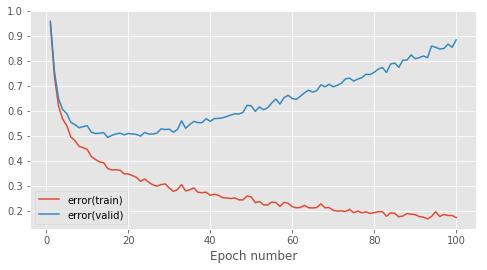

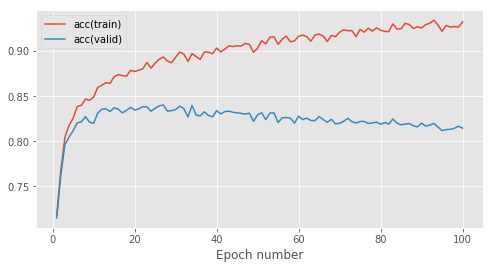

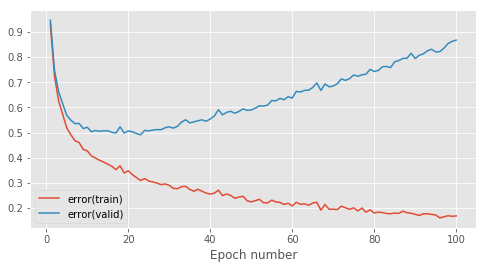

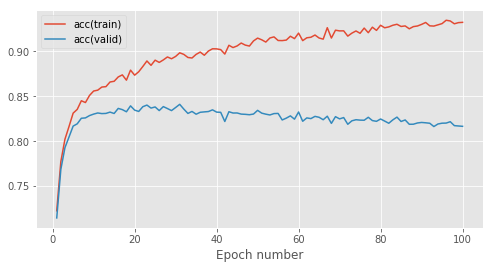

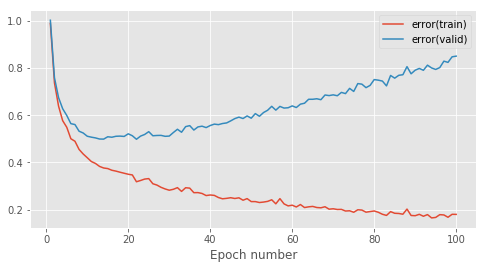

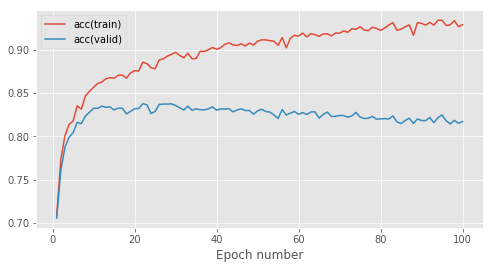

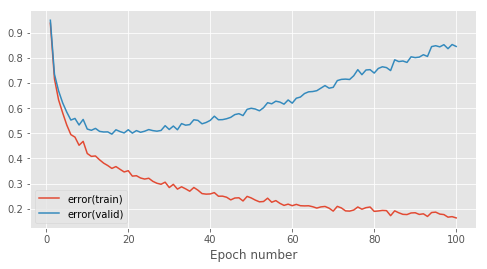

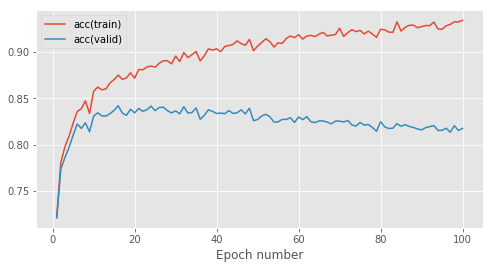

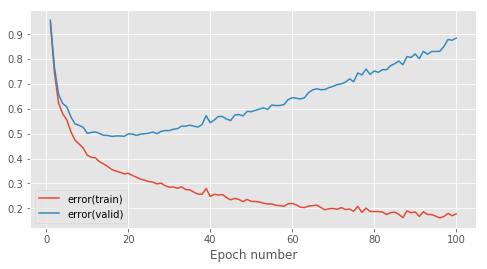

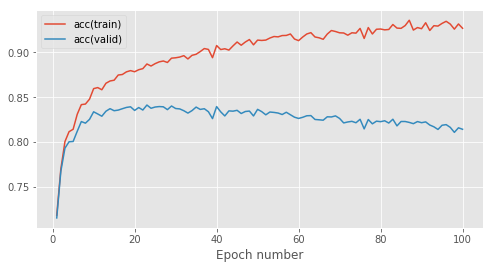

In [5]:
run_times = 5
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule()
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats2 = sum_stats/run_times

Epoch 1: 6.1s to complete
    error(train)=8.89e-01, acc(train)=7.30e-01, error(valid)=9.04e-01, acc(valid)=7.25e-01


Epoch 2: 5.6s to complete
    error(train)=6.62e-01, acc(train)=7.89e-01, error(valid)=6.94e-01, acc(valid)=7.82e-01


Epoch 3: 6.3s to complete
    error(train)=6.01e-01, acc(train)=8.04e-01, error(valid)=6.47e-01, acc(valid)=7.92e-01


Epoch 4: 5.8s to complete
    error(train)=5.43e-01, acc(train)=8.18e-01, error(valid)=6.02e-01, acc(valid)=8.02e-01


Epoch 5: 5.7s to complete
    error(train)=4.84e-01, acc(train)=8.35e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


Epoch 6: 5.8s to complete
    error(train)=4.51e-01, acc(train)=8.46e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


Epoch 7: 5.5s to complete
    error(train)=4.49e-01, acc(train)=8.42e-01, error(valid)=5.36e-01, acc(valid)=8.20e-01


Epoch 8: 5.5s to complete
    error(train)=4.09e-01, acc(train)=8.57e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


Epoch 9: 5.7s to complete
    error(train)=4.11e-01, acc(train)=8.53e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


Epoch 10: 5.6s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 11: 5.4s to complete
    error(train)=3.71e-01, acc(train)=8.69e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


Epoch 12: 5.6s to complete
    error(train)=3.74e-01, acc(train)=8.66e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


Epoch 13: 5.7s to complete
    error(train)=3.56e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 14: 6.5s to complete
    error(train)=3.63e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


Epoch 15: 6.1s to complete
    error(train)=3.42e-01, acc(train)=8.73e-01, error(valid)=4.98e-01, acc(valid)=8.30e-01


Epoch 16: 5.5s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


Epoch 17: 5.4s to complete
    error(train)=3.25e-01, acc(train)=8.79e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 18: 5.7s to complete
    error(train)=3.23e-01, acc(train)=8.81e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


Epoch 19: 5.7s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 20: 5.3s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


Epoch 21: 5.2s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 22: 4.9s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 23: 6.0s to complete
    error(train)=3.05e-01, acc(train)=8.85e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


Epoch 24: 5.0s to complete
    error(train)=2.79e-01, acc(train)=8.95e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


Epoch 25: 5.0s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 26: 5.1s to complete
    error(train)=2.76e-01, acc(train)=8.93e-01, error(valid)=5.28e-01, acc(valid)=8.36e-01


Epoch 27: 5.1s to complete
    error(train)=2.66e-01, acc(train)=8.96e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


Epoch 28: 5.2s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


Epoch 29: 5.1s to complete
    error(train)=2.52e-01, acc(train)=9.03e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01


Epoch 30: 5.0s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


Epoch 31: 5.1s to complete
    error(train)=2.61e-01, acc(train)=9.00e-01, error(valid)=5.51e-01, acc(valid)=8.36e-01


Epoch 32: 5.3s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


Epoch 33: 5.0s to complete
    error(train)=2.35e-01, acc(train)=9.08e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


Epoch 34: 6.6s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=5.50e-01, acc(valid)=8.32e-01


Epoch 35: 5.5s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=5.56e-01, acc(valid)=8.35e-01


Epoch 36: 5.6s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=5.74e-01, acc(valid)=8.37e-01


Epoch 37: 7.9s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=5.71e-01, acc(valid)=8.38e-01


Epoch 38: 5.0s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.96e-01, acc(valid)=8.31e-01


Epoch 39: 4.6s to complete
    error(train)=2.27e-01, acc(train)=9.10e-01, error(valid)=5.86e-01, acc(valid)=8.31e-01


Epoch 40: 5.3s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=5.84e-01, acc(valid)=8.35e-01


Epoch 41: 5.6s to complete
    error(train)=2.37e-01, acc(train)=9.05e-01, error(valid)=6.25e-01, acc(valid)=8.25e-01


Epoch 42: 5.6s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=5.94e-01, acc(valid)=8.34e-01


Epoch 43: 5.8s to complete
    error(train)=2.21e-01, acc(train)=9.10e-01, error(valid)=6.22e-01, acc(valid)=8.28e-01


Epoch 44: 7.0s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=6.09e-01, acc(valid)=8.34e-01


Epoch 45: 6.8s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.16e-01, acc(valid)=8.29e-01


Epoch 46: 5.3s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.21e-01, acc(valid)=8.29e-01


Epoch 47: 5.6s to complete
    error(train)=2.07e-01, acc(train)=9.15e-01, error(valid)=6.43e-01, acc(valid)=8.26e-01


Epoch 48: 7.3s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=6.41e-01, acc(valid)=8.31e-01


Epoch 49: 6.7s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.53e-01, acc(valid)=8.34e-01


Epoch 50: 7.4s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.57e-01, acc(valid)=8.31e-01


Epoch 51: 6.4s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=6.68e-01, acc(valid)=8.33e-01


Epoch 52: 5.5s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=6.82e-01, acc(valid)=8.28e-01


Epoch 53: 5.5s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


Epoch 54: 7.1s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=6.82e-01, acc(valid)=8.31e-01


Epoch 55: 6.0s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=6.88e-01, acc(valid)=8.29e-01


Epoch 56: 7.8s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=7.11e-01, acc(valid)=8.29e-01


Epoch 57: 7.2s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.86e-01, acc(valid)=8.31e-01


Epoch 58: 6.1s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=7.44e-01, acc(valid)=8.20e-01


Epoch 59: 5.7s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.40e-01, acc(valid)=8.21e-01


Epoch 60: 6.4s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.17e-01, acc(valid)=8.27e-01


Epoch 61: 6.2s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=7.19e-01, acc(valid)=8.27e-01


Epoch 62: 5.9s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=7.46e-01, acc(valid)=8.26e-01


Epoch 63: 5.1s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.52e-01, acc(valid)=8.22e-01


Epoch 64: 5.7s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.58e-01, acc(valid)=8.23e-01


Epoch 65: 6.3s to complete
    error(train)=2.20e-01, acc(train)=9.10e-01, error(valid)=7.81e-01, acc(valid)=8.18e-01


Epoch 66: 6.6s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.67e-01, acc(valid)=8.24e-01


Epoch 67: 7.0s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=7.62e-01, acc(valid)=8.25e-01


Epoch 68: 6.6s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.91e-01, acc(valid)=8.23e-01


Epoch 69: 6.1s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=7.69e-01, acc(valid)=8.28e-01


Epoch 70: 6.6s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.97e-01, acc(valid)=8.18e-01


Epoch 71: 5.9s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.07e-01, acc(valid)=8.22e-01


Epoch 72: 5.2s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.13e-01, acc(valid)=8.22e-01


Epoch 73: 6.0s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=8.40e-01, acc(valid)=8.21e-01


Epoch 74: 5.0s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=8.18e-01, acc(valid)=8.18e-01


Epoch 75: 5.5s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=8.36e-01, acc(valid)=8.24e-01


Epoch 76: 5.4s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=8.58e-01, acc(valid)=8.22e-01


Epoch 77: 6.3s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=8.45e-01, acc(valid)=8.19e-01


Epoch 78: 4.5s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=8.35e-01, acc(valid)=8.27e-01


Epoch 79: 4.6s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=8.86e-01, acc(valid)=8.19e-01


Epoch 80: 6.2s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.62e-01, acc(valid)=8.21e-01


Epoch 81: 7.6s to complete
    error(train)=2.01e-01, acc(train)=9.22e-01, error(valid)=9.21e-01, acc(valid)=8.17e-01


Epoch 82: 6.4s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=9.10e-01, acc(valid)=8.09e-01


Epoch 83: 5.9s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.77e-01, acc(valid)=8.21e-01


Epoch 84: 5.5s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.13e-01, acc(valid)=8.23e-01


Epoch 85: 5.5s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.90e-01, acc(valid)=8.17e-01


Epoch 86: 5.0s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=9.71e-01, acc(valid)=8.09e-01


Epoch 87: 5.4s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=9.14e-01, acc(valid)=8.18e-01


Epoch 88: 5.7s to complete
    error(train)=1.77e-01, acc(train)=9.26e-01, error(valid)=9.34e-01, acc(valid)=8.16e-01


Epoch 89: 5.4s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=9.19e-01, acc(valid)=8.22e-01


Epoch 90: 6.3s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=9.61e-01, acc(valid)=8.18e-01


Epoch 91: 6.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=9.65e-01, acc(valid)=8.15e-01


Epoch 92: 6.1s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=9.35e-01, acc(valid)=8.20e-01


Epoch 93: 6.5s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=9.83e-01, acc(valid)=8.13e-01


Epoch 94: 5.5s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=9.62e-01, acc(valid)=8.19e-01


Epoch 95: 5.8s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=9.63e-01, acc(valid)=8.20e-01


Epoch 96: 6.1s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=9.71e-01, acc(valid)=8.19e-01


Epoch 97: 8.0s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=9.53e-01, acc(valid)=8.16e-01


Epoch 98: 6.9s to complete
    error(train)=1.52e-01, acc(train)=9.37e-01, error(valid)=9.72e-01, acc(valid)=8.19e-01


Epoch 99: 7.1s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=1.01e+00, acc(valid)=8.18e-01


Epoch 100: 5.9s to complete
    error(train)=1.90e-01, acc(train)=9.26e-01, error(valid)=1.05e+00, acc(valid)=8.12e-01


Epoch 1: 4.9s to complete
    error(train)=8.70e-01, acc(train)=7.34e-01, error(valid)=8.82e-01, acc(valid)=7.34e-01


Epoch 2: 4.9s to complete
    error(train)=6.56e-01, acc(train)=7.92e-01, error(valid)=6.83e-01, acc(valid)=7.87e-01


Epoch 3: 5.0s to complete
    error(train)=5.83e-01, acc(train)=8.09e-01, error(valid)=6.19e-01, acc(valid)=8.00e-01


Epoch 4: 4.8s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.79e-01, acc(valid)=8.09e-01


Epoch 5: 4.9s to complete
    error(train)=5.18e-01, acc(train)=8.22e-01, error(valid)=5.83e-01, acc(valid)=8.06e-01


Epoch 6: 4.9s to complete
    error(train)=4.67e-01, acc(train)=8.39e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


Epoch 7: 5.6s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.25e-01


Epoch 8: 5.6s to complete
    error(train)=4.24e-01, acc(train)=8.53e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 9: 5.7s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


Epoch 10: 5.2s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 11: 5.9s to complete
    error(train)=3.80e-01, acc(train)=8.66e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


Epoch 12: 6.2s to complete
    error(train)=3.69e-01, acc(train)=8.69e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


Epoch 13: 6.6s to complete
    error(train)=3.59e-01, acc(train)=8.69e-01, error(valid)=4.96e-01, acc(valid)=8.32e-01


Epoch 14: 6.1s to complete
    error(train)=3.49e-01, acc(train)=8.73e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 15: 6.6s to complete
    error(train)=3.42e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


Epoch 16: 7.1s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


Epoch 17: 6.6s to complete
    error(train)=3.17e-01, acc(train)=8.81e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


Epoch 18: 6.9s to complete
    error(train)=3.19e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 19: 6.9s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


Epoch 20: 5.8s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 21: 6.3s to complete
    error(train)=2.98e-01, acc(train)=8.88e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 22: 6.7s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=5.24e-01, acc(valid)=8.35e-01


Epoch 23: 6.4s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 24: 6.7s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 25: 6.4s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


Epoch 26: 6.8s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


Epoch 27: 7.3s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.24e-01, acc(valid)=8.42e-01


Epoch 28: 6.5s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.23e-01, acc(valid)=8.43e-01


Epoch 29: 7.3s to complete
    error(train)=2.52e-01, acc(train)=9.03e-01, error(valid)=5.28e-01, acc(valid)=8.39e-01


Epoch 30: 6.1s to complete
    error(train)=2.55e-01, acc(train)=9.02e-01, error(valid)=5.48e-01, acc(valid)=8.40e-01


Epoch 31: 7.1s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.45e-01, acc(valid)=8.40e-01


Epoch 32: 7.4s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


Epoch 33: 6.7s to complete
    error(train)=2.47e-01, acc(train)=9.04e-01, error(valid)=5.57e-01, acc(valid)=8.40e-01


Epoch 34: 6.1s to complete
    error(train)=2.65e-01, acc(train)=8.97e-01, error(valid)=5.90e-01, acc(valid)=8.31e-01


Epoch 35: 6.8s to complete
    error(train)=2.51e-01, acc(train)=9.03e-01, error(valid)=5.64e-01, acc(valid)=8.35e-01


Epoch 36: 5.9s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=5.52e-01, acc(valid)=8.40e-01


Epoch 37: 7.7s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=5.70e-01, acc(valid)=8.37e-01


Epoch 38: 8.4s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=5.75e-01, acc(valid)=8.41e-01


Epoch 39: 6.0s to complete
    error(train)=2.39e-01, acc(train)=9.05e-01, error(valid)=6.01e-01, acc(valid)=8.32e-01


Epoch 40: 7.1s to complete
    error(train)=2.29e-01, acc(train)=9.07e-01, error(valid)=6.09e-01, acc(valid)=8.30e-01


Epoch 41: 6.7s to complete
    error(train)=2.39e-01, acc(train)=9.04e-01, error(valid)=6.21e-01, acc(valid)=8.31e-01


Epoch 42: 6.6s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=5.91e-01, acc(valid)=8.39e-01


Epoch 43: 6.0s to complete
    error(train)=2.19e-01, acc(train)=9.12e-01, error(valid)=6.14e-01, acc(valid)=8.33e-01


Epoch 44: 6.8s to complete
    error(train)=2.31e-01, acc(train)=9.05e-01, error(valid)=6.49e-01, acc(valid)=8.28e-01


Epoch 45: 6.5s to complete
    error(train)=2.47e-01, acc(train)=9.01e-01, error(valid)=6.66e-01, acc(valid)=8.20e-01


Epoch 46: 5.9s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=6.20e-01, acc(valid)=8.34e-01


Epoch 47: 6.8s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=6.42e-01, acc(valid)=8.30e-01


Epoch 48: 6.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=6.47e-01, acc(valid)=8.34e-01


Epoch 49: 6.2s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=6.72e-01, acc(valid)=8.25e-01


Epoch 50: 5.6s to complete
    error(train)=2.02e-01, acc(train)=9.17e-01, error(valid)=6.58e-01, acc(valid)=8.31e-01


Epoch 51: 6.7s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=6.65e-01, acc(valid)=8.33e-01


Epoch 52: 5.9s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=6.67e-01, acc(valid)=8.34e-01


Epoch 53: 6.5s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.80e-01, acc(valid)=8.31e-01


Epoch 54: 6.3s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=7.08e-01, acc(valid)=8.24e-01


Epoch 55: 7.0s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=7.08e-01, acc(valid)=8.31e-01


Epoch 56: 7.4s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=6.98e-01, acc(valid)=8.31e-01


Epoch 57: 5.8s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=6.93e-01, acc(valid)=8.34e-01


Epoch 58: 6.8s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=7.17e-01, acc(valid)=8.30e-01


Epoch 59: 6.2s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.14e-01, acc(valid)=8.35e-01


Epoch 60: 5.8s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.29e-01, acc(valid)=8.29e-01


Epoch 61: 6.2s to complete
    error(train)=1.96e-01, acc(train)=9.19e-01, error(valid)=7.20e-01, acc(valid)=8.27e-01


Epoch 62: 7.0s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.28e-01, acc(valid)=8.28e-01


Epoch 63: 6.7s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=7.42e-01, acc(valid)=8.26e-01


Epoch 64: 5.9s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=7.58e-01, acc(valid)=8.25e-01


Epoch 65: 7.0s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=7.96e-01, acc(valid)=8.26e-01


Epoch 66: 6.4s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.53e-01, acc(valid)=8.30e-01


Epoch 67: 6.3s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=7.97e-01, acc(valid)=8.25e-01


Epoch 68: 6.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.71e-01, acc(valid)=8.30e-01


Epoch 69: 6.9s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.77e-01, acc(valid)=8.26e-01


Epoch 70: 7.1s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.27e-01


Epoch 71: 7.8s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=7.78e-01, acc(valid)=8.27e-01


Epoch 72: 6.3s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.93e-01, acc(valid)=8.25e-01


Epoch 73: 7.0s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=8.25e-01, acc(valid)=8.23e-01


Epoch 74: 10.3s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=8.32e-01, acc(valid)=8.20e-01


Epoch 75: 9.9s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=8.09e-01, acc(valid)=8.24e-01


Epoch 76: 8.1s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=8.33e-01, acc(valid)=8.22e-01


Epoch 77: 9.0s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=8.33e-01, acc(valid)=8.26e-01


Epoch 78: 9.6s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=8.42e-01, acc(valid)=8.20e-01


Epoch 79: 10.1s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=8.66e-01, acc(valid)=8.23e-01


Epoch 80: 9.7s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=8.44e-01, acc(valid)=8.26e-01


Epoch 81: 9.8s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=8.89e-01, acc(valid)=8.21e-01


Epoch 82: 10.1s to complete
    error(train)=1.80e-01, acc(train)=9.25e-01, error(valid)=8.68e-01, acc(valid)=8.24e-01


Epoch 83: 9.1s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=8.78e-01, acc(valid)=8.26e-01


Epoch 84: 9.9s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.90e-01, acc(valid)=8.22e-01


Epoch 85: 8.8s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=9.09e-01, acc(valid)=8.25e-01


Epoch 86: 9.7s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=9.31e-01, acc(valid)=8.15e-01


Epoch 87: 11.8s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=9.11e-01, acc(valid)=8.26e-01


Epoch 88: 11.3s to complete
    error(train)=1.60e-01, acc(train)=9.33e-01, error(valid)=8.69e-01, acc(valid)=8.26e-01


Epoch 89: 11.1s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=9.10e-01, acc(valid)=8.22e-01


Epoch 90: 9.6s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=9.14e-01, acc(valid)=8.24e-01


Epoch 91: 6.1s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=9.50e-01, acc(valid)=8.20e-01


Epoch 92: 5.8s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=9.47e-01, acc(valid)=8.18e-01


Epoch 93: 6.0s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=9.14e-01, acc(valid)=8.24e-01


Epoch 94: 5.6s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=9.54e-01, acc(valid)=8.21e-01


Epoch 95: 5.5s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=9.34e-01, acc(valid)=8.19e-01


Epoch 96: 6.8s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.53e-01, acc(valid)=8.25e-01


Epoch 97: 10.7s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=9.60e-01, acc(valid)=8.22e-01


Epoch 98: 10.4s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=9.51e-01, acc(valid)=8.24e-01


Epoch 99: 9.1s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.74e-01, acc(valid)=8.21e-01


Epoch 100: 5.5s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=9.79e-01, acc(valid)=8.20e-01


Epoch 1: 5.5s to complete
    error(train)=8.58e-01, acc(train)=7.37e-01, error(valid)=8.73e-01, acc(valid)=7.30e-01


Epoch 2: 7.4s to complete
    error(train)=6.69e-01, acc(train)=7.87e-01, error(valid)=6.92e-01, acc(valid)=7.80e-01


Epoch 3: 7.2s to complete
    error(train)=5.98e-01, acc(train)=8.06e-01, error(valid)=6.34e-01, acc(valid)=7.94e-01


Epoch 4: 5.5s to complete
    error(train)=5.41e-01, acc(train)=8.19e-01, error(valid)=5.93e-01, acc(valid)=8.06e-01


Epoch 5: 5.4s to complete
    error(train)=4.99e-01, acc(train)=8.34e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 6: 6.6s to complete
    error(train)=4.58e-01, acc(train)=8.45e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


Epoch 7: 7.6s to complete
    error(train)=4.47e-01, acc(train)=8.48e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 8: 10.3s to complete
    error(train)=4.20e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.26e-01


Epoch 9: 10.6s to complete
    error(train)=3.94e-01, acc(train)=8.61e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 10: 9.1s to complete
    error(train)=3.99e-01, acc(train)=8.61e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


Epoch 11: 9.9s to complete
    error(train)=3.94e-01, acc(train)=8.55e-01, error(valid)=5.18e-01, acc(valid)=8.24e-01


Epoch 12: 9.8s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=5.18e-01, acc(valid)=8.29e-01


Epoch 13: 12.3s to complete
    error(train)=3.50e-01, acc(train)=8.76e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 14: 6.6s to complete
    error(train)=3.40e-01, acc(train)=8.74e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


Epoch 15: 5.8s to complete
    error(train)=3.52e-01, acc(train)=8.71e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 16: 6.0s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 17: 6.0s to complete
    error(train)=3.23e-01, acc(train)=8.81e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 18: 5.7s to complete
    error(train)=3.22e-01, acc(train)=8.80e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 19: 7.2s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 20: 5.8s to complete
    error(train)=3.06e-01, acc(train)=8.88e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 21: 6.3s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 22: 6.6s to complete
    error(train)=2.88e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 23: 7.0s to complete
    error(train)=2.90e-01, acc(train)=8.89e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 24: 7.7s to complete
    error(train)=2.84e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.39e-01


Epoch 25: 6.9s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 26: 7.0s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


Epoch 27: 9.9s to complete
    error(train)=2.78e-01, acc(train)=8.93e-01, error(valid)=5.43e-01, acc(valid)=8.32e-01


Epoch 28: 10.8s to complete
    error(train)=2.75e-01, acc(train)=8.95e-01, error(valid)=5.53e-01, acc(valid)=8.34e-01


Epoch 29: 10.8s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=5.39e-01, acc(valid)=8.40e-01


Epoch 30: 7.9s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=5.39e-01, acc(valid)=8.40e-01


Epoch 31: 5.8s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.52e-01, acc(valid)=8.34e-01


Epoch 32: 8.7s to complete
    error(train)=2.42e-01, acc(train)=9.08e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


Epoch 33: 12.0s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=5.71e-01, acc(valid)=8.32e-01


Epoch 34: 10.4s to complete
    error(train)=2.63e-01, acc(train)=8.99e-01, error(valid)=5.94e-01, acc(valid)=8.31e-01


Epoch 35: 8.6s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=5.72e-01, acc(valid)=8.30e-01


Epoch 36: 9.0s to complete
    error(train)=2.43e-01, acc(train)=9.02e-01, error(valid)=5.79e-01, acc(valid)=8.32e-01


Epoch 37: 8.2s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 38: 10.0s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=5.73e-01, acc(valid)=8.37e-01


Epoch 39: 9.2s to complete
    error(train)=2.35e-01, acc(train)=9.06e-01, error(valid)=5.92e-01, acc(valid)=8.31e-01


Epoch 40: 9.5s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=6.08e-01, acc(valid)=8.35e-01


Epoch 41: 9.8s to complete
    error(train)=2.26e-01, acc(train)=9.09e-01, error(valid)=6.21e-01, acc(valid)=8.32e-01


Epoch 42: 11.0s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.26e-01, acc(valid)=8.31e-01


Epoch 43: 12.6s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.22e-01, acc(valid)=8.30e-01


Epoch 44: 10.6s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.43e-01, acc(valid)=8.26e-01


Epoch 45: 12.4s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.32e-01, acc(valid)=8.34e-01


Epoch 46: 11.4s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.43e-01, acc(valid)=8.29e-01


Epoch 47: 11.1s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.66e-01, acc(valid)=8.33e-01


Epoch 48: 9.7s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.48e-01, acc(valid)=8.31e-01


Epoch 49: 8.5s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=6.55e-01, acc(valid)=8.33e-01


Epoch 50: 9.3s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.54e-01, acc(valid)=8.29e-01


Epoch 51: 11.1s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=6.70e-01, acc(valid)=8.34e-01


Epoch 52: 10.5s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.63e-01, acc(valid)=8.34e-01


Epoch 53: 9.4s to complete
    error(train)=2.07e-01, acc(train)=9.15e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01


Epoch 54: 10.1s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=7.03e-01, acc(valid)=8.29e-01


Epoch 55: 10.8s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=6.84e-01, acc(valid)=8.36e-01


Epoch 56: 9.1s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.28e-01, acc(valid)=8.28e-01


Epoch 57: 10.1s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=7.29e-01, acc(valid)=8.26e-01


Epoch 58: 10.7s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=7.20e-01, acc(valid)=8.26e-01


Epoch 59: 10.1s to complete
    error(train)=2.10e-01, acc(train)=9.14e-01, error(valid)=7.64e-01, acc(valid)=8.19e-01


Epoch 60: 9.3s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.40e-01, acc(valid)=8.27e-01


Epoch 61: 10.2s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.42e-01, acc(valid)=8.23e-01


Epoch 62: 9.8s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=7.68e-01, acc(valid)=8.23e-01


Epoch 63: 8.9s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=7.76e-01, acc(valid)=8.25e-01


Epoch 64: 9.1s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.76e-01, acc(valid)=8.26e-01


Epoch 65: 10.1s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=7.76e-01, acc(valid)=8.22e-01


Epoch 66: 10.8s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=7.80e-01, acc(valid)=8.25e-01


Epoch 67: 10.5s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=8.17e-01, acc(valid)=8.21e-01


Epoch 68: 9.5s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=8.03e-01, acc(valid)=8.20e-01


Epoch 69: 10.4s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=8.21e-01, acc(valid)=8.21e-01


Epoch 70: 11.2s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.06e-01, acc(valid)=8.26e-01


Epoch 71: 9.0s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=8.11e-01, acc(valid)=8.19e-01


Epoch 72: 11.1s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=8.61e-01, acc(valid)=8.19e-01


Epoch 73: 8.5s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=8.87e-01, acc(valid)=8.17e-01


Epoch 74: 10.2s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.41e-01, acc(valid)=8.21e-01


Epoch 75: 10.4s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=8.29e-01, acc(valid)=8.23e-01


Epoch 76: 11.1s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=8.54e-01, acc(valid)=8.19e-01


Epoch 77: 12.1s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.55e-01, acc(valid)=8.24e-01


Epoch 78: 14.5s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.70e-01, acc(valid)=8.19e-01


Epoch 79: 12.5s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=8.93e-01, acc(valid)=8.17e-01


Epoch 80: 10.3s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.93e-01, acc(valid)=8.21e-01


Epoch 81: 9.1s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=8.92e-01, acc(valid)=8.22e-01


Epoch 82: 8.7s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=9.43e-01, acc(valid)=8.10e-01


Epoch 83: 8.8s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=9.16e-01, acc(valid)=8.17e-01


Epoch 84: 10.0s to complete
    error(train)=1.83e-01, acc(train)=9.24e-01, error(valid)=9.37e-01, acc(valid)=8.17e-01


Epoch 85: 10.2s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=9.46e-01, acc(valid)=8.18e-01


Epoch 86: 12.8s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=9.01e-01, acc(valid)=8.19e-01


Epoch 87: 10.8s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=9.26e-01, acc(valid)=8.17e-01


Epoch 88: 11.7s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=9.21e-01, acc(valid)=8.20e-01


Epoch 89: 11.9s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=9.30e-01, acc(valid)=8.19e-01


Epoch 90: 11.6s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=9.35e-01, acc(valid)=8.20e-01


Epoch 91: 11.2s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=9.92e-01, acc(valid)=8.16e-01


Epoch 92: 11.3s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=9.82e-01, acc(valid)=8.17e-01


Epoch 93: 11.1s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.73e-01, acc(valid)=8.16e-01


Epoch 94: 10.8s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=9.84e-01, acc(valid)=8.16e-01


Epoch 95: 11.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=9.99e-01, acc(valid)=8.20e-01


Epoch 96: 12.4s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=1.03e+00, acc(valid)=8.11e-01


Epoch 97: 15.9s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=9.63e-01, acc(valid)=8.19e-01


Epoch 98: 15.7s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=1.01e+00, acc(valid)=8.20e-01


Epoch 99: 9.6s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=1.02e+00, acc(valid)=8.16e-01


Epoch 100: 9.9s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=1.04e+00, acc(valid)=8.13e-01


Epoch 1: 9.3s to complete
    error(train)=9.08e-01, acc(train)=7.22e-01, error(valid)=9.24e-01, acc(valid)=7.16e-01


Epoch 2: 13.5s to complete
    error(train)=6.81e-01, acc(train)=7.78e-01, error(valid)=7.02e-01, acc(valid)=7.66e-01


Epoch 3: 8.6s to complete
    error(train)=5.86e-01, acc(train)=8.10e-01, error(valid)=6.24e-01, acc(valid)=8.00e-01


Epoch 4: 6.6s to complete
    error(train)=5.22e-01, acc(train)=8.27e-01, error(valid)=5.73e-01, acc(valid)=8.10e-01


Epoch 5: 7.8s to complete
    error(train)=5.11e-01, acc(train)=8.24e-01, error(valid)=5.72e-01, acc(valid)=8.09e-01


Epoch 6: 5.4s to complete
    error(train)=4.64e-01, acc(train)=8.42e-01, error(valid)=5.38e-01, acc(valid)=8.19e-01


Epoch 7: 5.7s to complete
    error(train)=4.38e-01, acc(train)=8.49e-01, error(valid)=5.23e-01, acc(valid)=8.26e-01


Epoch 8: 5.5s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 9: 5.5s to complete
    error(train)=3.96e-01, acc(train)=8.63e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 10: 6.6s to complete
    error(train)=3.94e-01, acc(train)=8.62e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


Epoch 11: 6.7s to complete
    error(train)=3.70e-01, acc(train)=8.67e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


Epoch 12: 6.5s to complete
    error(train)=3.82e-01, acc(train)=8.57e-01, error(valid)=5.12e-01, acc(valid)=8.22e-01


Epoch 13: 5.3s to complete
    error(train)=3.53e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 14: 5.6s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 15: 5.6s to complete
    error(train)=3.52e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 16: 5.4s to complete
    error(train)=3.39e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.29e-01


Epoch 17: 5.5s to complete
    error(train)=3.21e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


Epoch 18: 5.5s to complete
    error(train)=3.24e-01, acc(train)=8.81e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


Epoch 19: 4.3s to complete
    error(train)=3.32e-01, acc(train)=8.77e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 20: 5.6s to complete
    error(train)=3.10e-01, acc(train)=8.84e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 21: 5.1s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 22: 5.8s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


Epoch 23: 5.6s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


Epoch 24: 5.9s to complete
    error(train)=2.91e-01, acc(train)=8.90e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


Epoch 25: 5.9s to complete
    error(train)=2.94e-01, acc(train)=8.89e-01, error(valid)=5.51e-01, acc(valid)=8.32e-01


Epoch 26: 5.4s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=5.31e-01, acc(valid)=8.39e-01


Epoch 27: 5.4s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


Epoch 28: 5.4s to complete
    error(train)=2.74e-01, acc(train)=8.94e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


Epoch 29: 5.4s to complete
    error(train)=2.66e-01, acc(train)=8.97e-01, error(valid)=5.52e-01, acc(valid)=8.30e-01


Epoch 30: 5.6s to complete
    error(train)=2.49e-01, acc(train)=9.03e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


Epoch 31: 5.1s to complete
    error(train)=2.64e-01, acc(train)=8.98e-01, error(valid)=5.55e-01, acc(valid)=8.34e-01


Epoch 32: 5.4s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=5.57e-01, acc(valid)=8.40e-01


Epoch 33: 6.5s to complete
    error(train)=2.56e-01, acc(train)=8.99e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


Epoch 34: 5.6s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=5.59e-01, acc(valid)=8.35e-01


Epoch 35: 5.4s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=5.89e-01, acc(valid)=8.30e-01


Epoch 36: 5.2s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.76e-01, acc(valid)=8.36e-01


Epoch 37: 5.3s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=5.81e-01, acc(valid)=8.35e-01


Epoch 38: 5.5s to complete
    error(train)=2.19e-01, acc(train)=9.15e-01, error(valid)=5.79e-01, acc(valid)=8.36e-01


Epoch 39: 5.5s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.11e-01, acc(valid)=8.29e-01


Epoch 40: 5.8s to complete
    error(train)=2.40e-01, acc(train)=9.05e-01, error(valid)=6.22e-01, acc(valid)=8.29e-01


Epoch 41: 5.5s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=6.25e-01, acc(valid)=8.31e-01


Epoch 42: 5.6s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=6.29e-01, acc(valid)=8.29e-01


Epoch 43: 5.9s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=6.18e-01, acc(valid)=8.31e-01


Epoch 44: 5.6s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=6.31e-01, acc(valid)=8.31e-01


Epoch 45: 5.8s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.24e-01, acc(valid)=8.33e-01


Epoch 46: 5.2s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=6.52e-01, acc(valid)=8.25e-01


Epoch 47: 5.8s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.39e-01, acc(valid)=8.34e-01


Epoch 48: 5.5s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.77e-01, acc(valid)=8.27e-01


Epoch 49: 5.3s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=6.46e-01, acc(valid)=8.35e-01


Epoch 50: 5.8s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=6.52e-01, acc(valid)=8.31e-01


Epoch 51: 5.6s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.85e-01, acc(valid)=8.31e-01


Epoch 52: 5.2s to complete
    error(train)=2.01e-01, acc(train)=9.17e-01, error(valid)=6.78e-01, acc(valid)=8.31e-01


Epoch 53: 5.4s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=7.07e-01, acc(valid)=8.27e-01


Epoch 54: 5.3s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.91e-01, acc(valid)=8.32e-01


Epoch 55: 5.5s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=7.04e-01, acc(valid)=8.30e-01


Epoch 56: 5.6s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=7.05e-01, acc(valid)=8.33e-01


Epoch 57: 5.7s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=7.31e-01, acc(valid)=8.29e-01


Epoch 58: 5.5s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=7.16e-01, acc(valid)=8.27e-01


Epoch 59: 4.9s to complete
    error(train)=2.26e-01, acc(train)=9.08e-01, error(valid)=7.76e-01, acc(valid)=8.17e-01


Epoch 60: 5.7s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.38e-01, acc(valid)=8.25e-01


Epoch 61: 6.0s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=7.42e-01, acc(valid)=8.30e-01


Epoch 62: 6.2s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=7.59e-01, acc(valid)=8.21e-01


Epoch 63: 6.8s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=7.68e-01, acc(valid)=8.24e-01


Epoch 64: 7.8s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.84e-01, acc(valid)=8.22e-01


Epoch 65: 6.0s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=7.64e-01, acc(valid)=8.25e-01


Epoch 66: 6.2s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=7.72e-01, acc(valid)=8.27e-01


Epoch 67: 5.9s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.95e-01, acc(valid)=8.24e-01


Epoch 68: 6.6s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=7.95e-01, acc(valid)=8.24e-01


Epoch 69: 5.7s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=7.88e-01, acc(valid)=8.25e-01


Epoch 70: 6.0s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=8.25e-01, acc(valid)=8.22e-01


Epoch 71: 6.0s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=8.00e-01, acc(valid)=8.26e-01


Epoch 72: 6.1s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=8.35e-01, acc(valid)=8.25e-01


Epoch 73: 6.1s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=8.45e-01, acc(valid)=8.21e-01


Epoch 74: 6.6s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=8.36e-01, acc(valid)=8.25e-01


Epoch 75: 6.1s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=8.23e-01, acc(valid)=8.25e-01


Epoch 76: 6.5s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=8.45e-01, acc(valid)=8.24e-01


Epoch 77: 5.6s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=8.52e-01, acc(valid)=8.21e-01


Epoch 78: 7.3s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=8.81e-01, acc(valid)=8.22e-01


Epoch 79: 6.1s to complete
    error(train)=1.74e-01, acc(train)=9.27e-01, error(valid)=8.65e-01, acc(valid)=8.18e-01


Epoch 80: 7.4s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=8.92e-01, acc(valid)=8.20e-01


Epoch 81: 6.9s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=9.07e-01, acc(valid)=8.15e-01


Epoch 82: 6.4s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.68e-01, acc(valid)=8.24e-01


Epoch 83: 7.0s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=8.95e-01, acc(valid)=8.19e-01


Epoch 84: 6.2s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=8.61e-01, acc(valid)=8.26e-01


Epoch 85: 7.7s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.97e-01, acc(valid)=8.25e-01


Epoch 86: 6.3s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=9.21e-01, acc(valid)=8.22e-01


Epoch 87: 5.7s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.85e-01, acc(valid)=8.20e-01


Epoch 88: 6.8s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=9.28e-01, acc(valid)=8.20e-01


Epoch 89: 6.0s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.48e-01, acc(valid)=8.16e-01


Epoch 90: 5.7s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=9.60e-01, acc(valid)=8.19e-01


Epoch 91: 6.1s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.69e-01, acc(valid)=8.17e-01


Epoch 92: 6.1s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=9.48e-01, acc(valid)=8.22e-01


Epoch 93: 5.3s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=9.46e-01, acc(valid)=8.13e-01


Epoch 94: 6.1s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=9.81e-01, acc(valid)=8.16e-01


Epoch 95: 5.7s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=9.56e-01, acc(valid)=8.20e-01


Epoch 96: 5.9s to complete
    error(train)=1.77e-01, acc(train)=9.30e-01, error(valid)=1.00e+00, acc(valid)=8.19e-01


Epoch 97: 5.5s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=9.66e-01, acc(valid)=8.22e-01


Epoch 98: 6.7s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=9.89e-01, acc(valid)=8.17e-01


Epoch 99: 6.2s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 100: 5.7s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=1.04e+00, acc(valid)=8.15e-01


Epoch 1: 6.1s to complete
    error(train)=8.82e-01, acc(train)=7.25e-01, error(valid)=8.96e-01, acc(valid)=7.21e-01


Epoch 2: 5.0s to complete
    error(train)=6.66e-01, acc(train)=7.89e-01, error(valid)=6.92e-01, acc(valid)=7.83e-01


Epoch 3: 7.0s to complete
    error(train)=5.83e-01, acc(train)=8.11e-01, error(valid)=6.19e-01, acc(valid)=8.02e-01


Epoch 4: 6.7s to complete
    error(train)=5.28e-01, acc(train)=8.26e-01, error(valid)=5.76e-01, acc(valid)=8.14e-01


Epoch 5: 7.7s to complete
    error(train)=4.81e-01, acc(train)=8.40e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 6: 5.7s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


Epoch 7: 5.9s to complete
    error(train)=4.54e-01, acc(train)=8.41e-01, error(valid)=5.30e-01, acc(valid)=8.21e-01


Epoch 8: 5.7s to complete
    error(train)=4.20e-01, acc(train)=8.54e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


Epoch 9: 7.6s to complete
    error(train)=4.06e-01, acc(train)=8.56e-01, error(valid)=4.98e-01, acc(valid)=8.32e-01


Epoch 10: 6.9s to complete
    error(train)=3.86e-01, acc(train)=8.65e-01, error(valid)=4.85e-01, acc(valid)=8.37e-01


Epoch 11: 7.3s to complete
    error(train)=3.73e-01, acc(train)=8.66e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


Epoch 12: 6.6s to complete
    error(train)=3.74e-01, acc(train)=8.66e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


Epoch 13: 7.0s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 14: 7.8s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


Epoch 15: 7.4s to complete
    error(train)=3.40e-01, acc(train)=8.77e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


Epoch 16: 5.7s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


Epoch 17: 7.7s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


Epoch 18: 6.9s to complete
    error(train)=3.28e-01, acc(train)=8.77e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 19: 6.2s to complete
    error(train)=3.15e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 20: 7.1s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


Epoch 21: 7.2s to complete
    error(train)=3.15e-01, acc(train)=8.81e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 22: 5.7s to complete
    error(train)=3.01e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.38e-01


Epoch 23: 6.0s to complete
    error(train)=2.90e-01, acc(train)=8.91e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 24: 6.4s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


Epoch 25: 5.8s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=5.23e-01, acc(valid)=8.39e-01


Epoch 26: 5.5s to complete
    error(train)=2.79e-01, acc(train)=8.94e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


Epoch 27: 5.7s to complete
    error(train)=2.65e-01, acc(train)=8.98e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


Epoch 28: 6.3s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=5.16e-01, acc(valid)=8.42e-01


Epoch 29: 6.2s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=5.39e-01, acc(valid)=8.36e-01


Epoch 30: 5.5s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=5.27e-01, acc(valid)=8.43e-01


Epoch 31: 5.8s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=5.38e-01, acc(valid)=8.41e-01


Epoch 32: 5.5s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=5.46e-01, acc(valid)=8.41e-01


Epoch 33: 5.8s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=5.58e-01, acc(valid)=8.35e-01


Epoch 34: 6.6s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=5.60e-01, acc(valid)=8.36e-01


Epoch 35: 6.7s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.70e-01, acc(valid)=8.34e-01


Epoch 36: 6.4s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=5.82e-01, acc(valid)=8.34e-01


Epoch 37: 6.0s to complete
    error(train)=2.37e-01, acc(train)=9.07e-01, error(valid)=5.76e-01, acc(valid)=8.33e-01


Epoch 38: 7.2s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=5.72e-01, acc(valid)=8.38e-01


Epoch 39: 7.4s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=5.92e-01, acc(valid)=8.32e-01


Epoch 40: 7.5s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=5.95e-01, acc(valid)=8.32e-01


Epoch 41: 7.6s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=5.90e-01, acc(valid)=8.35e-01


Epoch 42: 6.8s to complete
    error(train)=2.19e-01, acc(train)=9.12e-01, error(valid)=6.11e-01, acc(valid)=8.29e-01


Epoch 43: 9.2s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.23e-01, acc(valid)=8.32e-01


Epoch 44: 13.2s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=6.15e-01, acc(valid)=8.28e-01


Epoch 45: 12.6s to complete
    error(train)=2.14e-01, acc(train)=9.12e-01, error(valid)=6.33e-01, acc(valid)=8.24e-01


Epoch 46: 12.3s to complete
    error(train)=2.20e-01, acc(train)=9.09e-01, error(valid)=6.60e-01, acc(valid)=8.29e-01


Epoch 47: 11.7s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.55e-01, acc(valid)=8.30e-01


Epoch 48: 11.0s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.52e-01, acc(valid)=8.33e-01


Epoch 49: 11.0s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=6.46e-01, acc(valid)=8.29e-01


Epoch 50: 9.9s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=6.78e-01, acc(valid)=8.30e-01


Epoch 51: 10.2s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.71e-01, acc(valid)=8.29e-01


Epoch 52: 11.0s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.97e-01, acc(valid)=8.28e-01


Epoch 53: 10.7s to complete
    error(train)=2.02e-01, acc(train)=9.16e-01, error(valid)=6.99e-01, acc(valid)=8.26e-01


Epoch 54: 10.7s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=7.23e-01, acc(valid)=8.28e-01


Epoch 55: 10.6s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=7.10e-01, acc(valid)=8.25e-01


Epoch 56: 9.8s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=7.27e-01, acc(valid)=8.28e-01


Epoch 57: 10.3s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=7.29e-01, acc(valid)=8.26e-01


Epoch 58: 9.3s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=7.20e-01, acc(valid)=8.27e-01


Epoch 59: 10.4s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.27e-01, acc(valid)=8.29e-01


Epoch 60: 10.4s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=7.25e-01, acc(valid)=8.28e-01


Epoch 61: 10.5s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.51e-01, acc(valid)=8.26e-01


Epoch 62: 9.4s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.68e-01, acc(valid)=8.24e-01


Epoch 63: 10.4s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=7.56e-01, acc(valid)=8.30e-01


Epoch 64: 11.1s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=7.80e-01, acc(valid)=8.28e-01


Epoch 65: 8.9s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=7.89e-01, acc(valid)=8.24e-01


Epoch 66: 9.4s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=8.08e-01, acc(valid)=8.20e-01


Epoch 67: 10.5s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=7.52e-01, acc(valid)=8.33e-01


Epoch 68: 10.0s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=8.07e-01, acc(valid)=8.25e-01


Epoch 69: 8.9s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=8.51e-01, acc(valid)=8.10e-01


Epoch 70: 10.4s to complete
    error(train)=1.69e-01, acc(train)=9.29e-01, error(valid)=8.13e-01, acc(valid)=8.28e-01


Epoch 71: 9.6s to complete
    error(train)=1.84e-01, acc(train)=9.23e-01, error(valid)=8.41e-01, acc(valid)=8.21e-01


Epoch 72: 10.0s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.25e-01, acc(valid)=8.22e-01


Epoch 73: 10.1s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=8.40e-01, acc(valid)=8.22e-01


Epoch 74: 9.5s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=8.64e-01, acc(valid)=8.20e-01


Epoch 75: 10.1s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=8.67e-01, acc(valid)=8.16e-01


Epoch 76: 9.8s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=8.54e-01, acc(valid)=8.26e-01


Epoch 77: 10.4s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.74e-01, acc(valid)=8.21e-01


Epoch 78: 10.5s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=8.70e-01, acc(valid)=8.22e-01


Epoch 79: 9.1s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.69e-01, acc(valid)=8.23e-01


Epoch 80: 8.0s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=8.71e-01, acc(valid)=8.18e-01


Epoch 81: 10.3s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=9.07e-01, acc(valid)=8.19e-01


Epoch 82: 9.3s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.94e-01, acc(valid)=8.20e-01


Epoch 83: 9.5s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=9.33e-01, acc(valid)=8.20e-01


Epoch 84: 10.4s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=9.00e-01, acc(valid)=8.23e-01


Epoch 85: 10.1s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=9.21e-01, acc(valid)=8.23e-01


Epoch 86: 9.8s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=9.42e-01, acc(valid)=8.16e-01


Epoch 87: 10.8s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=9.31e-01, acc(valid)=8.18e-01


Epoch 88: 10.0s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=9.70e-01, acc(valid)=8.19e-01


Epoch 89: 10.5s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.52e-01, acc(valid)=8.21e-01


Epoch 90: 9.3s to complete
    error(train)=1.68e-01, acc(train)=9.29e-01, error(valid)=9.22e-01, acc(valid)=8.19e-01


Epoch 91: 10.0s to complete
    error(train)=1.66e-01, acc(train)=9.31e-01, error(valid)=9.44e-01, acc(valid)=8.20e-01


Epoch 92: 9.1s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=9.43e-01, acc(valid)=8.21e-01


Epoch 93: 9.5s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=9.31e-01, acc(valid)=8.24e-01


Epoch 94: 9.9s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=9.57e-01, acc(valid)=8.20e-01


Epoch 95: 10.7s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=9.90e-01, acc(valid)=8.21e-01


Epoch 96: 9.5s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=1.00e+00, acc(valid)=8.18e-01


Epoch 97: 10.2s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=9.89e-01, acc(valid)=8.20e-01


Epoch 98: 9.6s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=9.57e-01, acc(valid)=8.18e-01


Epoch 99: 8.0s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=1.03e+00, acc(valid)=8.20e-01


Epoch 100: 5.6s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=1.02e+00, acc(valid)=8.10e-01


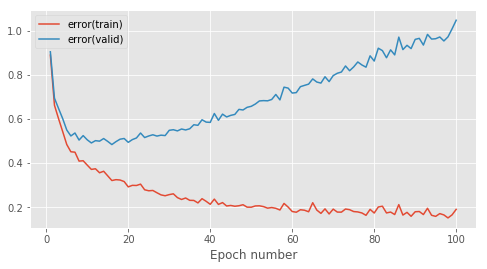

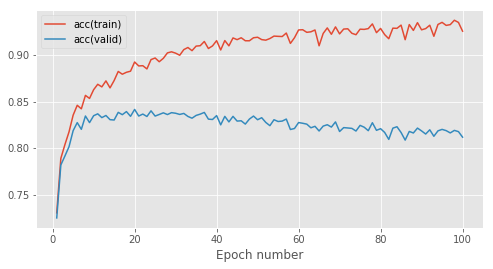

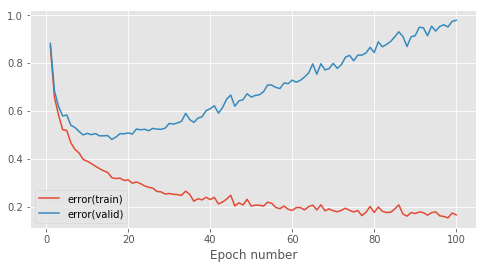

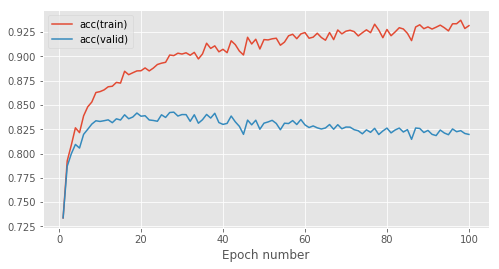

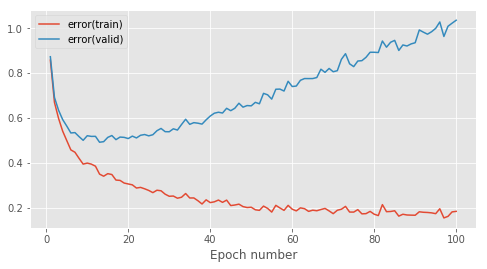

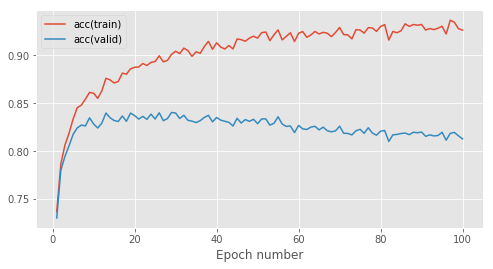

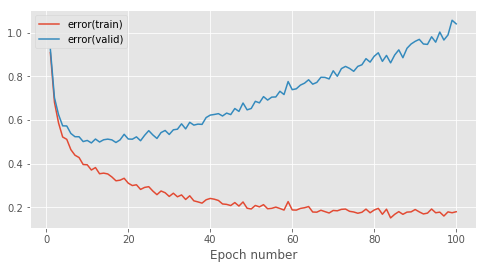

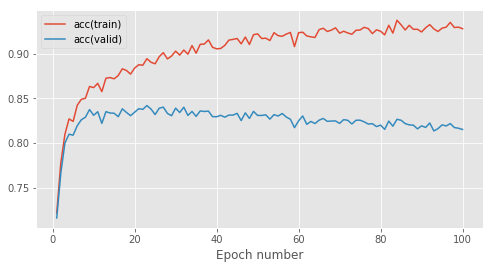

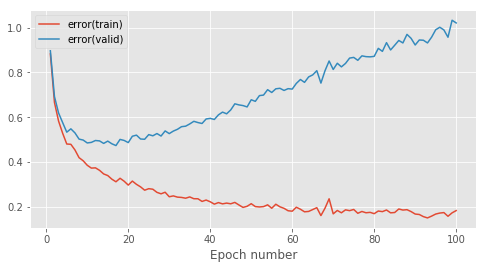

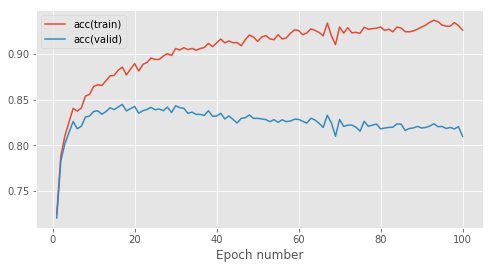

In [6]:
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats3 = sum_stats/run_times

Epoch 1: 6.6s to complete
    error(train)=9.48e-01, acc(train)=7.04e-01, error(valid)=9.75e-01, acc(valid)=6.95e-01


Epoch 2: 6.7s to complete
    error(train)=6.74e-01, acc(train)=7.82e-01, error(valid)=7.04e-01, acc(valid)=7.76e-01


Epoch 3: 6.7s to complete
    error(train)=6.36e-01, acc(train)=7.92e-01, error(valid)=6.88e-01, acc(valid)=7.81e-01


Epoch 4: 7.0s to complete
    error(train)=5.40e-01, acc(train)=8.18e-01, error(valid)=6.04e-01, acc(valid)=8.01e-01


Epoch 5: 6.2s to complete
    error(train)=4.93e-01, acc(train)=8.28e-01, error(valid)=5.60e-01, acc(valid)=8.13e-01


Epoch 6: 6.5s to complete
    error(train)=4.55e-01, acc(train)=8.41e-01, error(valid)=5.40e-01, acc(valid)=8.20e-01


Epoch 7: 6.8s to complete
    error(train)=4.16e-01, acc(train)=8.54e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


Epoch 8: 6.3s to complete
    error(train)=4.28e-01, acc(train)=8.48e-01, error(valid)=5.32e-01, acc(valid)=8.21e-01


Epoch 9: 6.2s to complete
    error(train)=4.01e-01, acc(train)=8.58e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 10: 6.5s to complete
    error(train)=4.07e-01, acc(train)=8.55e-01, error(valid)=5.35e-01, acc(valid)=8.25e-01


Epoch 11: 6.6s to complete
    error(train)=3.86e-01, acc(train)=8.61e-01, error(valid)=5.21e-01, acc(valid)=8.25e-01


Epoch 12: 6.3s to complete
    error(train)=3.59e-01, acc(train)=8.68e-01, error(valid)=4.94e-01, acc(valid)=8.32e-01


Epoch 13: 6.5s to complete
    error(train)=3.50e-01, acc(train)=8.73e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


Epoch 14: 5.6s to complete
    error(train)=3.45e-01, acc(train)=8.73e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 15: 6.7s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


Epoch 16: 5.7s to complete
    error(train)=3.26e-01, acc(train)=8.79e-01, error(valid)=5.05e-01, acc(valid)=8.32e-01


Epoch 17: 6.5s to complete
    error(train)=3.15e-01, acc(train)=8.81e-01, error(valid)=5.10e-01, acc(valid)=8.35e-01


Epoch 18: 6.4s to complete
    error(train)=3.13e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.32e-01


Epoch 19: 6.5s to complete
    error(train)=3.04e-01, acc(train)=8.85e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 20: 6.6s to complete
    error(train)=3.01e-01, acc(train)=8.86e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 21: 6.8s to complete
    error(train)=2.90e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 22: 6.4s to complete
    error(train)=2.79e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 23: 6.0s to complete
    error(train)=2.58e-01, acc(train)=9.03e-01, error(valid)=5.02e-01, acc(valid)=8.44e-01


Epoch 24: 6.2s to complete
    error(train)=2.80e-01, acc(train)=8.93e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


Epoch 25: 6.6s to complete
    error(train)=2.69e-01, acc(train)=8.96e-01, error(valid)=5.38e-01, acc(valid)=8.35e-01


Epoch 26: 6.4s to complete
    error(train)=2.67e-01, acc(train)=8.95e-01, error(valid)=5.41e-01, acc(valid)=8.31e-01


Epoch 27: 6.7s to complete
    error(train)=2.56e-01, acc(train)=9.01e-01, error(valid)=5.32e-01, acc(valid)=8.37e-01


Epoch 28: 6.6s to complete
    error(train)=2.42e-01, acc(train)=9.06e-01, error(valid)=5.39e-01, acc(valid)=8.40e-01


Epoch 29: 6.8s to complete
    error(train)=2.49e-01, acc(train)=9.03e-01, error(valid)=5.46e-01, acc(valid)=8.38e-01


Epoch 30: 7.0s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.56e-01, acc(valid)=8.36e-01


Epoch 31: 6.6s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


Epoch 32: 6.5s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=5.62e-01, acc(valid)=8.34e-01


Epoch 33: 6.6s to complete
    error(train)=2.57e-01, acc(train)=8.98e-01, error(valid)=5.91e-01, acc(valid)=8.24e-01


Epoch 34: 6.4s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.80e-01, acc(valid)=8.37e-01


Epoch 35: 6.5s to complete
    error(train)=2.70e-01, acc(train)=8.95e-01, error(valid)=6.30e-01, acc(valid)=8.22e-01


Epoch 36: 6.6s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=6.01e-01, acc(valid)=8.33e-01


Epoch 37: 6.8s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=5.90e-01, acc(valid)=8.34e-01


Epoch 38: 6.5s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=6.10e-01, acc(valid)=8.33e-01


Epoch 39: 7.4s to complete
    error(train)=2.46e-01, acc(train)=9.04e-01, error(valid)=6.31e-01, acc(valid)=8.26e-01


Epoch 40: 6.5s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=6.26e-01, acc(valid)=8.30e-01


Epoch 41: 6.2s to complete
    error(train)=2.26e-01, acc(train)=9.09e-01, error(valid)=6.26e-01, acc(valid)=8.29e-01


Epoch 42: 5.9s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=6.62e-01, acc(valid)=8.27e-01


Epoch 43: 6.7s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=6.50e-01, acc(valid)=8.30e-01


Epoch 44: 6.8s to complete
    error(train)=2.46e-01, acc(train)=9.02e-01, error(valid)=6.81e-01, acc(valid)=8.22e-01


Epoch 45: 6.4s to complete
    error(train)=2.14e-01, acc(train)=9.13e-01, error(valid)=6.50e-01, acc(valid)=8.31e-01


Epoch 46: 6.6s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=6.79e-01, acc(valid)=8.20e-01


Epoch 47: 6.6s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=6.74e-01, acc(valid)=8.28e-01


Epoch 48: 6.6s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=6.53e-01, acc(valid)=8.33e-01


Epoch 49: 6.7s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.96e-01, acc(valid)=8.31e-01


Epoch 50: 6.7s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.88e-01, acc(valid)=8.28e-01


Epoch 51: 6.7s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=6.95e-01, acc(valid)=8.31e-01


Epoch 52: 6.6s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=7.36e-01, acc(valid)=8.24e-01


Epoch 53: 7.1s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=7.01e-01, acc(valid)=8.27e-01


Epoch 54: 7.4s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=7.26e-01, acc(valid)=8.23e-01


Epoch 55: 6.3s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.09e-01, acc(valid)=8.28e-01


Epoch 56: 7.1s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=7.37e-01, acc(valid)=8.29e-01


Epoch 57: 7.4s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=7.75e-01, acc(valid)=8.24e-01


Epoch 58: 6.6s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=7.33e-01, acc(valid)=8.26e-01


Epoch 59: 6.7s to complete
    error(train)=2.20e-01, acc(train)=9.10e-01, error(valid)=7.75e-01, acc(valid)=8.20e-01


Epoch 60: 6.5s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=7.74e-01, acc(valid)=8.21e-01


Epoch 61: 6.8s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=7.30e-01, acc(valid)=8.31e-01


Epoch 62: 6.9s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.41e-01, acc(valid)=8.26e-01


Epoch 63: 6.7s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.59e-01, acc(valid)=8.25e-01


Epoch 64: 6.5s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=7.69e-01, acc(valid)=8.24e-01


Epoch 65: 6.6s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=7.51e-01, acc(valid)=8.29e-01


Epoch 66: 6.3s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=7.72e-01, acc(valid)=8.26e-01


Epoch 67: 6.5s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=8.03e-01, acc(valid)=8.21e-01


Epoch 68: 6.2s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=8.02e-01, acc(valid)=8.22e-01


Epoch 69: 6.3s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=8.08e-01, acc(valid)=8.22e-01


Epoch 70: 6.7s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=7.96e-01, acc(valid)=8.25e-01


Epoch 71: 6.6s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=8.24e-01, acc(valid)=8.18e-01


Epoch 72: 6.6s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=7.99e-01, acc(valid)=8.20e-01


Epoch 73: 6.6s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=8.75e-01, acc(valid)=8.16e-01


Epoch 74: 6.5s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=8.27e-01, acc(valid)=8.22e-01


Epoch 75: 6.6s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=8.73e-01, acc(valid)=8.19e-01


Epoch 76: 6.8s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=8.65e-01, acc(valid)=8.19e-01


Epoch 77: 6.4s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=8.83e-01, acc(valid)=8.21e-01


Epoch 78: 6.0s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.58e-01, acc(valid)=8.22e-01


Epoch 79: 6.1s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=8.81e-01, acc(valid)=8.24e-01


Epoch 80: 6.3s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=9.03e-01, acc(valid)=8.17e-01


Epoch 81: 6.5s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.88e-01, acc(valid)=8.22e-01


Epoch 82: 6.3s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=8.93e-01, acc(valid)=8.16e-01


Epoch 83: 6.5s to complete
    error(train)=2.33e-01, acc(train)=9.09e-01, error(valid)=9.46e-01, acc(valid)=8.06e-01


Epoch 84: 6.1s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=8.76e-01, acc(valid)=8.16e-01


Epoch 85: 6.5s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=9.25e-01, acc(valid)=8.18e-01


Epoch 86: 7.5s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=9.16e-01, acc(valid)=8.19e-01


Epoch 87: 6.6s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=9.12e-01, acc(valid)=8.19e-01


Epoch 88: 6.6s to complete
    error(train)=1.93e-01, acc(train)=9.24e-01, error(valid)=9.19e-01, acc(valid)=8.19e-01


Epoch 89: 6.3s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=9.40e-01, acc(valid)=8.16e-01


Epoch 90: 7.4s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=9.38e-01, acc(valid)=8.14e-01


Epoch 91: 6.6s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=9.50e-01, acc(valid)=8.21e-01


Epoch 92: 6.6s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=9.37e-01, acc(valid)=8.18e-01


Epoch 93: 6.8s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=9.92e-01, acc(valid)=8.17e-01


Epoch 94: 6.3s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=9.77e-01, acc(valid)=8.19e-01


Epoch 95: 6.3s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=9.43e-01, acc(valid)=8.19e-01


Epoch 96: 6.3s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=9.27e-01, acc(valid)=8.19e-01


Epoch 97: 6.3s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=9.69e-01, acc(valid)=8.15e-01


Epoch 98: 6.3s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=9.54e-01, acc(valid)=8.17e-01


Epoch 99: 6.4s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=9.64e-01, acc(valid)=8.20e-01


Epoch 100: 6.1s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=1.01e+00, acc(valid)=8.18e-01


Epoch 1: 6.2s to complete
    error(train)=8.47e-01, acc(train)=7.29e-01, error(valid)=8.62e-01, acc(valid)=7.23e-01


Epoch 2: 6.8s to complete
    error(train)=6.88e-01, acc(train)=7.78e-01, error(valid)=7.18e-01, acc(valid)=7.69e-01


Epoch 3: 6.6s to complete
    error(train)=5.75e-01, acc(train)=8.09e-01, error(valid)=6.20e-01, acc(valid)=7.95e-01


Epoch 4: 6.4s to complete
    error(train)=5.45e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=8.01e-01


Epoch 5: 7.2s to complete
    error(train)=4.79e-01, acc(train)=8.36e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


Epoch 6: 7.2s to complete
    error(train)=4.49e-01, acc(train)=8.42e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


Epoch 7: 7.1s to complete
    error(train)=4.40e-01, acc(train)=8.47e-01, error(valid)=5.26e-01, acc(valid)=8.23e-01


Epoch 8: 6.3s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


Epoch 9: 6.6s to complete
    error(train)=4.36e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.18e-01


Epoch 10: 6.0s to complete
    error(train)=3.66e-01, acc(train)=8.68e-01, error(valid)=4.83e-01, acc(valid)=8.37e-01


Epoch 11: 6.2s to complete
    error(train)=3.61e-01, acc(train)=8.70e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


Epoch 12: 6.7s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=4.88e-01, acc(valid)=8.38e-01


Epoch 13: 6.8s to complete
    error(train)=3.45e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 14: 8.0s to complete
    error(train)=3.28e-01, acc(train)=8.81e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


Epoch 15: 6.5s to complete
    error(train)=3.36e-01, acc(train)=8.74e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


Epoch 16: 6.3s to complete
    error(train)=3.24e-01, acc(train)=8.79e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 17: 6.1s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 18: 6.4s to complete
    error(train)=3.16e-01, acc(train)=8.81e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 19: 6.3s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=4.92e-01, acc(valid)=8.47e-01


Epoch 20: 6.5s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=4.98e-01, acc(valid)=8.44e-01


Epoch 21: 6.5s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=5.11e-01, acc(valid)=8.42e-01


Epoch 22: 6.4s to complete
    error(train)=2.76e-01, acc(train)=8.95e-01, error(valid)=5.18e-01, acc(valid)=8.40e-01


Epoch 23: 7.8s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


Epoch 24: 7.0s to complete
    error(train)=2.73e-01, acc(train)=8.95e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 25: 6.8s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=5.32e-01, acc(valid)=8.40e-01


Epoch 26: 6.4s to complete
    error(train)=2.60e-01, acc(train)=8.99e-01, error(valid)=5.37e-01, acc(valid)=8.37e-01


Epoch 27: 6.3s to complete
    error(train)=2.55e-01, acc(train)=9.00e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


Epoch 28: 6.8s to complete
    error(train)=2.51e-01, acc(train)=9.01e-01, error(valid)=5.47e-01, acc(valid)=8.35e-01


Epoch 29: 6.9s to complete
    error(train)=2.54e-01, acc(train)=9.00e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


Epoch 30: 6.9s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.38e-01


Epoch 31: 6.5s to complete
    error(train)=2.50e-01, acc(train)=9.03e-01, error(valid)=5.63e-01, acc(valid)=8.40e-01


Epoch 32: 6.4s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=5.60e-01, acc(valid)=8.38e-01


Epoch 33: 6.5s to complete
    error(train)=2.66e-01, acc(train)=8.96e-01, error(valid)=5.94e-01, acc(valid)=8.26e-01


Epoch 34: 6.8s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=5.50e-01, acc(valid)=8.38e-01


Epoch 35: 6.8s to complete
    error(train)=2.46e-01, acc(train)=9.03e-01, error(valid)=6.04e-01, acc(valid)=8.32e-01


Epoch 36: 6.2s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=5.85e-01, acc(valid)=8.39e-01


Epoch 37: 6.5s to complete
    error(train)=2.64e-01, acc(train)=8.97e-01, error(valid)=6.44e-01, acc(valid)=8.29e-01


Epoch 38: 6.9s to complete
    error(train)=2.31e-01, acc(train)=9.07e-01, error(valid)=6.10e-01, acc(valid)=8.35e-01


Epoch 39: 7.6s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=6.28e-01, acc(valid)=8.39e-01


Epoch 40: 6.4s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=6.37e-01, acc(valid)=8.29e-01


Epoch 41: 6.3s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.24e-01, acc(valid)=8.34e-01


Epoch 42: 6.2s to complete
    error(train)=2.36e-01, acc(train)=9.06e-01, error(valid)=6.60e-01, acc(valid)=8.29e-01


Epoch 43: 6.7s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=6.61e-01, acc(valid)=8.34e-01


Epoch 44: 6.8s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.18e-01, acc(valid)=8.36e-01


Epoch 45: 6.4s to complete
    error(train)=2.13e-01, acc(train)=9.14e-01, error(valid)=6.48e-01, acc(valid)=8.36e-01


Epoch 46: 6.5s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=6.79e-01, acc(valid)=8.30e-01


Epoch 47: 6.8s to complete
    error(train)=2.18e-01, acc(train)=9.11e-01, error(valid)=6.61e-01, acc(valid)=8.31e-01


Epoch 48: 6.5s to complete
    error(train)=2.49e-01, acc(train)=9.05e-01, error(valid)=7.27e-01, acc(valid)=8.24e-01


Epoch 49: 8.3s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=7.03e-01, acc(valid)=8.27e-01


Epoch 50: 5.7s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=6.87e-01, acc(valid)=8.32e-01


Epoch 51: 7.8s to complete
    error(train)=2.24e-01, acc(train)=9.07e-01, error(valid)=7.14e-01, acc(valid)=8.19e-01


Epoch 52: 7.0s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.96e-01, acc(valid)=8.27e-01


Epoch 53: 6.8s to complete
    error(train)=1.90e-01, acc(train)=9.21e-01, error(valid)=6.98e-01, acc(valid)=8.26e-01


Epoch 54: 7.3s to complete
    error(train)=2.10e-01, acc(train)=9.14e-01, error(valid)=7.32e-01, acc(valid)=8.23e-01


Epoch 55: 6.2s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.25e-01, acc(valid)=8.30e-01


Epoch 56: 7.6s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=7.16e-01, acc(valid)=8.33e-01


Epoch 57: 6.5s to complete
    error(train)=2.04e-01, acc(train)=9.16e-01, error(valid)=7.72e-01, acc(valid)=8.23e-01


Epoch 58: 6.7s to complete
    error(train)=2.11e-01, acc(train)=9.13e-01, error(valid)=7.80e-01, acc(valid)=8.21e-01


Epoch 59: 6.7s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=7.55e-01, acc(valid)=8.28e-01


Epoch 60: 6.4s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=7.76e-01, acc(valid)=8.20e-01


Epoch 61: 6.4s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=7.47e-01, acc(valid)=8.24e-01


Epoch 62: 6.4s to complete
    error(train)=1.98e-01, acc(train)=9.18e-01, error(valid)=7.74e-01, acc(valid)=8.22e-01


Epoch 63: 7.7s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=8.08e-01, acc(valid)=8.21e-01


Epoch 64: 6.7s to complete
    error(train)=1.99e-01, acc(train)=9.18e-01, error(valid)=8.05e-01, acc(valid)=8.26e-01


Epoch 65: 6.5s to complete
    error(train)=1.99e-01, acc(train)=9.18e-01, error(valid)=7.86e-01, acc(valid)=8.23e-01


Epoch 66: 6.4s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=7.98e-01, acc(valid)=8.23e-01


Epoch 67: 6.9s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.67e-01, acc(valid)=8.29e-01


Epoch 68: 5.5s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.87e-01, acc(valid)=8.22e-01


Epoch 69: 6.4s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=8.16e-01, acc(valid)=8.32e-01


Epoch 70: 6.7s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=8.03e-01, acc(valid)=8.24e-01


Epoch 71: 8.0s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=8.33e-01, acc(valid)=8.26e-01


Epoch 72: 5.3s to complete
    error(train)=1.70e-01, acc(train)=9.29e-01, error(valid)=8.04e-01, acc(valid)=8.33e-01


Epoch 73: 5.8s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=8.15e-01, acc(valid)=8.26e-01


Epoch 74: 6.4s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.36e-01, acc(valid)=8.28e-01


Epoch 75: 6.3s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=8.83e-01, acc(valid)=8.16e-01


Epoch 76: 6.2s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=8.43e-01, acc(valid)=8.21e-01


Epoch 77: 6.4s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.18e-01, acc(valid)=8.27e-01


Epoch 78: 6.5s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=8.79e-01, acc(valid)=8.22e-01


Epoch 79: 6.4s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=8.52e-01, acc(valid)=8.27e-01


Epoch 80: 6.5s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=8.64e-01, acc(valid)=8.18e-01


Epoch 81: 6.8s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=8.81e-01, acc(valid)=8.23e-01


Epoch 82: 7.8s to complete
    error(train)=2.28e-01, acc(train)=9.15e-01, error(valid)=9.55e-01, acc(valid)=8.15e-01


Epoch 83: 6.4s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.92e-01, acc(valid)=8.23e-01


Epoch 84: 6.3s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.75e-01, acc(valid)=8.22e-01


Epoch 85: 7.0s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=8.86e-01, acc(valid)=8.23e-01


Epoch 86: 5.9s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=9.10e-01, acc(valid)=8.23e-01


Epoch 87: 6.6s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.93e-01, acc(valid)=8.24e-01


Epoch 88: 6.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=9.14e-01, acc(valid)=8.24e-01


Epoch 89: 5.9s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=9.07e-01, acc(valid)=8.25e-01


Epoch 90: 6.5s to complete
    error(train)=2.11e-01, acc(train)=9.20e-01, error(valid)=9.61e-01, acc(valid)=8.19e-01


Epoch 91: 6.7s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=9.58e-01, acc(valid)=8.18e-01


Epoch 92: 6.1s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.22e-01, acc(valid)=8.21e-01


Epoch 93: 6.3s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=9.40e-01, acc(valid)=8.18e-01


Epoch 94: 6.1s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=9.98e-01, acc(valid)=8.16e-01


Epoch 95: 6.4s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=9.78e-01, acc(valid)=8.21e-01


Epoch 96: 6.2s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=9.59e-01, acc(valid)=8.21e-01


Epoch 97: 6.4s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=9.73e-01, acc(valid)=8.20e-01


Epoch 98: 6.6s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=9.94e-01, acc(valid)=8.17e-01


Epoch 99: 6.5s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.61e-01, acc(valid)=8.19e-01


Epoch 100: 7.2s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=9.72e-01, acc(valid)=8.17e-01


Epoch 1: 7.1s to complete
    error(train)=9.08e-01, acc(train)=7.20e-01, error(valid)=9.31e-01, acc(valid)=7.11e-01


Epoch 2: 7.0s to complete
    error(train)=6.70e-01, acc(train)=7.80e-01, error(valid)=6.97e-01, acc(valid)=7.69e-01


Epoch 3: 6.2s to complete
    error(train)=5.89e-01, acc(train)=8.03e-01, error(valid)=6.29e-01, acc(valid)=7.90e-01


Epoch 4: 6.3s to complete
    error(train)=5.18e-01, acc(train)=8.27e-01, error(valid)=5.69e-01, acc(valid)=8.11e-01


Epoch 5: 7.4s to complete
    error(train)=4.82e-01, acc(train)=8.35e-01, error(valid)=5.44e-01, acc(valid)=8.20e-01


Epoch 6: 6.5s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.46e-01, acc(valid)=8.21e-01


Epoch 7: 6.1s to complete
    error(train)=4.41e-01, acc(train)=8.47e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


Epoch 8: 6.8s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


Epoch 9: 6.7s to complete
    error(train)=3.95e-01, acc(train)=8.58e-01, error(valid)=4.98e-01, acc(valid)=8.31e-01


Epoch 10: 6.4s to complete
    error(train)=3.84e-01, acc(train)=8.64e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


Epoch 11: 6.3s to complete
    error(train)=3.70e-01, acc(train)=8.67e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 12: 7.7s to complete
    error(train)=3.70e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.29e-01


Epoch 13: 6.2s to complete
    error(train)=3.43e-01, acc(train)=8.77e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


Epoch 14: 6.5s to complete
    error(train)=3.78e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.19e-01


Epoch 15: 6.7s to complete
    error(train)=3.43e-01, acc(train)=8.75e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 16: 6.9s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=4.85e-01, acc(valid)=8.37e-01


Epoch 17: 6.7s to complete
    error(train)=3.24e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 18: 5.1s to complete
    error(train)=3.01e-01, acc(train)=8.86e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 19: 6.7s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 20: 6.4s to complete
    error(train)=2.88e-01, acc(train)=8.92e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 21: 6.6s to complete
    error(train)=2.87e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


Epoch 22: 7.1s to complete
    error(train)=2.84e-01, acc(train)=8.91e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 23: 6.8s to complete
    error(train)=2.86e-01, acc(train)=8.91e-01, error(valid)=5.32e-01, acc(valid)=8.35e-01


Epoch 24: 7.0s to complete
    error(train)=2.90e-01, acc(train)=8.88e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 25: 6.2s to complete
    error(train)=2.90e-01, acc(train)=8.88e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01


Epoch 26: 6.4s to complete
    error(train)=2.66e-01, acc(train)=8.97e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


Epoch 27: 6.5s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


Epoch 28: 6.2s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=5.43e-01, acc(valid)=8.37e-01


Epoch 29: 7.3s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.52e-01, acc(valid)=8.35e-01


Epoch 30: 6.7s to complete
    error(train)=2.51e-01, acc(train)=9.00e-01, error(valid)=5.65e-01, acc(valid)=8.29e-01


Epoch 31: 6.4s to complete
    error(train)=2.41e-01, acc(train)=9.02e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


Epoch 32: 6.5s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=5.81e-01, acc(valid)=8.35e-01


Epoch 33: 6.7s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=5.54e-01, acc(valid)=8.36e-01


Epoch 34: 6.6s to complete
    error(train)=2.48e-01, acc(train)=9.01e-01, error(valid)=5.87e-01, acc(valid)=8.30e-01


Epoch 35: 6.3s to complete
    error(train)=2.36e-01, acc(train)=9.06e-01, error(valid)=5.92e-01, acc(valid)=8.27e-01


Epoch 36: 6.7s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=6.01e-01, acc(valid)=8.31e-01


Epoch 37: 7.5s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 38: 6.4s to complete
    error(train)=2.31e-01, acc(train)=9.07e-01, error(valid)=6.09e-01, acc(valid)=8.29e-01


Epoch 39: 6.3s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=5.93e-01, acc(valid)=8.33e-01


Epoch 40: 7.4s to complete
    error(train)=2.19e-01, acc(train)=9.10e-01, error(valid)=6.15e-01, acc(valid)=8.34e-01


Epoch 41: 6.5s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=6.08e-01, acc(valid)=8.30e-01


Epoch 42: 5.9s to complete
    error(train)=2.30e-01, acc(train)=9.06e-01, error(valid)=6.49e-01, acc(valid)=8.24e-01


Epoch 43: 5.8s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=6.50e-01, acc(valid)=8.30e-01


Epoch 44: 6.4s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=7.06e-01, acc(valid)=8.23e-01


Epoch 45: 6.5s to complete
    error(train)=2.06e-01, acc(train)=9.15e-01, error(valid)=6.46e-01, acc(valid)=8.29e-01


Epoch 46: 7.0s to complete
    error(train)=2.07e-01, acc(train)=9.15e-01, error(valid)=6.42e-01, acc(valid)=8.29e-01


Epoch 47: 6.4s to complete
    error(train)=2.15e-01, acc(train)=9.11e-01, error(valid)=6.90e-01, acc(valid)=8.25e-01


Epoch 48: 6.3s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.76e-01, acc(valid)=8.28e-01


Epoch 49: 7.2s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.89e-01, acc(valid)=8.27e-01


Epoch 50: 6.9s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.97e-01, acc(valid)=8.24e-01


Epoch 51: 6.9s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=6.89e-01, acc(valid)=8.31e-01


Epoch 52: 7.3s to complete
    error(train)=2.86e-01, acc(train)=8.90e-01, error(valid)=8.04e-01, acc(valid)=8.07e-01


Epoch 53: 6.3s to complete
    error(train)=1.91e-01, acc(train)=9.21e-01, error(valid)=6.89e-01, acc(valid)=8.32e-01


Epoch 54: 7.8s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.13e-01, acc(valid)=8.25e-01


Epoch 55: 6.5s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=7.17e-01, acc(valid)=8.25e-01


Epoch 56: 7.4s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=7.47e-01, acc(valid)=8.25e-01


Epoch 57: 6.7s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=7.17e-01, acc(valid)=8.34e-01


Epoch 58: 7.7s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=7.74e-01, acc(valid)=8.16e-01


Epoch 59: 6.6s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=7.53e-01, acc(valid)=8.23e-01


Epoch 60: 7.6s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=7.20e-01, acc(valid)=8.29e-01


Epoch 61: 6.4s to complete
    error(train)=2.00e-01, acc(train)=9.17e-01, error(valid)=7.69e-01, acc(valid)=8.26e-01


Epoch 62: 6.5s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.61e-01, acc(valid)=8.26e-01


Epoch 63: 8.1s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=7.74e-01, acc(valid)=8.23e-01


Epoch 64: 8.0s to complete
    error(train)=2.04e-01, acc(train)=9.16e-01, error(valid)=8.03e-01, acc(valid)=8.17e-01


Epoch 65: 6.4s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=7.86e-01, acc(valid)=8.24e-01


Epoch 66: 6.1s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=7.83e-01, acc(valid)=8.29e-01


Epoch 67: 6.6s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=7.31e-01, acc(valid)=8.26e-01


Epoch 68: 6.9s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=8.11e-01, acc(valid)=8.19e-01


Epoch 69: 6.1s to complete
    error(train)=1.88e-01, acc(train)=9.22e-01, error(valid)=8.02e-01, acc(valid)=8.24e-01


Epoch 70: 7.2s to complete
    error(train)=2.76e-01, acc(train)=8.99e-01, error(valid)=8.94e-01, acc(valid)=8.08e-01


Epoch 71: 6.5s to complete
    error(train)=2.09e-01, acc(train)=9.18e-01, error(valid)=8.66e-01, acc(valid)=8.25e-01


Epoch 72: 8.3s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=8.16e-01, acc(valid)=8.23e-01


Epoch 73: 5.7s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.47e-01, acc(valid)=8.25e-01


Epoch 74: 6.8s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.12e-01, acc(valid)=8.26e-01


Epoch 75: 6.8s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=8.80e-01, acc(valid)=8.26e-01


Epoch 76: 5.8s to complete
    error(train)=1.87e-01, acc(train)=9.22e-01, error(valid)=8.37e-01, acc(valid)=8.22e-01


Epoch 77: 6.7s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=8.53e-01, acc(valid)=8.23e-01


Epoch 78: 6.8s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.67e-01, acc(valid)=8.23e-01


Epoch 79: 6.4s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=8.53e-01, acc(valid)=8.22e-01


Epoch 80: 6.3s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=8.66e-01, acc(valid)=8.25e-01


Epoch 81: 6.6s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=8.56e-01, acc(valid)=8.27e-01


Epoch 82: 6.4s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.57e-01, acc(valid)=8.21e-01


Epoch 83: 6.2s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.72e-01, acc(valid)=8.25e-01


Epoch 84: 6.6s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=8.70e-01, acc(valid)=8.23e-01


Epoch 85: 6.9s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=8.63e-01, acc(valid)=8.22e-01


Epoch 86: 6.7s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=8.94e-01, acc(valid)=8.26e-01


Epoch 87: 6.7s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=9.16e-01, acc(valid)=8.20e-01


Epoch 88: 5.4s to complete
    error(train)=1.65e-01, acc(train)=9.31e-01, error(valid)=8.90e-01, acc(valid)=8.24e-01


Epoch 89: 5.7s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=8.66e-01, acc(valid)=8.22e-01


Epoch 90: 6.6s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=9.17e-01, acc(valid)=8.19e-01


Epoch 91: 6.0s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.94e-01, acc(valid)=8.25e-01


Epoch 92: 5.9s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=9.23e-01, acc(valid)=8.17e-01


Epoch 93: 5.7s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=9.27e-01, acc(valid)=8.19e-01


Epoch 94: 7.4s to complete
    error(train)=2.03e-01, acc(train)=9.23e-01, error(valid)=9.49e-01, acc(valid)=8.18e-01


Epoch 95: 7.1s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=9.40e-01, acc(valid)=8.18e-01


Epoch 96: 6.7s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=9.38e-01, acc(valid)=8.23e-01


Epoch 97: 7.1s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=1.02e+00, acc(valid)=8.10e-01


Epoch 98: 6.3s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=9.70e-01, acc(valid)=8.21e-01


Epoch 99: 7.5s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=9.75e-01, acc(valid)=8.15e-01


Epoch 100: 5.9s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.64e-01, acc(valid)=8.17e-01


Epoch 1: 6.6s to complete
    error(train)=9.25e-01, acc(train)=7.07e-01, error(valid)=9.45e-01, acc(valid)=7.02e-01


Epoch 2: 6.6s to complete
    error(train)=7.04e-01, acc(train)=7.74e-01, error(valid)=7.36e-01, acc(valid)=7.65e-01


Epoch 3: 7.0s to complete
    error(train)=5.82e-01, acc(train)=8.07e-01, error(valid)=6.25e-01, acc(valid)=7.94e-01


Epoch 4: 6.8s to complete
    error(train)=5.22e-01, acc(train)=8.26e-01, error(valid)=5.77e-01, acc(valid)=8.08e-01


Epoch 5: 6.9s to complete
    error(train)=4.79e-01, acc(train)=8.36e-01, error(valid)=5.46e-01, acc(valid)=8.19e-01


Epoch 6: 6.3s to complete
    error(train)=4.59e-01, acc(train)=8.37e-01, error(valid)=5.39e-01, acc(valid)=8.15e-01


Epoch 7: 5.6s to complete
    error(train)=4.34e-01, acc(train)=8.49e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


Epoch 8: 6.4s to complete
    error(train)=4.23e-01, acc(train)=8.48e-01, error(valid)=5.26e-01, acc(valid)=8.21e-01


Epoch 9: 7.6s to complete
    error(train)=3.93e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.33e-01


Epoch 10: 6.6s to complete
    error(train)=4.08e-01, acc(train)=8.55e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


Epoch 11: 7.5s to complete
    error(train)=4.01e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.21e-01


Epoch 12: 7.7s to complete
    error(train)=3.46e-01, acc(train)=8.73e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


Epoch 13: 6.3s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


Epoch 14: 6.3s to complete
    error(train)=3.48e-01, acc(train)=8.72e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 15: 7.8s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


Epoch 16: 6.7s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 17: 6.2s to complete
    error(train)=3.11e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 18: 6.7s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 19: 7.0s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 20: 5.4s to complete
    error(train)=2.93e-01, acc(train)=8.90e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 21: 6.4s to complete
    error(train)=2.85e-01, acc(train)=8.91e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 22: 6.6s to complete
    error(train)=2.80e-01, acc(train)=8.93e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 23: 7.1s to complete
    error(train)=3.23e-01, acc(train)=8.74e-01, error(valid)=5.83e-01, acc(valid)=8.19e-01


Epoch 24: 6.8s to complete
    error(train)=2.83e-01, acc(train)=8.90e-01, error(valid)=5.58e-01, acc(valid)=8.31e-01


Epoch 25: 6.1s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


Epoch 26: 6.9s to complete
    error(train)=2.66e-01, acc(train)=8.95e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


Epoch 27: 5.7s to complete
    error(train)=2.57e-01, acc(train)=9.00e-01, error(valid)=5.51e-01, acc(valid)=8.33e-01


Epoch 28: 6.3s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.52e-01, acc(valid)=8.36e-01


Epoch 29: 6.3s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=5.60e-01, acc(valid)=8.35e-01


Epoch 30: 6.2s to complete
    error(train)=2.88e-01, acc(train)=8.84e-01, error(valid)=6.07e-01, acc(valid)=8.19e-01


Epoch 31: 7.2s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=5.77e-01, acc(valid)=8.34e-01


Epoch 32: 7.4s to complete
    error(train)=2.42e-01, acc(train)=9.04e-01, error(valid)=5.59e-01, acc(valid)=8.35e-01


Epoch 33: 7.6s to complete
    error(train)=2.30e-01, acc(train)=9.07e-01, error(valid)=5.77e-01, acc(valid)=8.30e-01


Epoch 34: 6.9s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.71e-01, acc(valid)=8.37e-01


Epoch 35: 7.1s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=5.88e-01, acc(valid)=8.34e-01


Epoch 36: 6.4s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=6.07e-01, acc(valid)=8.29e-01


Epoch 37: 6.8s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=6.25e-01, acc(valid)=8.29e-01


Epoch 38: 6.9s to complete
    error(train)=2.41e-01, acc(train)=9.04e-01, error(valid)=6.40e-01, acc(valid)=8.27e-01


Epoch 39: 6.8s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.22e-01, acc(valid)=8.30e-01


Epoch 40: 6.5s to complete
    error(train)=2.35e-01, acc(train)=9.05e-01, error(valid)=6.41e-01, acc(valid)=8.24e-01


Epoch 41: 6.7s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=6.43e-01, acc(valid)=8.31e-01


Epoch 42: 6.6s to complete
    error(train)=2.12e-01, acc(train)=9.15e-01, error(valid)=6.35e-01, acc(valid)=8.33e-01


Epoch 43: 6.3s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=6.53e-01, acc(valid)=8.31e-01


Epoch 44: 6.1s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.60e-01, acc(valid)=8.31e-01


Epoch 45: 8.5s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01


Epoch 46: 6.8s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=6.50e-01, acc(valid)=8.32e-01


Epoch 47: 7.3s to complete
    error(train)=2.00e-01, acc(train)=9.18e-01, error(valid)=6.50e-01, acc(valid)=8.34e-01


Epoch 48: 9.1s to complete
    error(train)=2.00e-01, acc(train)=9.17e-01, error(valid)=6.62e-01, acc(valid)=8.28e-01


Epoch 49: 8.7s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=7.16e-01, acc(valid)=8.25e-01


Epoch 50: 7.3s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=6.89e-01, acc(valid)=8.33e-01


Epoch 51: 7.2s to complete
    error(train)=2.10e-01, acc(train)=9.13e-01, error(valid)=6.86e-01, acc(valid)=8.28e-01


Epoch 52: 6.6s to complete
    error(train)=1.97e-01, acc(train)=9.18e-01, error(valid)=7.06e-01, acc(valid)=8.28e-01


Epoch 53: 6.3s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.07e-01, acc(valid)=8.29e-01


Epoch 54: 6.7s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=7.03e-01, acc(valid)=8.27e-01


Epoch 55: 6.4s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=7.60e-01, acc(valid)=8.20e-01


Epoch 56: 6.3s to complete
    error(train)=2.02e-01, acc(train)=9.16e-01, error(valid)=7.24e-01, acc(valid)=8.22e-01


Epoch 57: 6.6s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.51e-01, acc(valid)=8.25e-01


Epoch 58: 7.1s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=7.53e-01, acc(valid)=8.29e-01


Epoch 59: 6.9s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=7.46e-01, acc(valid)=8.28e-01


Epoch 60: 6.3s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=7.87e-01, acc(valid)=8.17e-01


Epoch 61: 6.5s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.79e-01, acc(valid)=8.26e-01


Epoch 62: 6.6s to complete
    error(train)=1.90e-01, acc(train)=9.18e-01, error(valid)=7.69e-01, acc(valid)=8.21e-01


Epoch 63: 6.8s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=7.96e-01, acc(valid)=8.22e-01


Epoch 64: 6.6s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.87e-01, acc(valid)=8.25e-01


Epoch 65: 8.9s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=7.98e-01, acc(valid)=8.20e-01


Epoch 66: 8.8s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=8.24e-01, acc(valid)=8.16e-01


Epoch 67: 8.5s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.98e-01, acc(valid)=8.24e-01


Epoch 68: 8.6s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=8.20e-01, acc(valid)=8.24e-01


Epoch 69: 6.7s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.95e-01, acc(valid)=8.22e-01


Epoch 70: 7.1s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=7.92e-01, acc(valid)=8.26e-01


Epoch 71: 7.1s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.06e-01, acc(valid)=8.25e-01


Epoch 72: 6.9s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=8.56e-01, acc(valid)=8.17e-01


Epoch 73: 6.9s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=8.20e-01, acc(valid)=8.27e-01


Epoch 74: 6.9s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=8.16e-01, acc(valid)=8.25e-01


Epoch 75: 7.0s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=8.65e-01, acc(valid)=8.20e-01


Epoch 76: 6.9s to complete
    error(train)=1.87e-01, acc(train)=9.25e-01, error(valid)=8.75e-01, acc(valid)=8.23e-01


Epoch 77: 6.7s to complete
    error(train)=2.21e-01, acc(train)=9.14e-01, error(valid)=9.33e-01, acc(valid)=8.10e-01


Epoch 78: 7.9s to complete
    error(train)=1.81e-01, acc(train)=9.25e-01, error(valid)=8.68e-01, acc(valid)=8.20e-01


Epoch 79: 9.0s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=8.82e-01, acc(valid)=8.19e-01


Epoch 80: 7.1s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.91e-01, acc(valid)=8.20e-01


Epoch 81: 7.6s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.43e-01, acc(valid)=8.24e-01


Epoch 82: 7.3s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=8.78e-01, acc(valid)=8.19e-01


Epoch 83: 7.7s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=8.85e-01, acc(valid)=8.22e-01


Epoch 84: 7.0s to complete
    error(train)=1.94e-01, acc(train)=9.24e-01, error(valid)=9.02e-01, acc(valid)=8.19e-01


Epoch 85: 6.2s to complete
    error(train)=1.63e-01, acc(train)=9.31e-01, error(valid)=8.90e-01, acc(valid)=8.22e-01


Epoch 86: 8.6s to complete
    error(train)=1.97e-01, acc(train)=9.23e-01, error(valid)=9.24e-01, acc(valid)=8.19e-01


Epoch 87: 7.7s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=9.32e-01, acc(valid)=8.20e-01


Epoch 88: 7.2s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=9.71e-01, acc(valid)=8.17e-01


Epoch 89: 7.6s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=9.27e-01, acc(valid)=8.19e-01


Epoch 90: 10.5s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=9.64e-01, acc(valid)=8.12e-01


Epoch 91: 7.8s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=9.40e-01, acc(valid)=8.24e-01


Epoch 92: 7.4s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=9.09e-01, acc(valid)=8.19e-01


Epoch 93: 6.3s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=9.49e-01, acc(valid)=8.20e-01


Epoch 94: 7.3s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=9.75e-01, acc(valid)=8.18e-01


Epoch 95: 6.9s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=9.98e-01, acc(valid)=8.16e-01


Epoch 96: 7.4s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=9.78e-01, acc(valid)=8.20e-01


Epoch 97: 7.1s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=9.42e-01, acc(valid)=8.19e-01


Epoch 98: 7.2s to complete
    error(train)=1.64e-01, acc(train)=9.33e-01, error(valid)=9.67e-01, acc(valid)=8.20e-01


Epoch 99: 7.4s to complete
    error(train)=2.18e-01, acc(train)=9.17e-01, error(valid)=1.01e+00, acc(valid)=8.08e-01


Epoch 100: 7.2s to complete
    error(train)=2.03e-01, acc(train)=9.22e-01, error(valid)=1.02e+00, acc(valid)=8.15e-01


Epoch 1: 8.2s to complete
    error(train)=8.57e-01, acc(train)=7.34e-01, error(valid)=8.85e-01, acc(valid)=7.25e-01


Epoch 2: 7.3s to complete
    error(train)=6.71e-01, acc(train)=7.79e-01, error(valid)=7.12e-01, acc(valid)=7.69e-01


Epoch 3: 7.1s to complete
    error(train)=6.18e-01, acc(train)=7.96e-01, error(valid)=6.69e-01, acc(valid)=7.84e-01


Epoch 4: 7.0s to complete
    error(train)=5.14e-01, acc(train)=8.26e-01, error(valid)=5.72e-01, acc(valid)=8.10e-01


Epoch 5: 6.6s to complete
    error(train)=4.80e-01, acc(train)=8.34e-01, error(valid)=5.54e-01, acc(valid)=8.12e-01


Epoch 6: 7.4s to complete
    error(train)=4.58e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.18e-01


Epoch 7: 7.3s to complete
    error(train)=4.24e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.28e-01


Epoch 8: 2.2s to complete
    error(train)=4.22e-01, acc(train)=8.50e-01, error(valid)=5.25e-01, acc(valid)=8.23e-01


Epoch 9: 2.2s to complete
    error(train)=3.97e-01, acc(train)=8.58e-01, error(valid)=5.11e-01, acc(valid)=8.30e-01


Epoch 10: 2.1s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=5.08e-01, acc(valid)=8.29e-01


Epoch 11: 2.2s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 12: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 13: 2.3s to complete
    error(train)=3.50e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 14: 2.2s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 15: 2.3s to complete
    error(train)=3.43e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 16: 2.3s to complete
    error(train)=3.34e-01, acc(train)=8.75e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 17: 2.1s to complete
    error(train)=3.18e-01, acc(train)=8.81e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


Epoch 18: 2.3s to complete
    error(train)=3.06e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


Epoch 19: 2.2s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 20: 2.2s to complete
    error(train)=2.92e-01, acc(train)=8.88e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 21: 2.8s to complete
    error(train)=2.85e-01, acc(train)=8.91e-01, error(valid)=5.17e-01, acc(valid)=8.35e-01


Epoch 22: 2.1s to complete
    error(train)=2.97e-01, acc(train)=8.85e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 23: 2.1s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


Epoch 24: 2.1s to complete
    error(train)=2.67e-01, acc(train)=8.97e-01, error(valid)=5.34e-01, acc(valid)=8.38e-01


Epoch 25: 2.1s to complete
    error(train)=2.98e-01, acc(train)=8.86e-01, error(valid)=5.72e-01, acc(valid)=8.32e-01


Epoch 26: 2.1s to complete
    error(train)=2.67e-01, acc(train)=8.97e-01, error(valid)=5.48e-01, acc(valid)=8.35e-01


Epoch 27: 3.3s to complete
    error(train)=2.65e-01, acc(train)=8.96e-01, error(valid)=5.44e-01, acc(valid)=8.34e-01


Epoch 28: 2.2s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


Epoch 29: 2.7s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=5.59e-01, acc(valid)=8.32e-01


Epoch 30: 2.1s to complete
    error(train)=2.48e-01, acc(train)=9.02e-01, error(valid)=5.67e-01, acc(valid)=8.33e-01


Epoch 31: 2.2s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.67e-01, acc(valid)=8.35e-01


Epoch 32: 2.5s to complete
    error(train)=2.52e-01, acc(train)=9.00e-01, error(valid)=5.86e-01, acc(valid)=8.29e-01


Epoch 33: 2.3s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=5.98e-01, acc(valid)=8.31e-01


Epoch 34: 2.1s to complete
    error(train)=2.40e-01, acc(train)=9.04e-01, error(valid)=5.94e-01, acc(valid)=8.35e-01


Epoch 35: 2.1s to complete
    error(train)=2.51e-01, acc(train)=8.98e-01, error(valid)=6.18e-01, acc(valid)=8.27e-01


Epoch 36: 2.1s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=5.98e-01, acc(valid)=8.34e-01


Epoch 37: 2.1s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=6.01e-01, acc(valid)=8.34e-01


Epoch 38: 2.1s to complete
    error(train)=2.30e-01, acc(train)=9.06e-01, error(valid)=6.25e-01, acc(valid)=8.30e-01


Epoch 39: 2.0s to complete
    error(train)=2.23e-01, acc(train)=9.10e-01, error(valid)=6.30e-01, acc(valid)=8.34e-01


Epoch 40: 3.4s to complete
    error(train)=2.39e-01, acc(train)=9.04e-01, error(valid)=6.31e-01, acc(valid)=8.25e-01


Epoch 41: 2.1s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=6.72e-01, acc(valid)=8.26e-01


Epoch 42: 3.3s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=6.46e-01, acc(valid)=8.29e-01


Epoch 43: 2.2s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.57e-01, acc(valid)=8.28e-01


Epoch 44: 2.1s to complete
    error(train)=2.23e-01, acc(train)=9.10e-01, error(valid)=6.59e-01, acc(valid)=8.30e-01


Epoch 45: 2.1s to complete
    error(train)=2.27e-01, acc(train)=9.08e-01, error(valid)=6.81e-01, acc(valid)=8.25e-01


Epoch 46: 2.4s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=6.58e-01, acc(valid)=8.32e-01


Epoch 47: 2.1s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.88e-01, acc(valid)=8.30e-01


Epoch 48: 3.0s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=6.88e-01, acc(valid)=8.28e-01


Epoch 49: 2.1s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.92e-01, acc(valid)=8.29e-01


Epoch 50: 2.1s to complete
    error(train)=2.40e-01, acc(train)=9.05e-01, error(valid)=7.21e-01, acc(valid)=8.18e-01


Epoch 51: 2.1s to complete
    error(train)=2.01e-01, acc(train)=9.17e-01, error(valid)=7.05e-01, acc(valid)=8.30e-01


Epoch 52: 2.1s to complete
    error(train)=1.95e-01, acc(train)=9.20e-01, error(valid)=7.24e-01, acc(valid)=8.29e-01


Epoch 53: 2.1s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=7.14e-01, acc(valid)=8.28e-01


Epoch 54: 2.1s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.32e-01, acc(valid)=8.29e-01


Epoch 55: 2.1s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=7.19e-01, acc(valid)=8.33e-01


Epoch 56: 2.6s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=7.52e-01, acc(valid)=8.25e-01


Epoch 57: 2.1s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=7.90e-01, acc(valid)=8.25e-01


Epoch 58: 2.1s to complete
    error(train)=2.03e-01, acc(train)=9.16e-01, error(valid)=7.74e-01, acc(valid)=8.21e-01


Epoch 59: 2.1s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=8.10e-01, acc(valid)=8.20e-01


Epoch 60: 2.2s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=7.95e-01, acc(valid)=8.25e-01


Epoch 61: 2.1s to complete
    error(train)=2.00e-01, acc(train)=9.18e-01, error(valid)=7.81e-01, acc(valid)=8.28e-01


Epoch 62: 2.2s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.61e-01, acc(valid)=8.33e-01


Epoch 63: 2.1s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=8.02e-01, acc(valid)=8.25e-01


Epoch 64: 2.5s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=8.18e-01, acc(valid)=8.20e-01


Epoch 65: 2.3s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=8.26e-01, acc(valid)=8.19e-01


Epoch 66: 2.5s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=7.84e-01, acc(valid)=8.25e-01


Epoch 67: 2.0s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=8.07e-01, acc(valid)=8.21e-01


Epoch 68: 2.1s to complete
    error(train)=1.88e-01, acc(train)=9.22e-01, error(valid)=8.21e-01, acc(valid)=8.23e-01


Epoch 69: 2.0s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=8.12e-01, acc(valid)=8.28e-01


Epoch 70: 2.0s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=8.29e-01, acc(valid)=8.25e-01


Epoch 71: 2.1s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=8.59e-01, acc(valid)=8.18e-01


Epoch 72: 2.1s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=8.51e-01, acc(valid)=8.25e-01


Epoch 73: 2.1s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=8.54e-01, acc(valid)=8.24e-01


Epoch 74: 2.0s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=8.83e-01, acc(valid)=8.24e-01


Epoch 75: 2.0s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=8.69e-01, acc(valid)=8.20e-01


Epoch 76: 2.0s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=9.05e-01, acc(valid)=8.20e-01


Epoch 77: 2.0s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.60e-01, acc(valid)=8.25e-01


Epoch 78: 2.0s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.86e-01, acc(valid)=8.17e-01


Epoch 79: 2.0s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=9.03e-01, acc(valid)=8.21e-01


Epoch 80: 2.8s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=8.67e-01, acc(valid)=8.26e-01


Epoch 81: 3.1s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=9.12e-01, acc(valid)=8.22e-01


Epoch 82: 3.6s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=9.37e-01, acc(valid)=8.21e-01


Epoch 83: 2.1s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=9.03e-01, acc(valid)=8.22e-01


Epoch 84: 2.5s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=9.62e-01, acc(valid)=8.17e-01


Epoch 85: 2.5s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=9.58e-01, acc(valid)=8.21e-01


Epoch 86: 2.6s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=9.12e-01, acc(valid)=8.22e-01


Epoch 87: 2.4s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=9.67e-01, acc(valid)=8.13e-01


Epoch 88: 2.9s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.19e-01, acc(valid)=8.21e-01


Epoch 89: 2.9s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=9.75e-01, acc(valid)=8.12e-01


Epoch 90: 2.6s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=9.88e-01, acc(valid)=8.18e-01


Epoch 91: 2.3s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=9.70e-01, acc(valid)=8.21e-01


Epoch 92: 2.2s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=9.67e-01, acc(valid)=8.18e-01


Epoch 93: 2.4s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=9.68e-01, acc(valid)=8.20e-01


Epoch 94: 2.2s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=9.49e-01, acc(valid)=8.16e-01


Epoch 95: 2.5s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=9.70e-01, acc(valid)=8.17e-01


Epoch 96: 2.2s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=1.00e+00, acc(valid)=8.15e-01


Epoch 97: 2.3s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=9.68e-01, acc(valid)=8.20e-01


Epoch 98: 2.1s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=1.00e+00, acc(valid)=8.15e-01


Epoch 99: 2.3s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=9.71e-01, acc(valid)=8.16e-01


Epoch 100: 2.2s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=1.00e+00, acc(valid)=8.18e-01


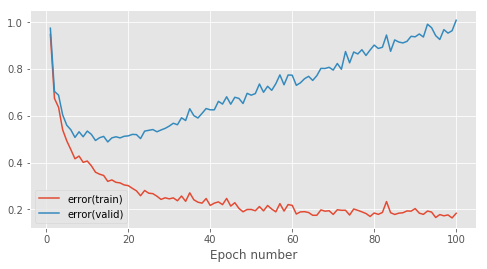

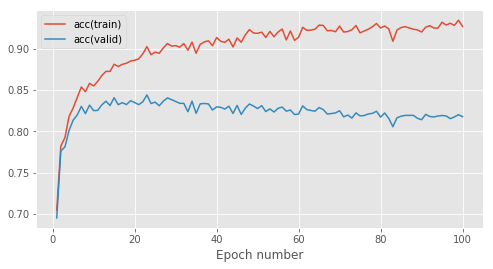

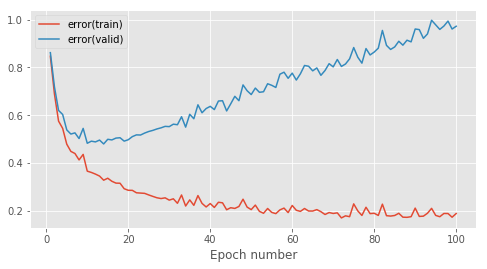

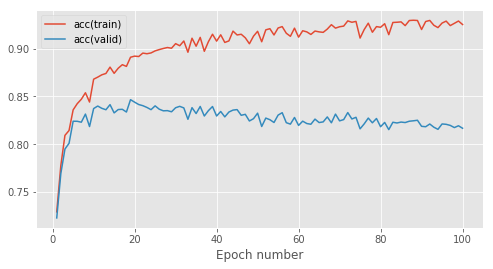

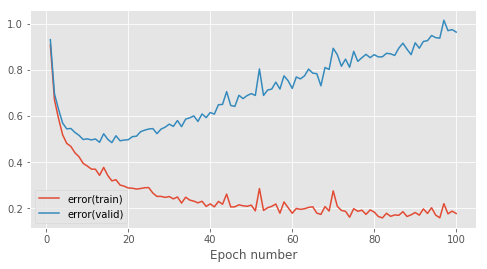

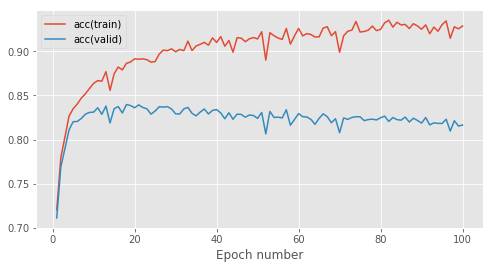

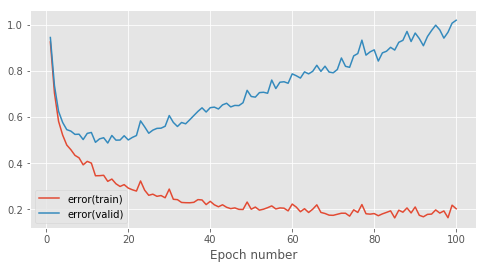

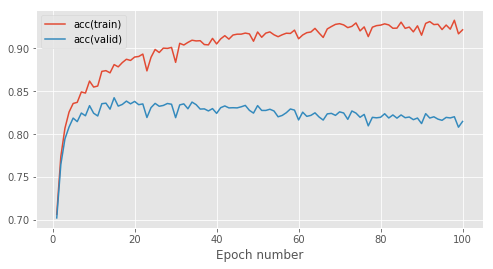

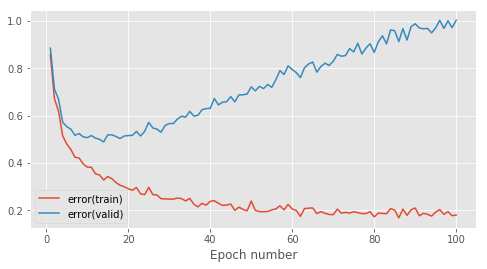

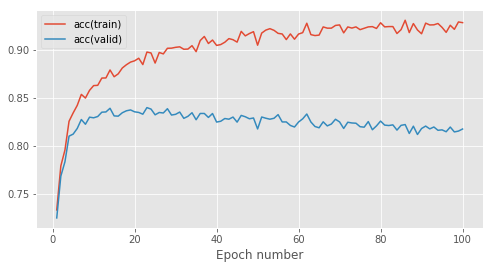

In [7]:
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats4 = sum_stats/run_times

Epoch 1: 3.0s to complete
    error(train)=9.18e-01, acc(train)=7.11e-01, error(valid)=9.42e-01, acc(valid)=7.01e-01


Epoch 2: 2.4s to complete
    error(train)=6.83e-01, acc(train)=7.75e-01, error(valid)=7.19e-01, acc(valid)=7.66e-01


Epoch 3: 2.5s to complete
    error(train)=5.92e-01, acc(train)=8.02e-01, error(valid)=6.40e-01, acc(valid)=7.91e-01


Epoch 4: 2.4s to complete
    error(train)=5.20e-01, acc(train)=8.19e-01, error(valid)=5.84e-01, acc(valid)=8.02e-01


Epoch 5: 2.6s to complete
    error(train)=4.78e-01, acc(train)=8.36e-01, error(valid)=5.53e-01, acc(valid)=8.18e-01


Epoch 6: 2.4s to complete
    error(train)=4.64e-01, acc(train)=8.34e-01, error(valid)=5.49e-01, acc(valid)=8.14e-01


Epoch 7: 2.7s to complete
    error(train)=4.49e-01, acc(train)=8.42e-01, error(valid)=5.39e-01, acc(valid)=8.19e-01


Epoch 8: 3.1s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 9: 2.7s to complete
    error(train)=4.06e-01, acc(train)=8.55e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


Epoch 10: 2.5s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 11: 2.8s to complete
    error(train)=3.83e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.25e-01


Epoch 12: 2.9s to complete
    error(train)=3.66e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.31e-01


Epoch 13: 2.7s to complete
    error(train)=3.58e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 14: 2.9s to complete
    error(train)=3.59e-01, acc(train)=8.63e-01, error(valid)=5.17e-01, acc(valid)=8.27e-01


Epoch 15: 2.7s to complete
    error(train)=3.37e-01, acc(train)=8.77e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 16: 2.8s to complete
    error(train)=3.22e-01, acc(train)=8.79e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01


Epoch 17: 2.5s to complete
    error(train)=3.25e-01, acc(train)=8.76e-01, error(valid)=5.17e-01, acc(valid)=8.27e-01


Epoch 18: 2.4s to complete
    error(train)=3.25e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 19: 2.4s to complete
    error(train)=2.98e-01, acc(train)=8.87e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 20: 3.5s to complete
    error(train)=2.95e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.38e-01


Epoch 21: 2.5s to complete
    error(train)=2.81e-01, acc(train)=8.95e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 22: 2.4s to complete
    error(train)=2.79e-01, acc(train)=8.92e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 23: 2.4s to complete
    error(train)=2.61e-01, acc(train)=8.98e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


Epoch 24: 2.4s to complete
    error(train)=2.73e-01, acc(train)=8.93e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


Epoch 25: 2.4s to complete
    error(train)=2.60e-01, acc(train)=8.99e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


Epoch 26: 2.4s to complete
    error(train)=2.78e-01, acc(train)=8.91e-01, error(valid)=5.61e-01, acc(valid)=8.31e-01


Epoch 27: 3.3s to complete
    error(train)=2.65e-01, acc(train)=8.94e-01, error(valid)=5.51e-01, acc(valid)=8.31e-01


Epoch 28: 2.4s to complete
    error(train)=2.59e-01, acc(train)=8.99e-01, error(valid)=5.67e-01, acc(valid)=8.37e-01


Epoch 29: 2.4s to complete
    error(train)=2.52e-01, acc(train)=9.00e-01, error(valid)=5.67e-01, acc(valid)=8.29e-01


Epoch 30: 2.6s to complete
    error(train)=2.38e-01, acc(train)=9.06e-01, error(valid)=5.70e-01, acc(valid)=8.36e-01


Epoch 31: 2.8s to complete
    error(train)=2.65e-01, acc(train)=8.97e-01, error(valid)=5.84e-01, acc(valid)=8.26e-01


Epoch 32: 2.9s to complete
    error(train)=2.58e-01, acc(train)=8.99e-01, error(valid)=6.07e-01, acc(valid)=8.32e-01


Epoch 33: 2.8s to complete
    error(train)=2.36e-01, acc(train)=9.06e-01, error(valid)=5.94e-01, acc(valid)=8.32e-01


Epoch 34: 3.5s to complete
    error(train)=2.46e-01, acc(train)=9.03e-01, error(valid)=6.00e-01, acc(valid)=8.28e-01


Epoch 35: 2.4s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=6.01e-01, acc(valid)=8.35e-01


Epoch 36: 2.5s to complete
    error(train)=2.39e-01, acc(train)=9.05e-01, error(valid)=6.06e-01, acc(valid)=8.28e-01


Epoch 37: 2.6s to complete
    error(train)=2.75e-01, acc(train)=8.93e-01, error(valid)=6.60e-01, acc(valid)=8.19e-01


Epoch 38: 3.4s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=6.40e-01, acc(valid)=8.29e-01


Epoch 39: 2.4s to complete
    error(train)=2.44e-01, acc(train)=9.02e-01, error(valid)=6.46e-01, acc(valid)=8.25e-01


Epoch 40: 2.5s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=6.28e-01, acc(valid)=8.34e-01


Epoch 41: 2.3s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=6.34e-01, acc(valid)=8.35e-01


Epoch 42: 2.5s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.48e-01, acc(valid)=8.32e-01


Epoch 43: 2.7s to complete
    error(train)=2.17e-01, acc(train)=9.13e-01, error(valid)=6.49e-01, acc(valid)=8.31e-01


Epoch 44: 3.2s to complete
    error(train)=2.09e-01, acc(train)=9.14e-01, error(valid)=6.57e-01, acc(valid)=8.29e-01


Epoch 45: 2.5s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.62e-01, acc(valid)=8.32e-01


Epoch 46: 2.4s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=6.80e-01, acc(valid)=8.31e-01


Epoch 47: 3.3s to complete
    error(train)=2.05e-01, acc(train)=9.15e-01, error(valid)=6.68e-01, acc(valid)=8.35e-01


Epoch 48: 2.6s to complete
    error(train)=2.33e-01, acc(train)=9.05e-01, error(valid)=6.89e-01, acc(valid)=8.24e-01


Epoch 49: 2.8s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=7.49e-01, acc(valid)=8.18e-01


Epoch 50: 3.4s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=6.87e-01, acc(valid)=8.33e-01


Epoch 51: 2.8s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=6.93e-01, acc(valid)=8.31e-01


Epoch 52: 2.7s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.84e-01, acc(valid)=8.32e-01


Epoch 53: 2.5s to complete
    error(train)=2.08e-01, acc(train)=9.15e-01, error(valid)=7.18e-01, acc(valid)=8.28e-01


Epoch 54: 3.0s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=7.18e-01, acc(valid)=8.24e-01


Epoch 55: 2.7s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=7.17e-01, acc(valid)=8.27e-01


Epoch 56: 2.9s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=7.62e-01, acc(valid)=8.24e-01


Epoch 57: 2.5s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=7.66e-01, acc(valid)=8.24e-01


Epoch 58: 3.1s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=7.35e-01, acc(valid)=8.25e-01


Epoch 59: 3.0s to complete
    error(train)=2.30e-01, acc(train)=9.09e-01, error(valid)=8.11e-01, acc(valid)=8.22e-01


Epoch 60: 2.4s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=7.21e-01, acc(valid)=8.31e-01


Epoch 61: 2.7s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=7.72e-01, acc(valid)=8.23e-01


Epoch 62: 2.4s to complete
    error(train)=1.93e-01, acc(train)=9.20e-01, error(valid)=7.72e-01, acc(valid)=8.29e-01


Epoch 63: 2.4s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=7.94e-01, acc(valid)=8.23e-01


Epoch 64: 2.3s to complete
    error(train)=1.91e-01, acc(train)=9.21e-01, error(valid)=7.61e-01, acc(valid)=8.24e-01


Epoch 65: 2.6s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.84e-01, acc(valid)=8.29e-01


Epoch 66: 2.6s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.85e-01, acc(valid)=8.24e-01


Epoch 67: 2.8s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.62e-01, acc(valid)=8.30e-01


Epoch 68: 2.5s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=7.81e-01, acc(valid)=8.30e-01


Epoch 69: 2.8s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=8.03e-01, acc(valid)=8.26e-01


Epoch 70: 2.4s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=8.19e-01, acc(valid)=8.26e-01


Epoch 71: 4.1s to complete
    error(train)=2.15e-01, acc(train)=9.17e-01, error(valid)=8.35e-01, acc(valid)=8.22e-01


Epoch 72: 2.7s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=8.21e-01, acc(valid)=8.21e-01


Epoch 73: 2.5s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=8.47e-01, acc(valid)=8.24e-01


Epoch 74: 2.5s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=7.96e-01, acc(valid)=8.27e-01


Epoch 75: 2.5s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=8.49e-01, acc(valid)=8.28e-01


Epoch 76: 2.3s to complete
    error(train)=1.90e-01, acc(train)=9.20e-01, error(valid)=8.47e-01, acc(valid)=8.22e-01


Epoch 77: 2.4s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=8.65e-01, acc(valid)=8.19e-01


Epoch 78: 2.5s to complete
    error(train)=1.83e-01, acc(train)=9.24e-01, error(valid)=8.49e-01, acc(valid)=8.22e-01


Epoch 79: 3.8s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=8.31e-01, acc(valid)=8.26e-01


Epoch 80: 2.9s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=8.20e-01, acc(valid)=8.28e-01


Epoch 81: 2.5s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=8.64e-01, acc(valid)=8.22e-01


Epoch 82: 2.3s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=8.55e-01, acc(valid)=8.22e-01


Epoch 83: 2.3s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.42e-01, acc(valid)=8.31e-01


Epoch 84: 2.4s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=8.76e-01, acc(valid)=8.26e-01


Epoch 85: 2.3s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=8.67e-01, acc(valid)=8.22e-01


Epoch 86: 2.3s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=8.80e-01, acc(valid)=8.14e-01


Epoch 87: 2.3s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=9.11e-01, acc(valid)=8.22e-01


Epoch 88: 2.5s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=8.62e-01, acc(valid)=8.17e-01


Epoch 89: 2.5s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=8.96e-01, acc(valid)=8.24e-01


Epoch 90: 2.4s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=8.71e-01, acc(valid)=8.25e-01


Epoch 91: 2.7s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=9.06e-01, acc(valid)=8.21e-01


Epoch 92: 2.5s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=9.18e-01, acc(valid)=8.21e-01


Epoch 93: 2.3s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=8.52e-01, acc(valid)=8.25e-01


Epoch 94: 2.5s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=8.67e-01, acc(valid)=8.20e-01


Epoch 95: 2.4s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=9.14e-01, acc(valid)=8.22e-01


Epoch 96: 2.3s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=9.38e-01, acc(valid)=8.23e-01


Epoch 97: 2.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=8.89e-01, acc(valid)=8.27e-01


Epoch 98: 2.7s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=9.49e-01, acc(valid)=8.21e-01


Epoch 99: 2.7s to complete
    error(train)=2.16e-01, acc(train)=9.18e-01, error(valid)=9.68e-01, acc(valid)=8.15e-01


Epoch 100: 2.7s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=9.24e-01, acc(valid)=8.23e-01


Epoch 1: 2.5s to complete
    error(train)=9.11e-01, acc(train)=7.09e-01, error(valid)=9.28e-01, acc(valid)=7.03e-01


Epoch 2: 2.4s to complete
    error(train)=6.82e-01, acc(train)=7.73e-01, error(valid)=7.21e-01, acc(valid)=7.60e-01


Epoch 3: 2.4s to complete
    error(train)=6.18e-01, acc(train)=7.93e-01, error(valid)=6.65e-01, acc(valid)=7.78e-01


Epoch 4: 2.4s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.67e-01, acc(valid)=8.13e-01


Epoch 5: 2.4s to complete
    error(train)=4.94e-01, acc(train)=8.29e-01, error(valid)=5.73e-01, acc(valid)=8.09e-01


Epoch 6: 2.4s to complete
    error(train)=4.49e-01, acc(train)=8.44e-01, error(valid)=5.32e-01, acc(valid)=8.22e-01


Epoch 7: 2.4s to complete
    error(train)=4.49e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.14e-01


Epoch 8: 2.4s to complete
    error(train)=4.13e-01, acc(train)=8.51e-01, error(valid)=5.26e-01, acc(valid)=8.24e-01


Epoch 9: 2.7s to complete
    error(train)=4.09e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


Epoch 10: 3.2s to complete
    error(train)=3.82e-01, acc(train)=8.64e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


Epoch 11: 3.1s to complete
    error(train)=3.76e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


Epoch 12: 2.8s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


Epoch 13: 3.1s to complete
    error(train)=3.40e-01, acc(train)=8.75e-01, error(valid)=4.94e-01, acc(valid)=8.36e-01


Epoch 14: 2.7s to complete
    error(train)=3.47e-01, acc(train)=8.72e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 15: 2.5s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 16: 2.4s to complete
    error(train)=3.42e-01, acc(train)=8.70e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 17: 2.4s to complete
    error(train)=3.06e-01, acc(train)=8.85e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 18: 2.3s to complete
    error(train)=3.36e-01, acc(train)=8.76e-01, error(valid)=5.41e-01, acc(valid)=8.32e-01


Epoch 19: 2.4s to complete
    error(train)=3.18e-01, acc(train)=8.82e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 20: 2.6s to complete
    error(train)=3.04e-01, acc(train)=8.87e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 21: 3.0s to complete
    error(train)=3.18e-01, acc(train)=8.80e-01, error(valid)=5.67e-01, acc(valid)=8.30e-01


Epoch 22: 2.4s to complete
    error(train)=2.91e-01, acc(train)=8.89e-01, error(valid)=5.31e-01, acc(valid)=8.37e-01


Epoch 23: 2.6s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


Epoch 24: 2.7s to complete
    error(train)=2.63e-01, acc(train)=8.97e-01, error(valid)=5.27e-01, acc(valid)=8.42e-01


Epoch 25: 2.4s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=5.36e-01, acc(valid)=8.39e-01


Epoch 26: 2.5s to complete
    error(train)=2.76e-01, acc(train)=8.91e-01, error(valid)=5.57e-01, acc(valid)=8.30e-01


Epoch 27: 2.7s to complete
    error(train)=2.75e-01, acc(train)=8.94e-01, error(valid)=5.75e-01, acc(valid)=8.28e-01


Epoch 28: 2.6s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=5.65e-01, acc(valid)=8.36e-01


Epoch 29: 2.6s to complete
    error(train)=2.55e-01, acc(train)=9.00e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


Epoch 30: 2.6s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=5.76e-01, acc(valid)=8.34e-01


Epoch 31: 3.0s to complete
    error(train)=2.68e-01, acc(train)=8.93e-01, error(valid)=6.18e-01, acc(valid)=8.26e-01


Epoch 32: 2.7s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=5.96e-01, acc(valid)=8.36e-01


Epoch 33: 2.9s to complete
    error(train)=2.58e-01, acc(train)=8.98e-01, error(valid)=5.99e-01, acc(valid)=8.28e-01


Epoch 34: 2.6s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=5.97e-01, acc(valid)=8.35e-01


Epoch 35: 2.7s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=6.02e-01, acc(valid)=8.35e-01


Epoch 36: 2.4s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=6.08e-01, acc(valid)=8.35e-01


Epoch 37: 2.6s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=6.30e-01, acc(valid)=8.30e-01


Epoch 38: 2.8s to complete
    error(train)=2.48e-01, acc(train)=9.01e-01, error(valid)=6.54e-01, acc(valid)=8.27e-01


Epoch 39: 2.5s to complete
    error(train)=2.50e-01, acc(train)=9.01e-01, error(valid)=6.58e-01, acc(valid)=8.28e-01


Epoch 40: 4.0s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.52e-01, acc(valid)=8.29e-01


Epoch 41: 2.7s to complete
    error(train)=2.32e-01, acc(train)=9.07e-01, error(valid)=6.46e-01, acc(valid)=8.28e-01


Epoch 42: 2.7s to complete
    error(train)=2.35e-01, acc(train)=9.06e-01, error(valid)=6.55e-01, acc(valid)=8.28e-01


Epoch 43: 2.3s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=6.73e-01, acc(valid)=8.30e-01


Epoch 44: 2.4s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=6.86e-01, acc(valid)=8.32e-01


Epoch 45: 2.5s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.64e-01, acc(valid)=8.36e-01


Epoch 46: 2.9s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=6.71e-01, acc(valid)=8.32e-01


Epoch 47: 2.4s to complete
    error(train)=2.35e-01, acc(train)=9.05e-01, error(valid)=6.97e-01, acc(valid)=8.24e-01


Epoch 48: 2.5s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.70e-01, acc(valid)=8.29e-01


Epoch 49: 2.4s to complete
    error(train)=2.17e-01, acc(train)=9.13e-01, error(valid)=6.98e-01, acc(valid)=8.29e-01


Epoch 50: 2.9s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=6.82e-01, acc(valid)=8.32e-01


Epoch 51: 2.6s to complete
    error(train)=2.14e-01, acc(train)=9.13e-01, error(valid)=7.13e-01, acc(valid)=8.27e-01


Epoch 52: 2.5s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=7.01e-01, acc(valid)=8.31e-01


Epoch 53: 2.4s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=7.26e-01, acc(valid)=8.28e-01


Epoch 54: 2.3s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.91e-01, acc(valid)=8.25e-01


Epoch 55: 2.3s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=7.85e-01, acc(valid)=8.23e-01


Epoch 56: 2.3s to complete
    error(train)=2.12e-01, acc(train)=9.13e-01, error(valid)=7.52e-01, acc(valid)=8.24e-01


Epoch 57: 2.3s to complete
    error(train)=2.05e-01, acc(train)=9.16e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01


Epoch 58: 2.3s to complete
    error(train)=2.35e-01, acc(train)=9.07e-01, error(valid)=7.68e-01, acc(valid)=8.19e-01


Epoch 59: 2.3s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=7.99e-01, acc(valid)=8.21e-01


Epoch 60: 2.7s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=7.75e-01, acc(valid)=8.19e-01


Epoch 61: 2.5s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=7.67e-01, acc(valid)=8.22e-01


Epoch 62: 3.5s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=7.78e-01, acc(valid)=8.23e-01


Epoch 63: 2.7s to complete
    error(train)=2.05e-01, acc(train)=9.16e-01, error(valid)=7.74e-01, acc(valid)=8.21e-01


Epoch 64: 2.3s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=7.79e-01, acc(valid)=8.23e-01


Epoch 65: 2.3s to complete
    error(train)=2.17e-01, acc(train)=9.13e-01, error(valid)=8.04e-01, acc(valid)=8.21e-01


Epoch 66: 2.3s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=8.09e-01, acc(valid)=8.23e-01


Epoch 67: 2.3s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=8.21e-01, acc(valid)=8.21e-01


Epoch 68: 2.5s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=8.50e-01, acc(valid)=8.17e-01


Epoch 69: 2.7s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=8.07e-01, acc(valid)=8.25e-01


Epoch 70: 2.5s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=7.97e-01, acc(valid)=8.24e-01


Epoch 71: 3.9s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=8.18e-01, acc(valid)=8.24e-01


Epoch 72: 2.4s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=8.16e-01, acc(valid)=8.23e-01


Epoch 73: 3.4s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=8.01e-01, acc(valid)=8.22e-01


Epoch 74: 2.3s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=8.50e-01, acc(valid)=8.19e-01


Epoch 75: 2.3s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=8.66e-01, acc(valid)=8.22e-01


Epoch 76: 3.1s to complete
    error(train)=2.38e-01, acc(train)=9.10e-01, error(valid)=9.15e-01, acc(valid)=8.16e-01


Epoch 77: 2.5s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=8.72e-01, acc(valid)=8.21e-01


Epoch 78: 3.1s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.12e-01, acc(valid)=8.25e-01


Epoch 79: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=8.46e-01, acc(valid)=8.21e-01


Epoch 80: 3.3s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.32e-01, acc(valid)=8.27e-01


Epoch 81: 3.7s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=8.38e-01, acc(valid)=8.21e-01


Epoch 82: 3.1s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=8.42e-01, acc(valid)=8.21e-01


Epoch 83: 2.8s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=8.67e-01, acc(valid)=8.17e-01


Epoch 84: 2.6s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.91e-01, acc(valid)=8.22e-01


Epoch 85: 2.8s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=8.89e-01, acc(valid)=8.20e-01


Epoch 86: 2.6s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=8.92e-01, acc(valid)=8.24e-01


Epoch 87: 3.3s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=8.50e-01, acc(valid)=8.19e-01


Epoch 88: 3.5s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=8.94e-01, acc(valid)=8.18e-01


Epoch 89: 3.0s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.68e-01, acc(valid)=8.23e-01


Epoch 90: 2.7s to complete
    error(train)=2.07e-01, acc(train)=9.20e-01, error(valid)=9.40e-01, acc(valid)=8.21e-01


Epoch 91: 2.7s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=8.96e-01, acc(valid)=8.22e-01


Epoch 92: 3.0s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=9.08e-01, acc(valid)=8.22e-01


Epoch 93: 3.4s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.81e-01, acc(valid)=8.24e-01


Epoch 94: 3.2s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=9.89e-01, acc(valid)=8.18e-01


Epoch 95: 3.2s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=9.71e-01, acc(valid)=8.20e-01


Epoch 96: 2.9s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.43e-01, acc(valid)=8.24e-01


Epoch 97: 3.0s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=9.48e-01, acc(valid)=8.20e-01


Epoch 98: 3.8s to complete
    error(train)=1.87e-01, acc(train)=9.27e-01, error(valid)=9.31e-01, acc(valid)=8.18e-01


Epoch 99: 2.6s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=9.32e-01, acc(valid)=8.22e-01


Epoch 100: 2.9s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=9.56e-01, acc(valid)=8.21e-01


Epoch 1: 2.7s to complete
    error(train)=9.33e-01, acc(train)=6.98e-01, error(valid)=9.49e-01, acc(valid)=6.92e-01


Epoch 2: 3.3s to complete
    error(train)=6.95e-01, acc(train)=7.71e-01, error(valid)=7.29e-01, acc(valid)=7.59e-01


Epoch 3: 2.7s to complete
    error(train)=6.11e-01, acc(train)=7.99e-01, error(valid)=6.58e-01, acc(valid)=7.87e-01


Epoch 4: 2.5s to complete
    error(train)=5.27e-01, acc(train)=8.22e-01, error(valid)=5.96e-01, acc(valid)=8.04e-01


Epoch 5: 2.6s to complete
    error(train)=5.05e-01, acc(train)=8.26e-01, error(valid)=5.87e-01, acc(valid)=8.04e-01


Epoch 6: 2.7s to complete
    error(train)=4.67e-01, acc(train)=8.36e-01, error(valid)=5.63e-01, acc(valid)=8.11e-01


Epoch 7: 2.6s to complete
    error(train)=4.50e-01, acc(train)=8.41e-01, error(valid)=5.46e-01, acc(valid)=8.15e-01


Epoch 8: 4.6s to complete
    error(train)=4.13e-01, acc(train)=8.51e-01, error(valid)=5.15e-01, acc(valid)=8.25e-01


Epoch 9: 2.5s to complete
    error(train)=3.91e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.29e-01


Epoch 10: 2.4s to complete
    error(train)=3.78e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.30e-01


Epoch 11: 2.7s to complete
    error(train)=3.64e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 12: 2.5s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 13: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


Epoch 14: 2.4s to complete
    error(train)=3.50e-01, acc(train)=8.72e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 15: 2.4s to complete
    error(train)=3.28e-01, acc(train)=8.80e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


Epoch 16: 2.6s to complete
    error(train)=3.42e-01, acc(train)=8.74e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 17: 2.6s to complete
    error(train)=3.11e-01, acc(train)=8.83e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 18: 2.4s to complete
    error(train)=3.19e-01, acc(train)=8.79e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 19: 2.4s to complete
    error(train)=3.03e-01, acc(train)=8.86e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 20: 2.4s to complete
    error(train)=3.07e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


Epoch 21: 2.7s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=5.07e-01, acc(valid)=8.42e-01


Epoch 22: 2.5s to complete
    error(train)=2.76e-01, acc(train)=8.94e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 23: 2.4s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


Epoch 24: 2.4s to complete
    error(train)=2.63e-01, acc(train)=8.97e-01, error(valid)=5.11e-01, acc(valid)=8.41e-01


Epoch 25: 2.3s to complete
    error(train)=2.78e-01, acc(train)=8.93e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


Epoch 26: 3.4s to complete
    error(train)=2.80e-01, acc(train)=8.92e-01, error(valid)=5.46e-01, acc(valid)=8.36e-01


Epoch 27: 3.0s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.39e-01, acc(valid)=8.39e-01


Epoch 28: 3.1s to complete
    error(train)=2.47e-01, acc(train)=9.03e-01, error(valid)=5.37e-01, acc(valid)=8.40e-01


Epoch 29: 2.5s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=5.68e-01, acc(valid)=8.30e-01


Epoch 30: 2.6s to complete
    error(train)=2.46e-01, acc(train)=9.04e-01, error(valid)=5.50e-01, acc(valid)=8.38e-01


Epoch 31: 2.6s to complete
    error(train)=2.53e-01, acc(train)=9.00e-01, error(valid)=5.70e-01, acc(valid)=8.35e-01


Epoch 32: 2.5s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=5.57e-01, acc(valid)=8.40e-01


Epoch 33: 2.4s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.65e-01, acc(valid)=8.38e-01


Epoch 34: 2.6s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=5.72e-01, acc(valid)=8.36e-01


Epoch 35: 2.4s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=6.08e-01, acc(valid)=8.33e-01


Epoch 36: 2.4s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=5.92e-01, acc(valid)=8.35e-01


Epoch 37: 2.4s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=5.92e-01, acc(valid)=8.32e-01


Epoch 38: 2.4s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.06e-01, acc(valid)=8.31e-01


Epoch 39: 2.3s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=6.12e-01, acc(valid)=8.30e-01


Epoch 40: 2.4s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=6.37e-01, acc(valid)=8.31e-01


Epoch 41: 2.3s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=6.31e-01, acc(valid)=8.29e-01


Epoch 42: 2.3s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=6.35e-01, acc(valid)=8.34e-01


Epoch 43: 2.3s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=6.65e-01, acc(valid)=8.25e-01


Epoch 44: 2.4s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=6.62e-01, acc(valid)=8.25e-01


Epoch 45: 2.4s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=6.58e-01, acc(valid)=8.27e-01


Epoch 46: 2.4s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=6.54e-01, acc(valid)=8.29e-01


Epoch 47: 3.0s to complete
    error(train)=2.16e-01, acc(train)=9.12e-01, error(valid)=6.73e-01, acc(valid)=8.27e-01


Epoch 48: 2.4s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=6.92e-01, acc(valid)=8.27e-01


Epoch 49: 2.8s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.58e-01, acc(valid)=8.28e-01


Epoch 50: 2.7s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=7.00e-01, acc(valid)=8.29e-01


Epoch 51: 2.9s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=7.23e-01, acc(valid)=8.22e-01


Epoch 52: 2.6s to complete
    error(train)=2.03e-01, acc(train)=9.16e-01, error(valid)=6.77e-01, acc(valid)=8.26e-01


Epoch 53: 2.8s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=6.79e-01, acc(valid)=8.33e-01


Epoch 54: 2.5s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=6.92e-01, acc(valid)=8.28e-01


Epoch 55: 3.4s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=6.93e-01, acc(valid)=8.33e-01


Epoch 56: 2.8s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=6.93e-01, acc(valid)=8.31e-01


Epoch 57: 3.0s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=7.53e-01, acc(valid)=8.27e-01


Epoch 58: 2.5s to complete
    error(train)=2.07e-01, acc(train)=9.13e-01, error(valid)=7.21e-01, acc(valid)=8.20e-01


Epoch 59: 2.6s to complete
    error(train)=1.91e-01, acc(train)=9.21e-01, error(valid)=6.89e-01, acc(valid)=8.31e-01


Epoch 60: 5.2s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=7.59e-01, acc(valid)=8.23e-01


Epoch 61: 2.5s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=7.52e-01, acc(valid)=8.27e-01


Epoch 62: 2.4s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=7.60e-01, acc(valid)=8.24e-01


Epoch 63: 2.5s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=7.59e-01, acc(valid)=8.19e-01


Epoch 64: 3.4s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=7.99e-01, acc(valid)=8.18e-01


Epoch 65: 3.4s to complete
    error(train)=1.95e-01, acc(train)=9.18e-01, error(valid)=7.19e-01, acc(valid)=8.25e-01


Epoch 66: 3.4s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=7.27e-01, acc(valid)=8.24e-01


Epoch 67: 3.0s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=7.73e-01, acc(valid)=8.26e-01


Epoch 68: 2.3s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=7.86e-01, acc(valid)=8.26e-01


Epoch 69: 2.3s to complete
    error(train)=2.01e-01, acc(train)=9.20e-01, error(valid)=7.99e-01, acc(valid)=8.26e-01


Epoch 70: 2.7s to complete
    error(train)=2.02e-01, acc(train)=9.17e-01, error(valid)=7.59e-01, acc(valid)=8.22e-01


Epoch 71: 2.9s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=7.90e-01, acc(valid)=8.26e-01


Epoch 72: 2.7s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=8.30e-01, acc(valid)=8.24e-01


Epoch 73: 2.9s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=7.89e-01, acc(valid)=8.24e-01


Epoch 74: 2.7s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.81e-01, acc(valid)=8.28e-01


Epoch 75: 2.3s to complete
    error(train)=2.33e-01, acc(train)=9.09e-01, error(valid)=8.21e-01, acc(valid)=8.15e-01


Epoch 76: 2.3s to complete
    error(train)=1.64e-01, acc(train)=9.31e-01, error(valid)=7.76e-01, acc(valid)=8.28e-01


Epoch 77: 2.3s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=8.07e-01, acc(valid)=8.26e-01


Epoch 78: 2.3s to complete
    error(train)=2.40e-01, acc(train)=9.09e-01, error(valid)=8.88e-01, acc(valid)=8.13e-01


Epoch 79: 2.8s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=8.43e-01, acc(valid)=8.20e-01


Epoch 80: 2.8s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=7.82e-01, acc(valid)=8.28e-01


Epoch 81: 3.1s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=7.83e-01, acc(valid)=8.27e-01


Epoch 82: 2.6s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=8.28e-01, acc(valid)=8.24e-01


Epoch 83: 2.4s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=8.06e-01, acc(valid)=8.30e-01


Epoch 84: 2.7s to complete
    error(train)=1.74e-01, acc(train)=9.27e-01, error(valid)=8.38e-01, acc(valid)=8.25e-01


Epoch 85: 3.3s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=8.46e-01, acc(valid)=8.22e-01


Epoch 86: 2.6s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=8.53e-01, acc(valid)=8.23e-01


Epoch 87: 2.5s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=8.36e-01, acc(valid)=8.26e-01


Epoch 88: 2.8s to complete
    error(train)=1.94e-01, acc(train)=9.23e-01, error(valid)=8.67e-01, acc(valid)=8.24e-01


Epoch 89: 3.9s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.35e-01, acc(valid)=8.27e-01


Epoch 90: 2.5s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=8.74e-01, acc(valid)=8.20e-01


Epoch 91: 4.1s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.64e-01, acc(valid)=8.24e-01


Epoch 92: 2.3s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=8.91e-01, acc(valid)=8.22e-01


Epoch 93: 2.8s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=9.08e-01, acc(valid)=8.13e-01


Epoch 94: 2.7s to complete
    error(train)=1.64e-01, acc(train)=9.31e-01, error(valid)=8.38e-01, acc(valid)=8.27e-01


Epoch 95: 2.4s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=9.16e-01, acc(valid)=8.21e-01


Epoch 96: 2.6s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=8.63e-01, acc(valid)=8.26e-01


Epoch 97: 3.0s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=8.72e-01, acc(valid)=8.24e-01


Epoch 98: 3.1s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=9.21e-01, acc(valid)=8.21e-01


Epoch 99: 2.8s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=9.00e-01, acc(valid)=8.22e-01


Epoch 100: 2.6s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=9.42e-01, acc(valid)=8.15e-01


Epoch 1: 2.7s to complete
    error(train)=9.15e-01, acc(train)=7.14e-01, error(valid)=9.38e-01, acc(valid)=7.07e-01


Epoch 2: 2.8s to complete
    error(train)=7.37e-01, acc(train)=7.57e-01, error(valid)=7.75e-01, acc(valid)=7.45e-01


Epoch 3: 2.6s to complete
    error(train)=5.89e-01, acc(train)=8.05e-01, error(valid)=6.46e-01, acc(valid)=7.91e-01


Epoch 4: 3.0s to complete
    error(train)=5.25e-01, acc(train)=8.21e-01, error(valid)=5.86e-01, acc(valid)=8.07e-01


Epoch 5: 2.8s to complete
    error(train)=4.89e-01, acc(train)=8.31e-01, error(valid)=5.67e-01, acc(valid)=8.14e-01


Epoch 6: 4.0s to complete
    error(train)=4.60e-01, acc(train)=8.40e-01, error(valid)=5.40e-01, acc(valid)=8.18e-01


Epoch 7: 2.4s to complete
    error(train)=4.40e-01, acc(train)=8.46e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


Epoch 8: 2.8s to complete
    error(train)=4.31e-01, acc(train)=8.44e-01, error(valid)=5.44e-01, acc(valid)=8.13e-01


Epoch 9: 3.0s to complete
    error(train)=3.92e-01, acc(train)=8.62e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


Epoch 10: 2.9s to complete
    error(train)=3.81e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


Epoch 11: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


Epoch 12: 3.2s to complete
    error(train)=3.77e-01, acc(train)=8.63e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 13: 3.7s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 14: 2.5s to complete
    error(train)=3.51e-01, acc(train)=8.69e-01, error(valid)=5.20e-01, acc(valid)=8.24e-01


Epoch 15: 2.5s to complete
    error(train)=3.27e-01, acc(train)=8.76e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


Epoch 16: 3.3s to complete
    error(train)=3.21e-01, acc(train)=8.79e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 17: 2.9s to complete
    error(train)=3.09e-01, acc(train)=8.81e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


Epoch 18: 2.4s to complete
    error(train)=3.12e-01, acc(train)=8.82e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 19: 2.3s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


Epoch 20: 2.3s to complete
    error(train)=2.84e-01, acc(train)=8.91e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


Epoch 21: 2.8s to complete
    error(train)=2.85e-01, acc(train)=8.92e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 22: 2.7s to complete
    error(train)=2.85e-01, acc(train)=8.90e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


Epoch 23: 2.5s to complete
    error(train)=3.15e-01, acc(train)=8.81e-01, error(valid)=5.75e-01, acc(valid)=8.29e-01


Epoch 24: 2.6s to complete
    error(train)=2.88e-01, acc(train)=8.88e-01, error(valid)=5.63e-01, acc(valid)=8.28e-01


Epoch 25: 2.5s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=5.18e-01, acc(valid)=8.40e-01


Epoch 26: 2.6s to complete
    error(train)=2.60e-01, acc(train)=8.97e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


Epoch 27: 2.6s to complete
    error(train)=2.59e-01, acc(train)=8.96e-01, error(valid)=5.51e-01, acc(valid)=8.32e-01


Epoch 28: 2.4s to complete
    error(train)=2.48e-01, acc(train)=9.02e-01, error(valid)=5.55e-01, acc(valid)=8.36e-01


Epoch 29: 2.5s to complete
    error(train)=2.57e-01, acc(train)=8.99e-01, error(valid)=5.60e-01, acc(valid)=8.35e-01


Epoch 30: 2.4s to complete
    error(train)=2.67e-01, acc(train)=8.94e-01, error(valid)=5.91e-01, acc(valid)=8.31e-01


Epoch 31: 2.7s to complete
    error(train)=2.47e-01, acc(train)=9.02e-01, error(valid)=5.83e-01, acc(valid)=8.33e-01


Epoch 32: 2.6s to complete
    error(train)=2.59e-01, acc(train)=8.96e-01, error(valid)=5.91e-01, acc(valid)=8.28e-01


Epoch 33: 2.6s to complete
    error(train)=2.68e-01, acc(train)=8.95e-01, error(valid)=6.07e-01, acc(valid)=8.27e-01


Epoch 34: 4.2s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=5.93e-01, acc(valid)=8.34e-01


Epoch 35: 2.4s to complete
    error(train)=2.81e-01, acc(train)=8.91e-01, error(valid)=6.56e-01, acc(valid)=8.24e-01


Epoch 36: 2.6s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=6.26e-01, acc(valid)=8.32e-01


Epoch 37: 2.8s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=6.10e-01, acc(valid)=8.36e-01


Epoch 38: 3.5s to complete
    error(train)=2.26e-01, acc(train)=9.10e-01, error(valid)=6.19e-01, acc(valid)=8.30e-01


Epoch 39: 2.5s to complete
    error(train)=2.33e-01, acc(train)=9.06e-01, error(valid)=6.36e-01, acc(valid)=8.29e-01


Epoch 40: 2.4s to complete
    error(train)=2.11e-01, acc(train)=9.14e-01, error(valid)=6.18e-01, acc(valid)=8.33e-01


Epoch 41: 2.8s to complete
    error(train)=2.24e-01, acc(train)=9.09e-01, error(valid)=6.22e-01, acc(valid)=8.33e-01


Epoch 42: 2.7s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=6.57e-01, acc(valid)=8.33e-01


Epoch 43: 3.9s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=6.16e-01, acc(valid)=8.31e-01


Epoch 44: 2.8s to complete
    error(train)=2.17e-01, acc(train)=9.10e-01, error(valid)=6.52e-01, acc(valid)=8.30e-01


Epoch 45: 2.8s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


Epoch 46: 2.5s to complete
    error(train)=2.20e-01, acc(train)=9.11e-01, error(valid)=6.89e-01, acc(valid)=8.31e-01


Epoch 47: 2.5s to complete
    error(train)=2.11e-01, acc(train)=9.13e-01, error(valid)=6.72e-01, acc(valid)=8.29e-01


Epoch 48: 2.4s to complete
    error(train)=2.21e-01, acc(train)=9.10e-01, error(valid)=6.82e-01, acc(valid)=8.26e-01


Epoch 49: 2.4s to complete
    error(train)=2.00e-01, acc(train)=9.18e-01, error(valid)=6.80e-01, acc(valid)=8.34e-01


Epoch 50: 2.5s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=6.60e-01, acc(valid)=8.35e-01


Epoch 51: 2.7s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.87e-01, acc(valid)=8.31e-01


Epoch 52: 2.7s to complete
    error(train)=1.86e-01, acc(train)=9.23e-01, error(valid)=6.92e-01, acc(valid)=8.36e-01


Epoch 53: 3.0s to complete
    error(train)=2.15e-01, acc(train)=9.13e-01, error(valid)=7.17e-01, acc(valid)=8.28e-01


Epoch 54: 2.9s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=7.31e-01, acc(valid)=8.26e-01


Epoch 55: 2.7s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=7.27e-01, acc(valid)=8.31e-01


Epoch 56: 2.8s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=7.58e-01, acc(valid)=8.27e-01


Epoch 57: 2.3s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=7.24e-01, acc(valid)=8.27e-01


Epoch 58: 2.4s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=7.39e-01, acc(valid)=8.26e-01


Epoch 59: 2.4s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=7.35e-01, acc(valid)=8.28e-01


Epoch 60: 2.4s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=7.81e-01, acc(valid)=8.25e-01


Epoch 61: 2.6s to complete
    error(train)=2.17e-01, acc(train)=9.13e-01, error(valid)=7.55e-01, acc(valid)=8.24e-01


Epoch 62: 2.5s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=7.65e-01, acc(valid)=8.26e-01


Epoch 63: 3.1s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=7.67e-01, acc(valid)=8.22e-01


Epoch 64: 2.4s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=7.63e-01, acc(valid)=8.23e-01


Epoch 65: 2.9s to complete
    error(train)=1.95e-01, acc(train)=9.19e-01, error(valid)=7.93e-01, acc(valid)=8.22e-01


Epoch 66: 2.4s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=8.02e-01, acc(valid)=8.22e-01


Epoch 67: 2.4s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=7.99e-01, acc(valid)=8.26e-01


Epoch 68: 2.9s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=7.91e-01, acc(valid)=8.22e-01


Epoch 69: 2.7s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=8.12e-01, acc(valid)=8.21e-01


Epoch 70: 2.8s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.87e-01, acc(valid)=8.26e-01


Epoch 71: 2.8s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=8.03e-01, acc(valid)=8.28e-01


Epoch 72: 3.1s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=7.76e-01, acc(valid)=8.29e-01


Epoch 73: 2.5s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=8.39e-01, acc(valid)=8.23e-01


Epoch 74: 3.1s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=8.48e-01, acc(valid)=8.20e-01


Epoch 75: 3.6s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=8.12e-01, acc(valid)=8.23e-01


Epoch 76: 3.5s to complete
    error(train)=1.71e-01, acc(train)=9.29e-01, error(valid)=7.99e-01, acc(valid)=8.29e-01


Epoch 77: 3.1s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=8.50e-01, acc(valid)=8.21e-01


Epoch 78: 3.1s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=8.26e-01, acc(valid)=8.28e-01


Epoch 79: 2.6s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=8.33e-01, acc(valid)=8.31e-01


Epoch 80: 2.7s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=8.15e-01, acc(valid)=8.27e-01


Epoch 81: 3.3s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=8.66e-01, acc(valid)=8.28e-01


Epoch 82: 2.6s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=8.85e-01, acc(valid)=8.20e-01


Epoch 83: 2.6s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=8.60e-01, acc(valid)=8.26e-01


Epoch 84: 2.7s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=8.98e-01, acc(valid)=8.18e-01


Epoch 85: 2.5s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=8.75e-01, acc(valid)=8.20e-01


Epoch 86: 2.7s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=8.65e-01, acc(valid)=8.20e-01


Epoch 87: 2.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=8.78e-01, acc(valid)=8.25e-01


Epoch 88: 2.9s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.69e-01, acc(valid)=8.23e-01


Epoch 89: 2.5s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=9.04e-01, acc(valid)=8.20e-01


Epoch 90: 2.3s to complete
    error(train)=2.06e-01, acc(train)=9.19e-01, error(valid)=9.16e-01, acc(valid)=8.17e-01


Epoch 91: 2.6s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=9.27e-01, acc(valid)=8.20e-01


Epoch 92: 2.4s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.97e-01, acc(valid)=8.22e-01


Epoch 93: 2.2s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=8.77e-01, acc(valid)=8.25e-01


Epoch 94: 2.2s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=9.36e-01, acc(valid)=8.26e-01


Epoch 95: 2.2s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=9.10e-01, acc(valid)=8.24e-01


Epoch 96: 2.3s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=8.93e-01, acc(valid)=8.23e-01


Epoch 97: 3.1s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=9.06e-01, acc(valid)=8.21e-01


Epoch 98: 2.4s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=9.13e-01, acc(valid)=8.23e-01


Epoch 99: 2.3s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=9.39e-01, acc(valid)=8.23e-01


Epoch 100: 2.3s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=9.60e-01, acc(valid)=8.20e-01


Epoch 1: 2.4s to complete
    error(train)=9.40e-01, acc(train)=7.02e-01, error(valid)=9.59e-01, acc(valid)=6.96e-01


Epoch 2: 3.4s to complete
    error(train)=6.97e-01, acc(train)=7.74e-01, error(valid)=7.38e-01, acc(valid)=7.64e-01


Epoch 3: 2.5s to complete
    error(train)=5.82e-01, acc(train)=8.08e-01, error(valid)=6.39e-01, acc(valid)=7.92e-01


Epoch 4: 2.4s to complete
    error(train)=5.67e-01, acc(train)=8.09e-01, error(valid)=6.34e-01, acc(valid)=7.93e-01


Epoch 5: 3.0s to complete
    error(train)=5.25e-01, acc(train)=8.20e-01, error(valid)=6.03e-01, acc(valid)=8.02e-01


Epoch 6: 2.9s to complete
    error(train)=4.96e-01, acc(train)=8.30e-01, error(valid)=5.86e-01, acc(valid)=8.09e-01


Epoch 7: 2.9s to complete
    error(train)=4.41e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.14e-01


Epoch 8: 3.9s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 9: 4.7s to complete
    error(train)=4.06e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


Epoch 10: 10.4s to complete
    error(train)=4.00e-01, acc(train)=8.59e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


Epoch 11: 9.2s to complete
    error(train)=3.75e-01, acc(train)=8.66e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


Epoch 12: 8.5s to complete
    error(train)=3.67e-01, acc(train)=8.69e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 13: 9.2s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


Epoch 14: 7.7s to complete
    error(train)=3.52e-01, acc(train)=8.72e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 15: 7.1s to complete
    error(train)=3.54e-01, acc(train)=8.69e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


Epoch 16: 9.0s to complete
    error(train)=3.26e-01, acc(train)=8.79e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 17: 7.2s to complete
    error(train)=3.12e-01, acc(train)=8.84e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


Epoch 18: 7.9s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


Epoch 19: 8.0s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 20: 8.8s to complete
    error(train)=3.07e-01, acc(train)=8.82e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


Epoch 21: 9.2s to complete
    error(train)=2.88e-01, acc(train)=8.92e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


Epoch 22: 7.2s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 23: 9.7s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.37e-01


Epoch 24: 10.1s to complete
    error(train)=2.67e-01, acc(train)=8.97e-01, error(valid)=5.40e-01, acc(valid)=8.36e-01


Epoch 25: 10.3s to complete
    error(train)=2.79e-01, acc(train)=8.91e-01, error(valid)=5.62e-01, acc(valid)=8.33e-01


Epoch 26: 15.1s to complete
    error(train)=2.80e-01, acc(train)=8.91e-01, error(valid)=5.63e-01, acc(valid)=8.27e-01


Epoch 27: 9.8s to complete
    error(train)=2.65e-01, acc(train)=8.97e-01, error(valid)=5.62e-01, acc(valid)=8.33e-01


Epoch 28: 8.4s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.66e-01, acc(valid)=8.39e-01


Epoch 29: 10.8s to complete
    error(train)=2.59e-01, acc(train)=8.96e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


Epoch 30: 9.4s to complete
    error(train)=2.55e-01, acc(train)=9.01e-01, error(valid)=5.79e-01, acc(valid)=8.32e-01


Epoch 31: 9.6s to complete
    error(train)=2.49e-01, acc(train)=8.99e-01, error(valid)=5.87e-01, acc(valid)=8.31e-01


Epoch 32: 9.1s to complete
    error(train)=2.48e-01, acc(train)=8.99e-01, error(valid)=5.88e-01, acc(valid)=8.31e-01


Epoch 33: 9.8s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=5.81e-01, acc(valid)=8.37e-01


Epoch 34: 8.8s to complete
    error(train)=2.39e-01, acc(train)=9.03e-01, error(valid)=5.92e-01, acc(valid)=8.32e-01


Epoch 35: 9.5s to complete
    error(train)=2.39e-01, acc(train)=9.05e-01, error(valid)=6.04e-01, acc(valid)=8.34e-01


Epoch 36: 8.4s to complete
    error(train)=2.61e-01, acc(train)=8.98e-01, error(valid)=6.59e-01, acc(valid)=8.24e-01


Epoch 37: 7.7s to complete
    error(train)=2.36e-01, acc(train)=9.06e-01, error(valid)=6.21e-01, acc(valid)=8.32e-01


Epoch 38: 7.5s to complete
    error(train)=2.36e-01, acc(train)=9.05e-01, error(valid)=6.35e-01, acc(valid)=8.30e-01


Epoch 39: 8.9s to complete
    error(train)=2.33e-01, acc(train)=9.06e-01, error(valid)=6.27e-01, acc(valid)=8.28e-01


Epoch 40: 9.1s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=6.55e-01, acc(valid)=8.33e-01


Epoch 41: 7.8s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=6.60e-01, acc(valid)=8.30e-01


Epoch 42: 7.5s to complete
    error(train)=2.52e-01, acc(train)=8.99e-01, error(valid)=6.88e-01, acc(valid)=8.24e-01


Epoch 43: 8.8s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=6.43e-01, acc(valid)=8.30e-01


Epoch 44: 11.1s to complete
    error(train)=2.40e-01, acc(train)=9.04e-01, error(valid)=6.85e-01, acc(valid)=8.23e-01


Epoch 45: 8.8s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=7.31e-01, acc(valid)=8.22e-01


Epoch 46: 8.3s to complete
    error(train)=2.26e-01, acc(train)=9.08e-01, error(valid)=6.93e-01, acc(valid)=8.19e-01


Epoch 47: 8.7s to complete
    error(train)=2.28e-01, acc(train)=9.10e-01, error(valid)=6.92e-01, acc(valid)=8.28e-01


Epoch 48: 8.0s to complete
    error(train)=2.21e-01, acc(train)=9.10e-01, error(valid)=6.86e-01, acc(valid)=8.29e-01


Epoch 49: 6.2s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=7.06e-01, acc(valid)=8.26e-01


Epoch 50: 7.1s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=6.98e-01, acc(valid)=8.26e-01


Epoch 51: 8.9s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.05e-01, acc(valid)=8.29e-01


Epoch 52: 9.2s to complete
    error(train)=2.34e-01, acc(train)=9.06e-01, error(valid)=7.28e-01, acc(valid)=8.21e-01


Epoch 53: 8.2s to complete
    error(train)=2.18e-01, acc(train)=9.10e-01, error(valid)=7.53e-01, acc(valid)=8.19e-01


Epoch 54: 8.5s to complete
    error(train)=2.32e-01, acc(train)=9.07e-01, error(valid)=7.51e-01, acc(valid)=8.19e-01


Epoch 55: 8.7s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=7.41e-01, acc(valid)=8.27e-01


Epoch 56: 9.7s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=7.06e-01, acc(valid)=8.33e-01


Epoch 57: 8.3s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=7.47e-01, acc(valid)=8.26e-01


Epoch 58: 7.5s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=7.13e-01, acc(valid)=8.30e-01


Epoch 59: 9.0s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=7.53e-01, acc(valid)=8.26e-01


Epoch 60: 7.7s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=7.47e-01, acc(valid)=8.25e-01


Epoch 61: 9.2s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=7.73e-01, acc(valid)=8.24e-01


Epoch 62: 9.4s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=7.46e-01, acc(valid)=8.27e-01


Epoch 63: 10.3s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=7.29e-01, acc(valid)=8.26e-01


Epoch 64: 10.0s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.62e-01, acc(valid)=8.26e-01


Epoch 65: 8.0s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.61e-01, acc(valid)=8.28e-01


Epoch 66: 8.4s to complete
    error(train)=1.99e-01, acc(train)=9.16e-01, error(valid)=7.64e-01, acc(valid)=8.26e-01


Epoch 67: 8.5s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=7.93e-01, acc(valid)=8.19e-01


Epoch 68: 9.0s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=8.09e-01, acc(valid)=8.23e-01


Epoch 69: 9.2s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=8.10e-01, acc(valid)=8.25e-01


Epoch 70: 7.4s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=8.36e-01, acc(valid)=8.21e-01


Epoch 71: 10.5s to complete
    error(train)=1.84e-01, acc(train)=9.23e-01, error(valid)=7.85e-01, acc(valid)=8.25e-01


Epoch 72: 8.7s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=7.86e-01, acc(valid)=8.28e-01


Epoch 73: 8.9s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=8.15e-01, acc(valid)=8.19e-01


Epoch 74: 9.1s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=8.30e-01, acc(valid)=8.18e-01


Epoch 75: 8.0s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=8.69e-01, acc(valid)=8.17e-01


Epoch 76: 12.5s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=8.39e-01, acc(valid)=8.20e-01


Epoch 77: 8.5s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=8.95e-01, acc(valid)=8.17e-01


Epoch 78: 7.8s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=8.43e-01, acc(valid)=8.20e-01


Epoch 79: 8.8s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=8.46e-01, acc(valid)=8.23e-01


Epoch 80: 9.5s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=8.82e-01, acc(valid)=8.19e-01


Epoch 81: 8.9s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=9.08e-01, acc(valid)=8.21e-01


Epoch 82: 9.3s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=8.55e-01, acc(valid)=8.16e-01


Epoch 83: 6.9s to complete
    error(train)=1.79e-01, acc(train)=9.26e-01, error(valid)=8.40e-01, acc(valid)=8.21e-01


Epoch 84: 8.7s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=8.69e-01, acc(valid)=8.18e-01


Epoch 85: 9.0s to complete
    error(train)=1.71e-01, acc(train)=9.29e-01, error(valid)=8.82e-01, acc(valid)=8.26e-01


Epoch 86: 6.8s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.63e-01, acc(valid)=8.21e-01


Epoch 87: 8.2s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.67e-01, acc(valid)=8.19e-01


Epoch 88: 12.4s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=9.01e-01, acc(valid)=8.19e-01


Epoch 89: 8.5s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=8.99e-01, acc(valid)=8.15e-01


Epoch 90: 7.6s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=9.53e-01, acc(valid)=8.13e-01


Epoch 91: 7.9s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=8.95e-01, acc(valid)=8.25e-01


Epoch 92: 8.4s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=9.56e-01, acc(valid)=8.13e-01


Epoch 93: 9.6s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=9.00e-01, acc(valid)=8.22e-01


Epoch 94: 8.6s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=9.26e-01, acc(valid)=8.18e-01


Epoch 95: 7.2s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=9.37e-01, acc(valid)=8.17e-01


Epoch 96: 9.4s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=9.58e-01, acc(valid)=8.12e-01


Epoch 97: 8.2s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=9.27e-01, acc(valid)=8.21e-01


Epoch 98: 8.6s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=9.18e-01, acc(valid)=8.22e-01


Epoch 99: 10.8s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=9.37e-01, acc(valid)=8.21e-01


Epoch 100: 8.1s to complete
    error(train)=1.82e-01, acc(train)=9.29e-01, error(valid)=9.55e-01, acc(valid)=8.18e-01


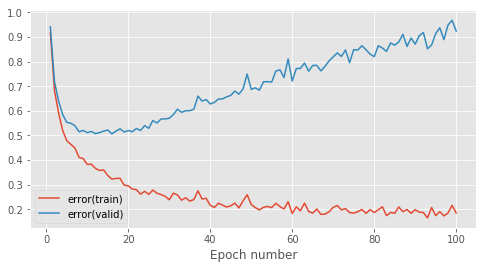

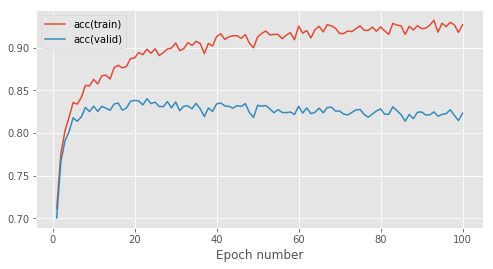

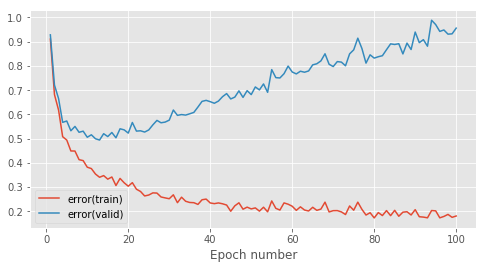

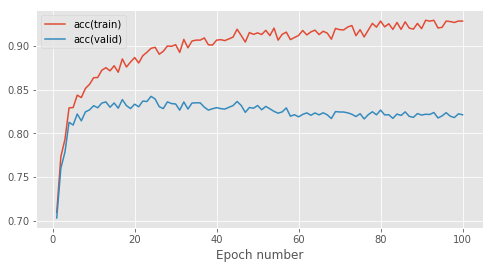

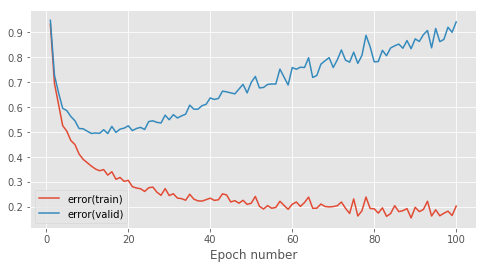

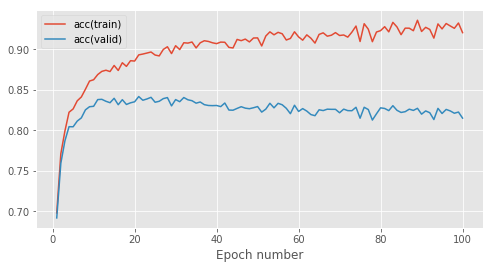

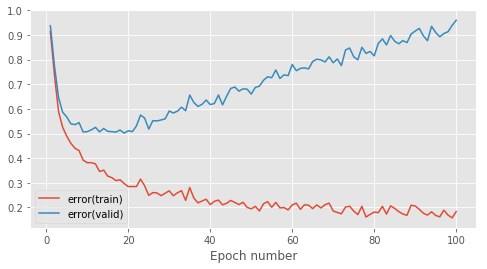

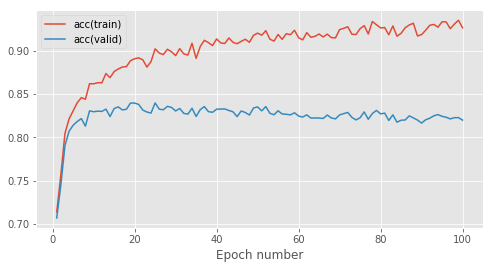

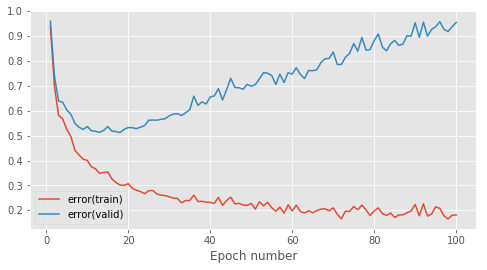

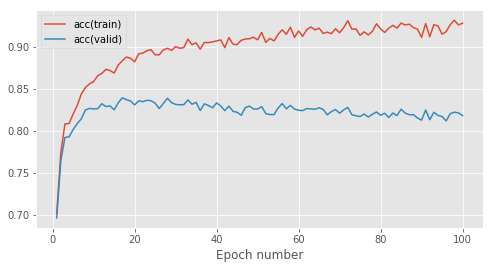

In [8]:
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats5 = sum_stats/run_times

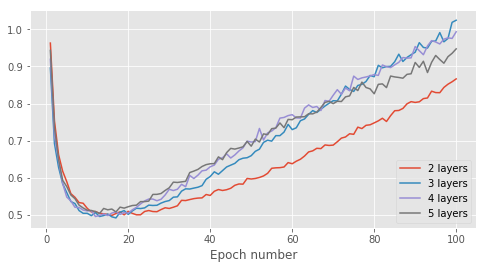

In [11]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys['error(valid)']], label='2 layers')
ax.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys['error(valid)']], label='3 layers')
ax.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys['error(valid)']], label='4 layers')
ax.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys['error(valid)']], label='5 layers')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task1/fig_2to5_val_error.pdf')

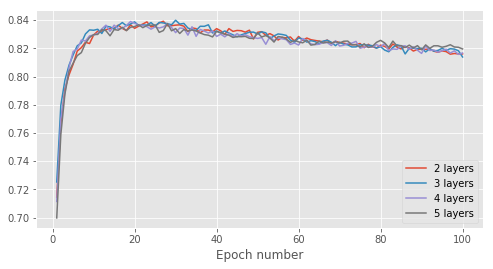

In [13]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys['acc(valid)']], label='2 layers')
ax.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys['acc(valid)']], label='3 layers')
ax.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys['acc(valid)']], label='4 layers')
ax.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys['acc(valid)']], label='5 layers')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task1/fig_2to5_val_acc.pdf')